## The Battle of Neighborhoods Capstone project( week2 project)  Python code

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
df2=pd.read_csv(r'C:\\Users\\awele\\Desktop\\UW\\Capstone_project_notebook_files\\silver_spring_neighborhood2.csv')

In [4]:
# The address column will be created so as to get the latitude and longitude of each neighborhood

df2['address']= df2['Neighborhood'] + '    ' + df2['Zip-code'].str.replace('|',',').apply(str)  + '   '  + ',MD'   
df2.head()

,Neighborhood,Zip-code,City,County,Latitude,Longitude,Population,median_hhs_Income,Population_Density,address
0,Arcola,20902,Silver Spring,Montgomery,39.047887,-77.051644,4562,92040,10341,"Arcola 20902 ,MD"
1,Blair Portal,20910,Silver spring,Montgomery,38.992459,-77.036314,4495,72339,28244,"Blair Portal 20910 ,MD"
2,Brookside Forest,20901,Silver spring,Montgomery,39.007332,-77.004699,4723,73630,8687,"Brookside Forest 20901 ,MD"
3,Burnt Mills Hills,20901,Silver spring,Montgomery,39.032887,-76.994143,4106,99556,8617,"Burnt Mills Hills 20901 ,MD"
4,Burnt Mills Knolls,20901 | 20903,Silver spring,Montgomery,39.031498,-76.987754,1776,107088,4360,"Burnt Mills Knolls 20901 , 20903 ,MD"


In [5]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


#### Describtive statistics of   Population density and Median household income

In [8]:
round(df2[['median_hhs_Income','Population_Density']].describe().transpose(),3)

,count,mean,std,min,25%,50%,75%,max
median_hhs_Income,76.0,94320.882,18123.699,60821.0,82554.00,90649.5,107601.25,138995.0
Population_Density,76.0,7259.553,4126.759,1426.0,4417.75,6863.5,9207.25,28244.0


#### Boxplot of population size

In [14]:

df2_1=df2[['Neighborhood','Population']]


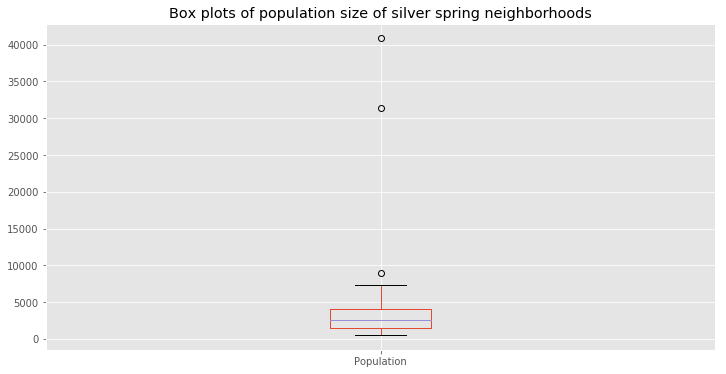

In [10]:
df2_1.plot(kind='box', figsize=(12, 6))

plt.title('Box plots of population size of silver spring neighborhoods')
plt.xlabel('')

plt.show()

In [15]:
#lets set the index to neighborhood so as to get the list of neighborhood along the x-axis
df2_1.set_index('Neighborhood',inplace=True)
df2_1


,Population
Neighborhood,
Arcola,4562
Blair Portal,4495
Brookside Forest,4723
Burnt Mills Hills,4106
Burnt Mills Knolls,1776
Burnt Mills Manor,1473
"Burnt Mills Village,",3029
Chestnut Hills,1008
Chestnut Ridge,1417


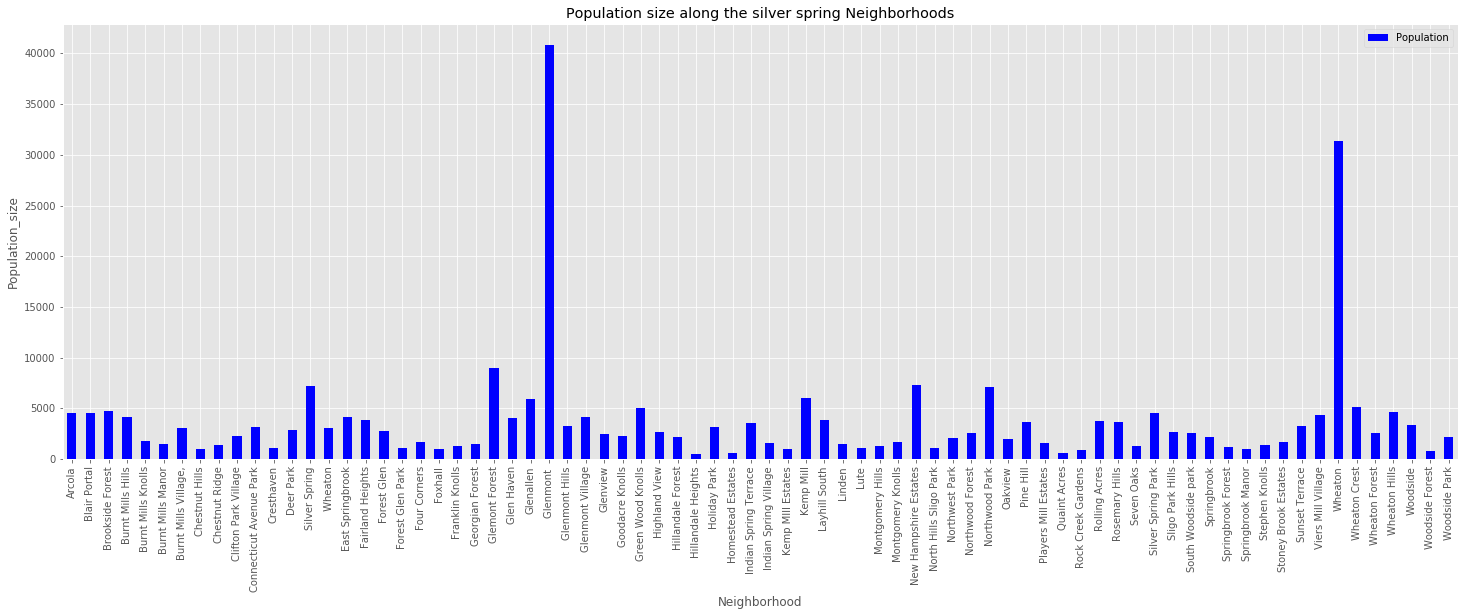

In [16]:
# To plote a bar chart Neighborhood Vs Population size
df2_1.plot(kind='bar', figsize=(25, 8),color='Blue')
#Neighborhood=list(df2['Neighborhood'])
plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Population_size') # add y-label to the plot
plt.title('Population size along the silver spring Neighborhoods') # add title to the plot
plt.show()

In [18]:
## Creating a dataframe from df2 which contains Neighborhood and medianhousehold income
df2_2=df2[['Neighborhood','median_hhs_Income']]

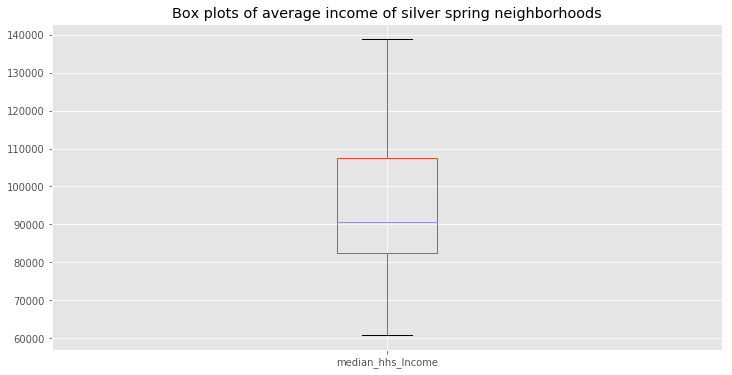

In [19]:
df2_2.plot(kind='box', figsize=(12, 6))

plt.title('Box plots of average income of silver spring neighborhoods')
plt.xlabel('')

plt.show()

In [20]:
# Set index to neighborhood
df2_2.set_index('Neighborhood',inplace=True)

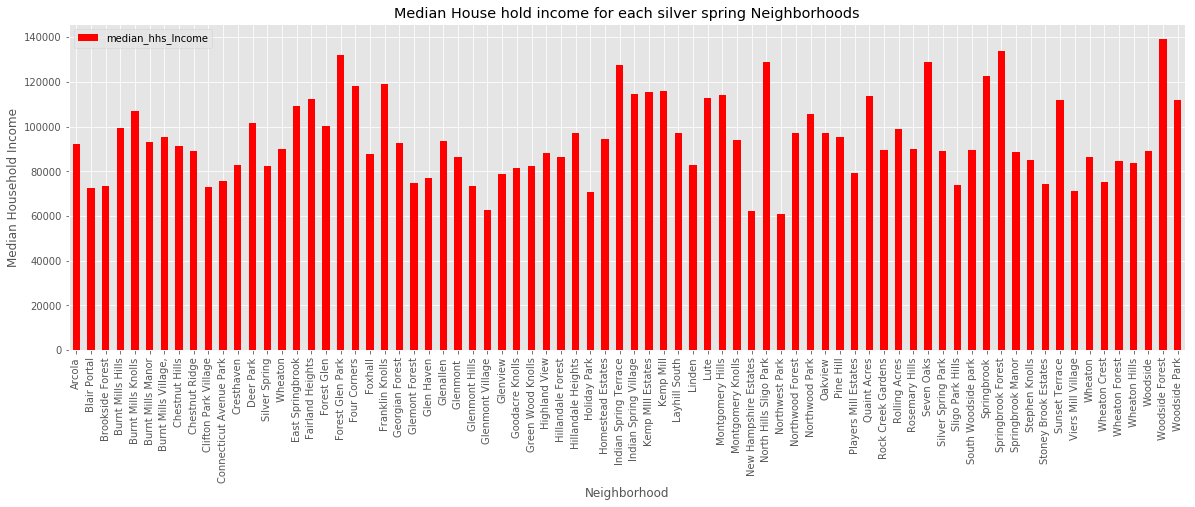

In [21]:
# To plote a bar chart Neighborhood Vs Population size
df2_2.plot(kind='bar', figsize=(20, 6),color='Red')
#Neighborhood=list(df2['Neighborhood'])
plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Median Household Income') # add y-label to the plot
plt.title('Median House hold income for each silver spring Neighborhoods') # add title to the plot
plt.show()

### Lets see the correlation between median house hold income with population size of each neighborhood


In [23]:
df2_3=df2[['Population','median_hhs_Income']]
df2_3.head()

,Population,median_hhs_Income
0,4562,92040
1,4495,72339
2,4723,73630
3,4106,99556
4,1776,107088


In [24]:
X=df2_3['median_hhs_Income']
y=df2_3['Population']

In [25]:
x = df2_3['Population']      # year on x-axis
y = df2_3['median_hhs_Income']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([-5.62324921e-01,  9.64169477e+04])

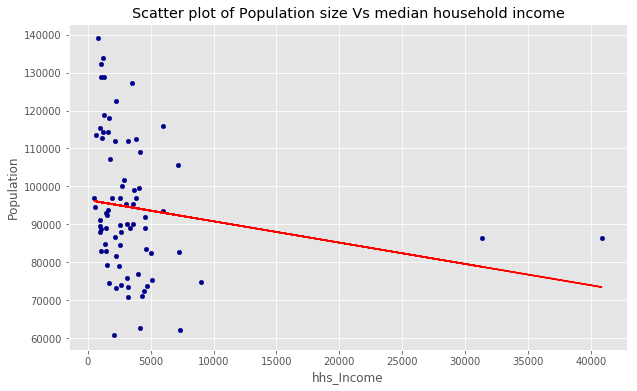

In [27]:
df2_3.plot(kind='scatter', x='Population', y='median_hhs_Income', figsize=(10, 6), color='darkblue')

plt.title('Scatter plot of Population size Vs median household income')
plt.xlabel('hhs_Income')
plt.ylabel('Population')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
#plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
#'No. Immigrants = {0:.0f} * Population + {1:.0f}'.format(fit[0], fit[1]) 

#### Pearson Correlation between population size and median household income 

In [28]:
df2_3.corr()

,Population,median_hhs_Income
Population,1.000000,-0.176667
median_hhs_Income,-0.176667,1.000000


In [34]:
Silver_spring_map=folium.Map(location=[38.9959081, -77.0288918],  zoom_start=12)
Silver_spring_map

In [35]:
# creating adata frame which contains Neighborhood and Population_density for drawing barchart
df2_4=df2[['Neighborhood','Population_Density']]
df2_4.head()

,Neighborhood,Population_Density
0,Arcola,10341
1,Blair Portal,28244
2,Brookside Forest,8687
3,Burnt Mills Hills,8617
4,Burnt Mills Knolls,4360


In [36]:
df2_4.set_index('Neighborhood',inplace=True)


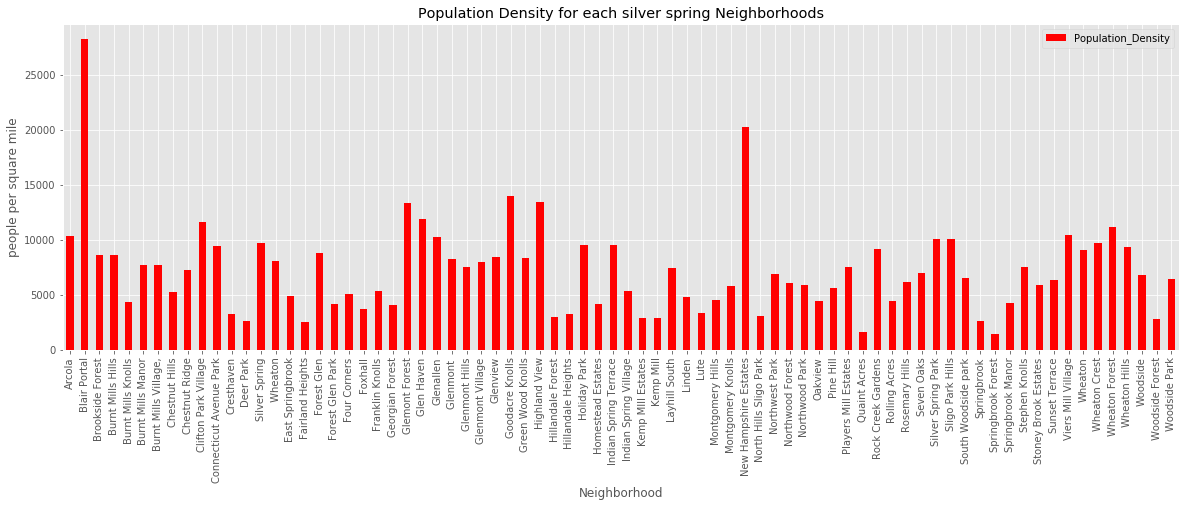

In [37]:
# To plote a bar chart Neighborhood Vs Population size
df2_4.plot(kind='bar', figsize=(20, 6),color='Red')
#Neighborhood=list(df2['Neighborhood'])
plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('people per square mile') # add y-label to the plot
plt.title('Population Density for each silver spring Neighborhoods') # add title to the plot
plt.show()

In [40]:
address_list=list(df2['address'])


In [42]:
## import important labraries
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import json

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


## Explore each  Neighborhood  of Silver spring
###### Let's create a function to repeat the same process to all neighborhood of Silver Spring

In [66]:
## Cridentials  for creating the  url
CLIENT_ID = 'NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY' # your Foursquare ID
CLIENT_SECRET = 'A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY
CLIENT_SECRET:A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF


In [72]:
## setting the search query for further analysis
search_query =  ' gym'
radius =500
print(search_query + ' .... OK!')

 gym .... OK!


In [67]:
## to obtain the list of each neighborhood latitude and longitude
Neighborhood_lat_long_list=list(np.array(df2[['Latitude','Longitude']]))

In [74]:
Neighborhood_lat_long_list=list(np.array(df2[['Latitude','Longitude']]))
for latitude,longitude in  Neighborhood_lat_long_list:
     url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT) 
     print(url)

https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0478869,-77.0516442&v=20180604&query= gym&radius=500&limit=30
https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=38.9924593,-77.0363137&v=20180604&query= gym&radius=500&limit=30
https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0073321,-77.0046987&v=20180604&query= gym&radius=500&limit=30
https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.032887200000005,-76.99414300000001&v=20180604&query= gym&radius=500&limit=30
https://api.foursquare.com/v2/venues/search?clien

### Lets obtain the number of list of Gym in each Silver spring Neighborhood

### Url_1: Arcola

In [76]:
### for Url_1
url_1='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0478869,-77.0516442&v=20180604&query= gym&radius=500&limit=30'

In [77]:
results=requests.get(url_1).json()
results

{'meta': {'code': 200, 'requestId': '5cd1126add579724119fb3ba'},
 'response': {'venues': []}}

###### There is no any GYM in Arcola

### Url_2:  Blair Portal

In [78]:
url_2='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=38.9924593,-77.0363137&v=20180604&query= Gym&radius=500&limit=30'

In [79]:
results = requests.get(url_2).json()
results

{'meta': {'code': 200, 'requestId': '5cd1127bdd5797242ddb4bbf'},
 'response': {'venues': [{'id': '4c46689ccd5ca59344d50087',
    'name': 'Blair Plaza Gym',
    'location': {'address': '1401 Blair Mill Rd',
     'lat': 38.990194039775616,
     'lng': -77.03165556164949,
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.990194039775616,
       'lng': -77.03165556164949}],
     'distance': 475,
     'postalCode': '20910',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['1401 Blair Mill Rd',
      'Silver Spring, MD 20910',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d176941735',
      'name': 'Gym',
      'pluralName': 'Gyms',
      'shortName': 'Gym',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557205627',
    'hasPerk': False},
   {'id': '4cf433c788de3704ab7b832b',
   

In [80]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[{'id': '4c46689ccd5ca59344d50087',
  'name': 'Blair Plaza Gym',
  'location': {'address': '1401 Blair Mill Rd',
   'lat': 38.990194039775616,
   'lng': -77.03165556164949,
   'labeledLatLngs': [{'label': 'display',
     'lat': 38.990194039775616,
     'lng': -77.03165556164949}],
   'distance': 475,
   'postalCode': '20910',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['1401 Blair Mill Rd',
    'Silver Spring, MD 20910',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d176941735',
    'name': 'Gym',
    'pluralName': 'Gyms',
    'shortName': 'Gym',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557205627',
  'hasPerk': False},
 {'id': '4cf433c788de3704ab7b832b',
  'name': 'Falkland Chase Gym',
  'location': {'address': '8330 Colesville Rd',
   'lat': 38.994545748705754,
   'lng': -77.03564162100429,
   '

In [81]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,4c46689ccd5ca59344d50087,1401 Blair Mill Rd,US,Silver Spring,United States,NaN,475,"[1401 Blair Mill Rd, Silver Spring, MD 20910, ...","[{'label': 'display', 'lat': 38.99019403977561...",38.990194,-77.031656,20910,MD,Blair Plaza Gym,v-1557205627,NaN
1,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,4cf433c788de3704ab7b832b,8330 Colesville Rd,US,Silver Spring,United States,NaN,239,"[8330 Colesville Rd, Silver Spring, MD 20910, ...","[{'label': 'display', 'lat': 38.99454574870575...",38.994546,-77.035642,20910,MD,Falkland Chase Gym,v-1557205627,NaN
2,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,54b7f86e498e5bb096bb0a01,8560 2nd Ave,US,Silver Spring,United States,Cameron St,513,"[8560 2nd Ave (Cameron St), Silver Spring, MD ...","[{'label': 'display', 'lat': 38.99625301537612...",38.996253,-77.032943,20910,MD,Gym At Alexander Houses Apartments,v-1557205627,NaN
3,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,4bfc9c0cf61dc9b60af19dde,8560 2nd Ave,US,Silver Spring,United States,at Cameron St.,511,"[8560 2nd Ave (at Cameron St.), Silver Spring,...","[{'label': 'display', 'lat': 38.99587608890309...",38.995876,-77.032366,20910,MD,Alexander House Apartments,v-1557205627,42784165
4,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,4bc639c8bf29c9b65979f92a,1220 E West Hwy,US,Silver Spring,United States,NaN,478,"[1220 E West Hwy, Silver Spring, MD 20910, Uni...","[{'label': 'display', 'lat': 38.99120129611079...",38.991201,-77.031020,20910,MD,Blair East,v-1557205627,NaN


In [82]:
 # keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_2 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_2['categories'] = dataframe_filtered_2.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_2.columns = [column.split('.')[-1] for column in dataframe_filtered_2.columns]

dataframe_filtered_2['Neighborhood']='Blair Portal'
dataframe_filtered_2=dataframe_filtered_2[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_2[dataframe_filtered_2["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_2

,Neighborhood,name,categories,lat,lng
0,Blair Portal,Blair Plaza Gym,Gym,38.990194,-77.031656
1,Blair Portal,Falkland Chase Gym,Gym,38.994546,-77.035642
2,Blair Portal,Gym At Alexander Houses Apartments,Gym,38.996253,-77.032943
3,Blair Portal,Alexander House Apartments,Residential Building (Apartment / Condo),38.995876,-77.032366
4,Blair Portal,Blair East,Residential Building (Apartment / Condo),38.991201,-77.031020


## Url_3:Brookside Forest


In [83]:
url_3='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0073321,-77.0046987&v=20180604&query= Gym&radius=500&limit=30'

In [84]:
results = requests.get(url_3).json()
results

{'meta': {'code': 200, 'requestId': '5cd112929fb6b75700adadc9'},
 'response': {'venues': []}}

In [85]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

######  There is no Gym in the Brookside Forest 

### url_4:Burnt Mills Hills


In [86]:
url_4='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.032887200000005,-76.99414300000001&v=20180604&query= Gym&radius=500&limit=30'

In [87]:
results = requests.get(url_4).json()
results

{'meta': {'code': 200, 'requestId': '5cd112a8351e3d1d546c4f44'},
 'response': {'venues': [{'id': '4cac930c44a8224bb8933440',
    'name': 'WO Gym',
    'location': {'lat': 39.032457,
     'lng': -76.992052,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.032457,
       'lng': -76.992052}],
     'distance': 187,
     'postalCode': '20903',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['Silver Spring, MD 20903', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d176941735',
      'name': 'Gym',
      'pluralName': 'Gyms',
      'shortName': 'Gym',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557205672',
    'hasPerk': False}]}}

In [88]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues 

[{'id': '4cac930c44a8224bb8933440',
  'name': 'WO Gym',
  'location': {'lat': 39.032457,
   'lng': -76.992052,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.032457,
     'lng': -76.992052}],
   'distance': 187,
   'postalCode': '20903',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['Silver Spring, MD 20903', 'United States']},
  'categories': [{'id': '4bf58dd8d48988d176941735',
    'name': 'Gym',
    'pluralName': 'Gyms',
    'shortName': 'Gym',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557205672',
  'hasPerk': False}]

In [89]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,4cac930c44a8224bb8933440,US,Silver Spring,United States,187,"[Silver Spring, MD 20903, United States]","[{'label': 'display', 'lat': 39.032457, 'lng':...",39.032457,-76.992052,20903,MD,WO Gym,v-1557205672


In [90]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_4 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_4['categories'] = dataframe_filtered_4.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_4.columns = [column.split('.')[-1] for column in dataframe_filtered_4.columns]
dataframe_filtered_4['Neighborhood']='Burnt Mills Knolls'
dataframe_filtered_4=dataframe_filtered_4[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_2[dataframe_filtered_2["name"].str.contains("Gym")]

dataframe_filtered_4

,Neighborhood,name,categories,lat,lng
0,Burnt Mills Knolls,WO Gym,Gym,39.032457,-76.992052


##  for url_5: Burnt Mills Knolls


In [91]:
url_5='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0314984,-76.98775400000001&v=20180604&query= gym&radius=500&limit=30'


In [92]:
results = requests.get(url_5).json()
results

{'meta': {'code': 200, 'requestId': '5cd112c1351e3d1d525542cb'},
 'response': {'venues': [{'id': '4cac930c44a8224bb8933440',
    'name': 'WO Gym',
    'location': {'lat': 39.032457,
     'lng': -76.992052,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.032457,
       'lng': -76.992052}],
     'distance': 386,
     'postalCode': '20903',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['Silver Spring, MD 20903', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d176941735',
      'name': 'Gym',
      'pluralName': 'Gyms',
      'shortName': 'Gym',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557205697',
    'hasPerk': False}]}}

In [93]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues 

[{'id': '4cac930c44a8224bb8933440',
  'name': 'WO Gym',
  'location': {'lat': 39.032457,
   'lng': -76.992052,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.032457,
     'lng': -76.992052}],
   'distance': 386,
   'postalCode': '20903',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['Silver Spring, MD 20903', 'United States']},
  'categories': [{'id': '4bf58dd8d48988d176941735',
    'name': 'Gym',
    'pluralName': 'Gyms',
    'shortName': 'Gym',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557205697',
  'hasPerk': False}]

In [94]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,4cac930c44a8224bb8933440,US,Silver Spring,United States,386,"[Silver Spring, MD 20903, United States]","[{'label': 'display', 'lat': 39.032457, 'lng':...",39.032457,-76.992052,20903,MD,WO Gym,v-1557205697


In [95]:

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_5= dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_5['categories'] = dataframe_filtered_5.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_5.columns = [column.split('.')[-1] for column in dataframe_filtered_5.columns]
dataframe_filtered_5['Neighborhood']='Burnt Mills Knolls'
dataframe_filtered_5=dataframe_filtered_5[['Neighborhood','name','categories', 'lat', 'lng']]
dataframe_filtered_5




,Neighborhood,name,categories,lat,lng
0,Burnt Mills Knolls,WO Gym,Gym,39.032457,-76.992052


## url_6: Burnt Mills Manor


In [96]:
url_6='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.035665,-77.00442109999999&v=20180604&query= gym&radius=500&limit=30'


In [97]:
results = requests.get(url_6).json()
results

{'meta': {'code': 200, 'requestId': '5cd112d94434b9314e7378d5'},
 'response': {'venues': [{'id': '4debe55eae60e989237ef535',
    'name': 'Results Gym',
    'location': {'address': '10750 Columbia Pike',
     'lat': 39.03374580449653,
     'lng': -77.0021036220559,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.03374580449653,
       'lng': -77.0021036220559}],
     'distance': 292,
     'postalCode': '20901',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['10750 Columbia Pike',
      'Silver Spring, MD 20901',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d176941735',
      'name': 'Gym',
      'pluralName': 'Gyms',
      'shortName': 'Gym',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557205721',
    'hasPerk': False}]}}

In [98]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues 

[{'id': '4debe55eae60e989237ef535',
  'name': 'Results Gym',
  'location': {'address': '10750 Columbia Pike',
   'lat': 39.03374580449653,
   'lng': -77.0021036220559,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.03374580449653,
     'lng': -77.0021036220559}],
   'distance': 292,
   'postalCode': '20901',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['10750 Columbia Pike',
    'Silver Spring, MD 20901',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d176941735',
    'name': 'Gym',
    'pluralName': 'Gyms',
    'shortName': 'Gym',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557205721',
  'hasPerk': False}]

In [99]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,4debe55eae60e989237ef535,10750 Columbia Pike,US,Silver Spring,United States,292,"[10750 Columbia Pike, Silver Spring, MD 20901,...","[{'label': 'display', 'lat': 39.03374580449653...",39.033746,-77.002104,20901,MD,Results Gym,v-1557205721


In [100]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_6 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_6['categories'] = dataframe_filtered_6.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_6.columns = [column.split('.')[-1] for column in dataframe_filtered_6.columns]
dataframe_filtered_6['Neighborhood']='Burnt Mills Manor'
dataframe_filtered_6=dataframe_filtered_6[['Neighborhood','name','categories', 'lat', 'lng']]
dataframe_filtered_6



,Neighborhood,name,categories,lat,lng
0,Burnt Mills Manor,Results Gym,Gym,39.033746,-77.002104


## url_7:Burnt Mills Village


In [101]:
url_7='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.037887100000006,-77.0049767&v=20180604&query= gym&radius=500&limit=30'


In [102]:
results=requests.get(url_7).json()
results

{'meta': {'code': 200, 'requestId': '5cd112f5db04f559d7e983ca'},
 'response': {'venues': [{'id': '4debe55eae60e989237ef535',
    'name': 'Results Gym',
    'location': {'address': '10750 Columbia Pike',
     'lat': 39.03374580449653,
     'lng': -77.0021036220559,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.03374580449653,
       'lng': -77.0021036220559}],
     'distance': 523,
     'postalCode': '20901',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['10750 Columbia Pike',
      'Silver Spring, MD 20901',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d176941735',
      'name': 'Gym',
      'pluralName': 'Gyms',
      'shortName': 'Gym',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557205749',
    'hasPerk': False}]}}

In [103]:
venues=results['response']['venues']
venues

[{'id': '4debe55eae60e989237ef535',
  'name': 'Results Gym',
  'location': {'address': '10750 Columbia Pike',
   'lat': 39.03374580449653,
   'lng': -77.0021036220559,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.03374580449653,
     'lng': -77.0021036220559}],
   'distance': 523,
   'postalCode': '20901',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['10750 Columbia Pike',
    'Silver Spring, MD 20901',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d176941735',
    'name': 'Gym',
    'pluralName': 'Gyms',
    'shortName': 'Gym',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557205749',
  'hasPerk': False}]

In [104]:
dataframe=json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,4debe55eae60e989237ef535,10750 Columbia Pike,US,Silver Spring,United States,523,"[10750 Columbia Pike, Silver Spring, MD 20901,...","[{'label': 'display', 'lat': 39.03374580449653...",39.033746,-77.002104,20901,MD,Results Gym,v-1557205749


In [105]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_7 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_7['categories'] = dataframe_filtered_7.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_7.columns = [column.split('.')[-1] for column in dataframe_filtered_7.columns]

dataframe_filtered_7

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Results Gym,Gym,10750 Columbia Pike,US,Silver Spring,United States,523,"[10750 Columbia Pike, Silver Spring, MD 20901,...","[{'label': 'display', 'lat': 39.03374580449653...",39.033746,-77.002104,20901,MD,4debe55eae60e989237ef535


In [106]:
dataframe_filtered_7['Neighborhood']='Burnt Mills Village'
dataframe_filtered_7=dataframe_filtered_7[['Neighborhood','name','categories', 'lat', 'lng']]
dataframe_filtered_7

,Neighborhood,name,categories,lat,lng
0,Burnt Mills Village,Results Gym,Gym,39.033746,-77.002104


## Url_8: Chestnut Hills

In [107]:
url_8='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0301094,-77.0330327&v=20180604&query= Gym&radius=500&limit=30'


In [108]:
results = requests.get(url_8).json()
results

{'meta': {'code': 200, 'requestId': '5cd113111ed2196c3d76acf8'},
 'response': {'venues': []}}

In [109]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues 

[]

### Since Url_8 is the fouresquare for Chestnut Hills, there is no GYM around them


## Url_9:Chestnut Ridge

In [110]:
url_9='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0348315,-77.0363662&v=20180604&query= Gym&radius=500&limit=30'


In [111]:
results = requests.get(url_9).json()
results

{'meta': {'code': 200, 'requestId': '5cd1131f351e3d1d51357122'},
 'response': {'venues': []}}

In [112]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues 

[]

### Url_9 returns zero venue so that there is a Gym around Chestnut Ridge with in 500 meter radius


## Url_10: Clifton Park Village


In [113]:
url_10='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0012211,-76.99192059999999&v=20180604&query= Gym&radius=500&limit=30'


In [114]:
results = requests.get(url_10).json()
results

{'meta': {'code': 200, 'requestId': '5cd1132b6a60712122b40d6d'},
 'response': {'venues': [{'id': '502961afe4b04c7655f9a3e6',
    'name': "Suburban Hill's Apartmets Gym",
    'location': {'address': '8500 New Hampshire Ave. T Level',
     'lat': 38.99917788743739,
     'lng': -76.98654977997482,
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.99917788743739,
       'lng': -76.98654977997482}],
     'distance': 517,
     'postalCode': '20903',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['8500 New Hampshire Ave. T Level',
      'Silver Spring, MD 20903',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d176941735',
      'name': 'Gym',
      'pluralName': 'Gyms',
      'shortName': 'Gym',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557205803',
    'hasPerk': False}]}}

In [115]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues 

[{'id': '502961afe4b04c7655f9a3e6',
  'name': "Suburban Hill's Apartmets Gym",
  'location': {'address': '8500 New Hampshire Ave. T Level',
   'lat': 38.99917788743739,
   'lng': -76.98654977997482,
   'labeledLatLngs': [{'label': 'display',
     'lat': 38.99917788743739,
     'lng': -76.98654977997482}],
   'distance': 517,
   'postalCode': '20903',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['8500 New Hampshire Ave. T Level',
    'Silver Spring, MD 20903',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d176941735',
    'name': 'Gym',
    'pluralName': 'Gyms',
    'shortName': 'Gym',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557205803',
  'hasPerk': False}]

In [116]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,502961afe4b04c7655f9a3e6,8500 New Hampshire Ave. T Level,US,Silver Spring,United States,517,"[8500 New Hampshire Ave. T Level, Silver Sprin...","[{'label': 'display', 'lat': 38.99917788743739...",38.999178,-76.98655,20903,MD,Suburban Hill's Apartmets Gym,v-1557205803


In [117]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_10 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_10['categories'] = dataframe_filtered_10.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_10.columns = [column.split('.')[-1] for column in dataframe_filtered_10.columns]

dataframe_filtered_10

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Suburban Hill's Apartmets Gym,Gym,8500 New Hampshire Ave. T Level,US,Silver Spring,United States,517,"[8500 New Hampshire Ave. T Level, Silver Sprin...","[{'label': 'display', 'lat': 38.99917788743739...",38.999178,-76.98655,20903,MD,502961afe4b04c7655f9a3e6


In [118]:
dataframe_filtered_10['Neighborhood']='Clifton Park Village'
dataframe_filtered_10=dataframe_filtered_10[['Neighborhood','name','categories', 'lat', 'lng']]
dataframe_filtered_10

,Neighborhood,name,categories,lat,lng
0,Clifton Park Village,Suburban Hill's Apartmets Gym,Gym,38.999178,-76.98655


## Url_11: Connecticut Avenue Park


In [119]:
url_11='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0626088,-77.07775600000001&v=20180604&query= Gym&radius=500&limit=30'


In [120]:
results = requests.get(url_11).json()
results

{'meta': {'code': 200, 'requestId': '5cd1133e4434b9314db69419'},
 'response': {'venues': []}}

In [121]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues 

[]

#### Url_11: Connecticut Avenue Park fouresquare does not replay a result

### Url_12:Cresthaven


In [122]:
url_12='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0251096,-76.99108740000001&v=20180604&query= Gym&radius=500&limit=30'


In [123]:
results = requests.get(url_12).json()
results

{'meta': {'code': 200, 'requestId': '5cd113491ed2196c4342ea7e'},
 'response': {'venues': []}}

In [124]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

### The fouresquare for Url_12:Cresthaven has no result


## Url_13:Deer Park


In [125]:
url_13='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.6417726,-76.3085694&v=20180604&query= gym&radius=500&limit=30'


In [126]:
results = requests.get(url_13).json()
results

{'meta': {'code': 200, 'requestId': '5cd113554434b9319ec9444d'},
 'response': {'venues': []}}

In [127]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

##  the fouresquare of Url_13: Deer Park does not have a result

### url_14: Silver Spring


In [128]:
url_14='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=38.9959081,-77.0288918&v=20180604&query= Gym&radius=500&limit=30'


In [129]:
results = requests.get(url_14).json()
results

{'meta': {'code': 200, 'requestId': '5cd113609fb6b75700b091b3'},
 'response': {'venues': [{'id': '4ee655e4f9abfc722869da8c',
    'name': 'The Portico - Gym',
    'location': {'address': '1203 Fidler Ln',
     'lat': 38.99586366995528,
     'lng': -77.03055062556936,
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.99586366995528,
       'lng': -77.03055062556936}],
     'distance': 143,
     'postalCode': '20910',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['1203 Fidler Ln',
      'Silver Spring, MD 20910',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d176941735',
      'name': 'Gym',
      'pluralName': 'Gyms',
      'shortName': 'Gym',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557205856',
    'hasPerk': False},
   {'id': '4bc09d2e4cdfc9b685179321',
    'name':

In [130]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[{'id': '4ee655e4f9abfc722869da8c',
  'name': 'The Portico - Gym',
  'location': {'address': '1203 Fidler Ln',
   'lat': 38.99586366995528,
   'lng': -77.03055062556936,
   'labeledLatLngs': [{'label': 'display',
     'lat': 38.99586366995528,
     'lng': -77.03055062556936}],
   'distance': 143,
   'postalCode': '20910',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['1203 Fidler Ln',
    'Silver Spring, MD 20910',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d176941735',
    'name': 'Gym',
    'pluralName': 'Gyms',
    'shortName': 'Gym',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557205856',
  'hasPerk': False},
 {'id': '4bc09d2e4cdfc9b685179321',
  'name': "Gold's Gym",
  'location': {'address': '916 Ellsworth Dr',
   'crossStreet': 'Fenton / Colesville',
   'lat': 38.99719712526589,
   'lng': -7

In [131]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,4ee655e4f9abfc722869da8c,1203 Fidler Ln,US,Silver Spring,United States,NaN,143,"[1203 Fidler Ln, Silver Spring, MD 20910, Unit...","[{'label': 'display', 'lat': 38.99586366995528...",38.995864,-77.030551,20910,MD,The Portico - Gym,v-1557205856,NaN
1,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,4bc09d2e4cdfc9b685179321,916 Ellsworth Dr,US,Silver Spring,United States,Fenton / Colesville,280,"[916 Ellsworth Dr (Fenton / Colesville), Silve...","[{'label': 'display', 'lat': 38.99719712526589...",38.997197,-77.026111,20910,MD,Gold's Gym,v-1557205856,NaN
2,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,4b951486f964a5204b8e34e3,1110 Fidler Ln,US,Silver Spring,United States,NaN,93,"[1110 Fidler Ln, Silver Spring, MD 20910, Unit...","[{'label': 'display', 'lat': 38.99657239363632...",38.996572,-77.029547,20910,MD,Gym @ Twin Towers,v-1557205856,NaN
3,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,505cf639e4b0707f48ce14c9,NaN,US,Silver Spring,United States,NaN,347,"[Silver Spring, MD 20910, United States]","[{'label': 'display', 'lat': 38.99877144385935...",38.998771,-77.030480,20910,MD,Sheraton Silver Spring Gym,v-1557205856,NaN
4,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,5a71be25b2958f4c8c89a994,NaN,US,Silver Spring,United States,NaN,403,"[Silver Spring, MD 20910, United States]","[{'label': 'display', 'lat': 38.998752, 'lng':...",38.998752,-77.031792,20910,MD,Gym @ The Point,v-1557205856,NaN


In [132]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_14 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_14['categories'] = dataframe_filtered_14.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_14.columns = [column.split('.')[-1] for column in dataframe_filtered_14.columns]

dataframe_filtered_14

dataframe_filtered_14['Neighborhood']='Downtown Silver Spring'
dataframe_filtered_14=dataframe_filtered_14[['Neighborhood','name','categories', 'lat', 'lng']]
dataframe_filtered_14[dataframe_filtered_14["name"].str.contains("Gym")]
dataframe_filtered_14


,Neighborhood,name,categories,lat,lng
0,Downtown Silver Spring,The Portico - Gym,Gym,38.995864,-77.030551
1,Downtown Silver Spring,Gold's Gym,Gym,38.997197,-77.026111
2,Downtown Silver Spring,Gym @ Twin Towers,Gym,38.996572,-77.029547
3,Downtown Silver Spring,Sheraton Silver Spring Gym,Gym,38.998771,-77.030480
4,Downtown Silver Spring,Gym @ The Point,Gym / Fitness Center,38.998752,-77.031792
5,Downtown Silver Spring,Bennington Gym,Gym,38.991406,-77.029597
6,Downtown Silver Spring,Gym @ Solaire,Gym / Fitness Center,38.992399,-77.028639
7,Downtown Silver Spring,Woodside Park Gym,Basketball Court,38.999817,-77.033410
8,Downtown Silver Spring,Hotel Gym,Gym / Fitness Center,38.998343,-77.026808
9,Downtown Silver Spring,Gym @ Fenwick,Gym,38.997400,-77.034672


## Url_15: Downtown Wheaton


In [133]:
url_15='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.03897,-77.05705&v=20180604&query= Gym&radius=500&limit=30'


In [134]:
results = requests.get(url_15).json()
results 

{'meta': {'code': 200, 'requestId': '5cd113a1dd57972412ffbed3'},
 'response': {'venues': [{'id': '4f32bd7519836c91c7f54a15',
    'name': 'Silver Stars Gymnastics',
    'location': {'address': '2723 University Blvd W',
     'lat': 39.039583,
     'lng': -77.056445,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.039583,
       'lng': -77.056445}],
     'distance': 85,
     'postalCode': '20902',
     'cc': 'US',
     'city': 'Wheaton',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['2723 University Blvd W',
      'Wheaton, MD 20902',
      'United States']},
    'categories': [{'id': '52f2ab2ebcbc57f1066b8b48',
      'name': 'Gymnastics Gym',
      'pluralName': 'Gymnastics Gyms',
      'shortName': 'Gymnastics Gym',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557205921',
    'hasPerk': False},
   {'id': '4fc68488e4b0579a79c70e53',
 

In [135]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[{'id': '4f32bd7519836c91c7f54a15',
  'name': 'Silver Stars Gymnastics',
  'location': {'address': '2723 University Blvd W',
   'lat': 39.039583,
   'lng': -77.056445,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.039583,
     'lng': -77.056445}],
   'distance': 85,
   'postalCode': '20902',
   'cc': 'US',
   'city': 'Wheaton',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['2723 University Blvd W',
    'Wheaton, MD 20902',
    'United States']},
  'categories': [{'id': '52f2ab2ebcbc57f1066b8b48',
    'name': 'Gymnastics Gym',
    'pluralName': 'Gymnastics Gyms',
    'shortName': 'Gymnastics Gym',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557205921',
  'hasPerk': False},
 {'id': '4fc68488e4b0579a79c70e53',
  'name': 'Gymboree',
  'location': {'address': '11160 Veirs Mill Rd',
   'lat': 39.03658058769465,
   'lng': -77.05489196650237,
   'labeledL

In [136]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '52f2ab2ebcbc57f1066b8b48', 'name': 'G...",False,4f32bd7519836c91c7f54a15,2723 University Blvd W,US,Wheaton,United States,85,"[2723 University Blvd W, Wheaton, MD 20902, Un...","[{'label': 'display', 'lat': 39.039583, 'lng':...",39.039583,-77.056445,20902,MD,Silver Stars Gymnastics,v-1557205921
1,"[{'id': '4bf58dd8d48988d105951735', 'name': 'K...",False,4fc68488e4b0579a79c70e53,11160 Veirs Mill Rd,US,Wheaton,United States,324,"[11160 Veirs Mill Rd, Wheaton, MD 20902, Unite...","[{'label': 'display', 'lat': 39.03658058769465...",39.036581,-77.054892,20902,MD,Gymboree,v-1557205921


In [137]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_15 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_15['categories'] = dataframe_filtered_15.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_15.columns = [column.split('.')[-1] for column in dataframe_filtered_15.columns]
dataframe_filtered_15['Neighborhood']='Downtown Wheaton'
dataframe_filtered_15=dataframe_filtered_15[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_15[dataframe_filtered_15["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_15

,Neighborhood,name,categories,lat,lng
0,Downtown Wheaton,Silver Stars Gymnastics,Gymnastics Gym,39.039583,-77.056445
1,Downtown Wheaton,Gymboree,Kids Store,39.036581,-77.054892


## Url_16:East Springbrook


In [138]:
url_16='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.058442299999996,-76.9874763&v=20180604&query= gym&radius=500&limit=30'

In [139]:
results = requests.get(url_16).json()
results 

{'meta': {'code': 200, 'requestId': '5cd113d94434b9316a72cc5e'},
 'response': {'venues': []}}

In [140]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

In [141]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

""


###### The fouresquare for Url_16 does not display a result

### url_17:Fairland Heights


In [142]:
url_17='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0848308,-76.9613647&v=20180604&query= Gym&radius=500&limit=30'

In [143]:
results = requests.get(url_17).json()
results 

{'meta': {'code': 200, 'requestId': '5cd113ef1ed2196c3f3d1825'},
 'response': {'venues': []}}

In [144]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

### ### url_17 has no output. That is there is no a gym with in 500 meter radius of the neighborhood

## Url_18: Forest Glen

In [145]:
url_18='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.014554100000005,-77.0546997&v=20180604&query= Gym&radius=500&limit=30'

In [146]:

results = requests.get(url_18).json()
results

{'meta': {'code': 200, 'requestId': '5cd114c7db04f559db40f403'},
 'response': {'venues': []}}

In [147]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

###### The foursquare for Url_18 has no output

## url_19:Forest Glen Park


In [148]:
url_19='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.01455025,-77.05006994&v=20180604&query= Gym&radius=500&limit=30'

In [149]:
results = requests.get(url_19).json()
results 

{'meta': {'code': 200, 'requestId': '5cd114fedb04f559d82ba7bf'},
 'response': {'venues': []}}

In [150]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

#### The fouresquare for url_19  has no output

## url_20:Four Corners

In [151]:
url_20='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0200997,-77.0129799&v=20180604&query= Gym&radius=500&limit=30'

In [152]:
results=requests.get(url_20).json()
results

{'meta': {'code': 200, 'requestId': '5cd1150b4c1f67438f20a778'},
 'response': {'venues': [{'id': '4c58131e30d82d7f522adb62',
    'name': 'The Little Gym Of Silver Spring',
    'location': {'lat': 39.01870033527097,
     'lng': -77.0093079888212,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.01870033527097,
       'lng': -77.0093079888212}],
     'distance': 353,
     'postalCode': '20901',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['Silver Spring, MD 20901', 'United States']},
    'categories': [],
    'referralId': 'v-1557206283',
    'hasPerk': False}]}}

In [153]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[{'id': '4c58131e30d82d7f522adb62',
  'name': 'The Little Gym Of Silver Spring',
  'location': {'lat': 39.01870033527097,
   'lng': -77.0093079888212,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.01870033527097,
     'lng': -77.0093079888212}],
   'distance': 353,
   'postalCode': '20901',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['Silver Spring, MD 20901', 'United States']},
  'categories': [],
  'referralId': 'v-1557206283',
  'hasPerk': False}]

In [154]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,[],False,4c58131e30d82d7f522adb62,US,Silver Spring,United States,353,"[Silver Spring, MD 20901, United States]","[{'label': 'display', 'lat': 39.01870033527097...",39.0187,-77.009308,20901,MD,The Little Gym Of Silver Spring,v-1557206283


In [155]:
 # keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_20 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_20['categories'] = dataframe_filtered_20.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_20.columns = [column.split('.')[-1] for column in dataframe_filtered_20.columns]

dataframe_filtered_20['Neighborhood']='Four Corners'
dataframe_filtered_20=dataframe_filtered_20[['Neighborhood','name','categories', 'lat', 'lng']]
dataframe_filtered_20[dataframe_filtered_20["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_20

,Neighborhood,name,categories,lat,lng
0,Four Corners,The Little Gym Of Silver Spring,None,39.0187,-77.009308


## url_21:Foxhall

In [156]:
url_21='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0698309,-77.058589&v=20180604&query= Gym&radius=500&limit=30'

In [157]:
results = requests.get(url_21).json()
results

{'meta': {'code': 200, 'requestId': '5cd1151add57972410081cd5'},
 'response': {'venues': []}}

In [158]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

###### FSQ for url_21 has no output

## url_22:Franklin Knolls


In [159]:
url_22='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0148319,-76.9977542&v=20180604&query= Gym&radius=500&limit=30'

In [160]:
results = requests.get(url_22).json()
results

{'meta': {'code': 200, 'requestId': '5cd115251ed2196c400f2c31'},
 'response': {'venues': []}}

In [161]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_23: Georgian Forest


In [162]:
url_23='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0734419,-77.0647003&v=20180604&query= Gym&radius=500&limit=30'

In [163]:
results = requests.get(url_23).json()
results

{'meta': {'code': 200, 'requestId': '5cd1152e351e3d1d513cf84e'},
 'response': {'venues': []}}

In [164]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

### FSQ for Url_23 has no utput 

 # url_24: Glemont Forest


In [167]:
url_24='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.055942200000004,-77.0585889&v=20180604&query= Gym&radius=500&limit=30'

In [168]:
results = requests.get(url_24).json()
results

{'meta': {'code': 200, 'requestId': '5cd115e7dd57972412081d6c'},
 'response': {'venues': []}}

In [169]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

#### FSQ for url_24 has no output

### url_25:Glen Haven


In [170]:
url_25='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0337205,-77.0427552&v=20180604&query= Gym&radius=500&limit=30'

In [171]:
results = requests.get(url_25).json()
results

{'meta': {'code': 200, 'requestId': '5cd115ffdb04f559d82f6357'},
 'response': {'venues': [{'id': '510dd2cde4b01a7ac6cde31d',
    'name': 'Encore Gym',
    'location': {'lat': 39.03439023965377,
     'lng': -77.04642766267553,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.03439023965377,
       'lng': -77.04642766267553}],
     'distance': 326,
     'postalCode': '20902',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['Silver Spring, MD 20902', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d175941735',
      'name': 'Gym / Fitness Center',
      'pluralName': 'Gyms or Fitness Centers',
      'shortName': 'Gym / Fitness',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557206527',
    'hasPerk': False},
   {'id': '4cbb5332adcd54813e4c28a2',
    'name': 'Westwood Garden Gym',
 

In [172]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[{'id': '510dd2cde4b01a7ac6cde31d',
  'name': 'Encore Gym',
  'location': {'lat': 39.03439023965377,
   'lng': -77.04642766267553,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.03439023965377,
     'lng': -77.04642766267553}],
   'distance': 326,
   'postalCode': '20902',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['Silver Spring, MD 20902', 'United States']},
  'categories': [{'id': '4bf58dd8d48988d175941735',
    'name': 'Gym / Fitness Center',
    'pluralName': 'Gyms or Fitness Centers',
    'shortName': 'Gym / Fitness',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557206527',
  'hasPerk': False},
 {'id': '4cbb5332adcd54813e4c28a2',
  'name': 'Westwood Garden Gym',
  'location': {'address': 'Amherst Ave',
   'lat': 39.033377309356084,
   'lng': -77.0457956611027,
   'labeledLatLngs': [{'label': 'displ

In [173]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,510dd2cde4b01a7ac6cde31d,NaN,US,Silver Spring,United States,326,"[Silver Spring, MD 20902, United States]","[{'label': 'display', 'lat': 39.03439023965377...",39.034390,-77.046428,20902,MD,Encore Gym,v-1557206527
1,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,4cbb5332adcd54813e4c28a2,Amherst Ave,US,Silver Spring,United States,265,"[Amherst Ave, Silver Spring, MD 20902, United ...","[{'label': 'display', 'lat': 39.03337730935608...",39.033377,-77.045796,20902,MD,Westwood Garden Gym,v-1557206527


In [174]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_25 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_25['categories'] = dataframe_filtered_25.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_25.columns = [column.split('.')[-1] for column in dataframe_filtered_25.columns]

dataframe_filtered_25['Neighborhood']='Glen Haven'
dataframe_filtered_25=dataframe_filtered_25[['Neighborhood','name','categories', 'lat', 'lng']]
dataframe_filtered_25[dataframe_filtered_25["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_25

,Neighborhood,name,categories,lat,lng
0,Glen Haven,Encore Gym,Gym / Fitness Center,39.034390,-77.046428
1,Glen Haven,Westwood Garden Gym,Gym,39.033377,-77.045796


## url_26:Glenallen


In [175]:
url_26='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0595533,-77.0424775&v=20180604&query= Gym&radius=500&limit=30'

In [176]:
results = requests.get(url_26).json()
results

{'meta': {'code': 200, 'requestId': '5cd1163c4c1f67438f251b89'},
 'response': {'venues': []}}

In [177]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

##### FSQ for url_26 has no output

## url_27:Glenmont 

In [178]:
url_27='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.3833645,-76.58381877&v=20180604&query= Gym&radius=500&limit=30'

In [179]:
results = requests.get(url_27).json()
results

{'meta': {'code': 200, 'requestId': '5cd1164cf594df21bf4ed813'},
 'response': {'venues': []}}

In [180]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_28:Glenmont Hills

In [181]:
url_28='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.064831,-77.0605334&v=20180604&query= Gym&radius=500&limit=30'

In [182]:
results = requests.get(url_28).json()
results

{'meta': {'code': 200, 'requestId': '5cd116634434b9316a7c31fa'},
 'response': {'venues': []}}

In [183]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_29:Glenmont Village


In [184]:
url_29='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0598311,-77.0552556&v=20180604&query= Gym&radius=500&limit=30'

In [185]:
results = requests.get(url_29).json()
results

{'meta': {'code': 200, 'requestId': '5cd1166f6a60712126f4f4db'},
 'response': {'venues': []}}

In [186]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_30:Glenview


In [187]:
url_30='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0303872,-77.0430329&v=20180604&query= Gym&radius=500&limit=30'

In [188]:
results = requests.get(url_30).json()
results

{'meta': {'code': 200, 'requestId': '5cd11678dd579724145dd5b1'},
 'response': {'venues': [{'id': '510dd2cde4b01a7ac6cde31d',
    'name': 'Encore Gym',
    'location': {'lat': 39.03439023965377,
     'lng': -77.04642766267553,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.03439023965377,
       'lng': -77.04642766267553}],
     'distance': 533,
     'postalCode': '20902',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['Silver Spring, MD 20902', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d175941735',
      'name': 'Gym / Fitness Center',
      'pluralName': 'Gyms or Fitness Centers',
      'shortName': 'Gym / Fitness',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557206648',
    'hasPerk': False},
   {'id': '4cbb5332adcd54813e4c28a2',
    'name': 'Westwood Garden Gym',
 

In [189]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[{'id': '510dd2cde4b01a7ac6cde31d',
  'name': 'Encore Gym',
  'location': {'lat': 39.03439023965377,
   'lng': -77.04642766267553,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.03439023965377,
     'lng': -77.04642766267553}],
   'distance': 533,
   'postalCode': '20902',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['Silver Spring, MD 20902', 'United States']},
  'categories': [{'id': '4bf58dd8d48988d175941735',
    'name': 'Gym / Fitness Center',
    'pluralName': 'Gyms or Fitness Centers',
    'shortName': 'Gym / Fitness',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557206648',
  'hasPerk': False},
 {'id': '4cbb5332adcd54813e4c28a2',
  'name': 'Westwood Garden Gym',
  'location': {'address': 'Amherst Ave',
   'lat': 39.033377309356084,
   'lng': -77.0457956611027,
   'labeledLatLngs': [{'label': 'displ

In [190]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,510dd2cde4b01a7ac6cde31d,NaN,US,Silver Spring,United States,533,"[Silver Spring, MD 20902, United States]","[{'label': 'display', 'lat': 39.03439023965377...",39.034390,-77.046428,20902,MD,Encore Gym,v-1557206648
1,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,4cbb5332adcd54813e4c28a2,Amherst Ave,US,Silver Spring,United States,409,"[Amherst Ave, Silver Spring, MD 20902, United ...","[{'label': 'display', 'lat': 39.03337730935608...",39.033377,-77.045796,20902,MD,Westwood Garden Gym,v-1557206648


In [191]:
 # keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_30 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_30['categories'] = dataframe_filtered_30.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_30.columns = [column.split('.')[-1] for column in dataframe_filtered_30.columns]

dataframe_filtered_30['Neighborhood']='Glenview'
dataframe_filtered_30=dataframe_filtered_30[['Neighborhood','name','categories', 'lat', 'lng']]
dataframe_filtered_30[dataframe_filtered_30["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_30

,Neighborhood,name,categories,lat,lng
0,Glenview,Encore Gym,Gym / Fitness Center,39.034390,-77.046428
1,Glenview,Westwood Garden Gym,Gym,39.033377,-77.045796


## url_31;Goodacre Knolls


In [192]:
url_31='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=38.9984433,-77.0069209&v=20180604&query= Gym&radius=500&limit=30'

In [193]:
results = requests.get(url_31).json()
results

{'meta': {'code': 200, 'requestId': '5cd116881ed2196c3e9707c5'},
 'response': {'venues': [{'id': '4b92816af964a520fffe33e3',
    'name': 'Sligo Creek Stream Valley Trail',
    'location': {'address': 'Sligo Creek Park',
     'lat': 38.995150744233236,
     'lng': -77.00918988789604,
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.995150744233236,
       'lng': -77.00918988789604}],
     'distance': 415,
     'postalCode': '20910',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['Sligo Creek Park',
      'Silver Spring, MD 20910',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d159941735',
      'name': 'Trail',
      'pluralName': 'Trails',
      'shortName': 'Trail',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/hikingtrail_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557206664',
    'hasPerk': False}]}}

In [194]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[{'id': '4b92816af964a520fffe33e3',
  'name': 'Sligo Creek Stream Valley Trail',
  'location': {'address': 'Sligo Creek Park',
   'lat': 38.995150744233236,
   'lng': -77.00918988789604,
   'labeledLatLngs': [{'label': 'display',
     'lat': 38.995150744233236,
     'lng': -77.00918988789604}],
   'distance': 415,
   'postalCode': '20910',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['Sligo Creek Park',
    'Silver Spring, MD 20910',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d159941735',
    'name': 'Trail',
    'pluralName': 'Trails',
    'shortName': 'Trail',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/hikingtrail_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557206664',
  'hasPerk': False}]

In [195]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d159941735', 'name': 'T...",False,4b92816af964a520fffe33e3,Sligo Creek Park,US,Silver Spring,United States,415,"[Sligo Creek Park, Silver Spring, MD 20910, Un...","[{'label': 'display', 'lat': 38.99515074423323...",38.995151,-77.00919,20910,MD,Sligo Creek Stream Valley Trail,v-1557206664


In [196]:
 # keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_31 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_31['categories'] = dataframe_filtered_31.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_31.columns = [column.split('.')[-1] for column in dataframe_filtered_31.columns]

dataframe_filtered_31['Neighborhood']='Goodacre Knolls'
dataframe_filtered_31=dataframe_filtered_31[['Neighborhood','name','categories', 'lat', 'lng']]
dataframe_filtered_31[dataframe_filtered_31["name"].str.contains("%Gym%")]## this is used to find the GYMs found a ne
dataframe_filtered_31

,Neighborhood,name,categories,lat,lng
0,Goodacre Knolls,Sligo Creek Stream Valley Trail,Trail,38.995151,-77.00919


## url_32:Green Wood Knolls


In [197]:
url_32='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.07177539999999,-77.070256&v=20180604&query=Gym&radius=500&limit=30'

In [198]:
results = requests.get(url_32).json()
results

{'meta': {'code': 200, 'requestId': '5cd116969fb6b75700bc6edc'},
 'response': {'venues': []}}

In [199]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_33:Highland View


In [200]:
url_33='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0045275,-77.00798329999999&v=20180604&query= Gym&radius=500&limit=30'

In [201]:
results = requests.get(url_33).json()
results

{'meta': {'code': 200, 'requestId': '5cd1169f1ed2196c434f2867'},
 'response': {'venues': []}}

In [202]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_34:Hillandale Forest


In [203]:
url_34='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0239985,-76.9646977&v=20180604&query= Gym&radius=500&limit=30'

In [204]:
results = requests.get(url_34).json()
results

{'meta': {'code': 200, 'requestId': '5cd116a84434b9319ed580cd'},
 'response': {'venues': []}}

In [205]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_35:Hillandale Heights


In [206]:
url_35='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0209429,-76.9883095&v=20180604&query= Gym&radius=500&limit=30'

In [207]:
results = requests.get(url_35).json()
results

{'meta': {'code': 200, 'requestId': '5cd1170cdb04f559d517974b'},
 'response': {'venues': []}}

In [208]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_36:Holiday Park


In [209]:
url_36='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.050942299999996,-77.0822004&v=20180604&query= Gym&radius=500&limit=30'

In [210]:
results = requests.get(url_36).json()
results

{'meta': {'code': 200, 'requestId': '5cd117144c1f67438f284ad4'},
 'response': {'venues': []}}

In [211]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_37:Homestead Estates


In [212]:
url_37='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0531647,-76.9866429&v=20180604&query= Gym&radius=500&limit=30'

In [213]:
results = requests.get(url_37).json()
results

{'meta': {'code': 200, 'requestId': '5cd1171df594df21bafe91e7'},
 'response': {'venues': []}}

In [214]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_38 Indian Spring Terrace


In [215]:
url_38='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0128876,-77.0121989&v=20180604&query= Gym&radius=500&limit=30'

In [216]:
results = requests.get(url_38).json()
results

{'meta': {'code': 200, 'requestId': '5cd117254c1f6743aec4a563'},
 'response': {'venues': []}}

In [217]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_39:Indian Spring Village


In [218]:
url_39='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=9.012681,-77.015812&v=20180604&query= Gym&radius=500&limit=30'

In [219]:
results = requests.get(url_39).json()
results

{'meta': {'code': 200, 'requestId': '5cd11730351e3d1d52659c11'},
 'response': {'venues': []}}

In [220]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

### Url_40: Kemp MIll Estates


In [221]:
url_40='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0423314,-77.0219214&v=20180604&query= Gym&radius=500&limit=30'

In [222]:
results = requests.get(url_40).json()
results

{'meta': {'code': 200, 'requestId': '5cd1175d4c1f67439076ee41'},
 'response': {'venues': []}}

In [223]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_41: Kemp Mill


In [224]:
url_41='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0389982,-77.01914359999999&v=20180604&query=Gym&radius=500&limit=30'

In [225]:
results = requests.get(url_41).json()
results

{'meta': {'code': 200, 'requestId': '5cd117659fb6b7571aa91905'},
 'response': {'venues': []}}

In [226]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_42:Layhill South


In [227]:
url_42='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0689976,-77.0427554&v=20180604&query= Gym&radius=500&limit=30'

In [228]:
results = requests.get(url_42).json()
results

{'meta': {'code': 200, 'requestId': '5cd1176fdd5797241010e03e'},
 'response': {'venues': []}}

In [229]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

### url_43:Linden


In [230]:
url_43='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0081279,-77.0492512&v=20180604&query= Gym&radius=500&limit=30'

In [231]:
results = requests.get(url_43).json()
results

{'meta': {'code': 200, 'requestId': '5cd11778db04f559d834f408'},
 'response': {'venues': []}}

In [232]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

##### There is no Gym in Linden Neighborhood

#### url_44:Lute


In [233]:
url_44='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.2498005,-76.83623859999999&v=20180604&query= Gym&radius=500&limit=30'

In [234]:
results = requests.get(url_44).json()
results

{'meta': {'code': 200, 'requestId': '5cd11783351e3d1d4edf9ff6'},
 'response': {'venues': []}}

In [235]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

### there is no gym in the Lute neighborhood

### url_45:Montgomery Hills


In [236]:
url_45='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0106859,-77.0477641&v=20180604&query= Gym&radius=500&limit=30'

In [237]:
results = requests.get(url_45).json()
results

{'meta': {'code': 200, 'requestId': '5cd1178d6a6071212717a564'},
 'response': {'venues': []}}

In [238]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

### There is no Gym in Montgomery hill

## Url_46:Montgomery Knolls


In [239]:
url_46='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.009832,-76.9955318&v=20180604&query= Gym&radius=500&limit=30'

In [240]:
results=requests.get(url_46).json()
results

{'meta': {'code': 200, 'requestId': '5cd117b44434b9314e856725'},
 'response': {'venues': []}}

In [241]:
venues=results['response']['venues']
venues

[]

## url_47:New Hampshire Estates    

In [242]:
url_47='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=38.9970545,-76.9905316&v=20180604&query=Gym&radius=500&limit=30'

In [243]:
results = requests.get(url_47).json()
results

{'meta': {'code': 200, 'requestId': '5cd117bc1ed2196c3f4b3219'},
 'response': {'venues': [{'id': '502961afe4b04c7655f9a3e6',
    'name': "Suburban Hill's Apartmets Gym",
    'location': {'address': '8500 New Hampshire Ave. T Level',
     'lat': 38.99917788743739,
     'lng': -76.98654977997482,
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.99917788743739,
       'lng': -76.98654977997482}],
     'distance': 417,
     'postalCode': '20903',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['8500 New Hampshire Ave. T Level',
      'Silver Spring, MD 20903',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d176941735',
      'name': 'Gym',
      'pluralName': 'Gyms',
      'shortName': 'Gym',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557206972',
    'hasPerk': False}]}}

In [244]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[{'id': '502961afe4b04c7655f9a3e6',
  'name': "Suburban Hill's Apartmets Gym",
  'location': {'address': '8500 New Hampshire Ave. T Level',
   'lat': 38.99917788743739,
   'lng': -76.98654977997482,
   'labeledLatLngs': [{'label': 'display',
     'lat': 38.99917788743739,
     'lng': -76.98654977997482}],
   'distance': 417,
   'postalCode': '20903',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['8500 New Hampshire Ave. T Level',
    'Silver Spring, MD 20903',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d176941735',
    'name': 'Gym',
    'pluralName': 'Gyms',
    'shortName': 'Gym',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557206972',
  'hasPerk': False}]

In [245]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,502961afe4b04c7655f9a3e6,8500 New Hampshire Ave. T Level,US,Silver Spring,United States,417,"[8500 New Hampshire Ave. T Level, Silver Sprin...","[{'label': 'display', 'lat': 38.99917788743739...",38.999178,-76.98655,20903,MD,Suburban Hill's Apartmets Gym,v-1557206972


In [246]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_47 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_47['categories'] = dataframe_filtered_47.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_47.columns = [column.split('.')[-1] for column in dataframe_filtered_47.columns]

dataframe_filtered_47['Neighborhood']='New Hampshire Estates'
dataframe_filtered_47=dataframe_filtered_47[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_i[dataframe_filtered_i["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_47

,Neighborhood,name,categories,lat,lng
0,New Hampshire Estates,Suburban Hill's Apartmets Gym,Gym,38.999178,-76.98655


### url_48: North Hills Sligo Park


In [247]:
url_48='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0139986,-77.0213658&v=20180604&query=Gym&radius=500&limit=30'

In [248]:
results=requests.get(url_48).json()
results

{'meta': {'code': 200, 'requestId': '5cd117cb4c1f6743e21b2982'},
 'response': {'venues': []}}

In [249]:
venues=results['response']['venues']
venues

[]

### url_49:Northwest Park


In [250]:
url_49='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.007093299999994,-76.9840153&v=20180604&query= Gym&radius=500&limit=30'

In [251]:
results=requests.get(url_49).json()
results

{'meta': {'code': 200, 'requestId': '5cd1183c9fb6b756cde6e2a0'},
 'response': {'venues': []}}

In [252]:
venues=results['response']['venues']
venues

[]

## url_50:Northwood Forest
 

In [253]:
url_50='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0334427,-77.0238659&v=20180604&query= Gym&radius=500&limit=30'

In [254]:
results = requests.get(url_50).json()
results

{'meta': {'code': 200, 'requestId': '5cd118441ed2196c3f4d38ac'},
 'response': {'venues': []}}

In [255]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_51: Northwood Park


In [256]:
url_51='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.027887299999996,-77.0158101&v=20180604&query=Gym&radius=500&limit=30'

In [257]:
results = requests.get(url_51).json()
results

{'meta': {'code': 200, 'requestId': '5cd1184ddd57972411b5829b'},
 'response': {'venues': []}}

In [258]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_52: Oakview


In [299]:
url_52='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0162208,-76.98080920000001&v=20180604&query= Gym&radius=500&limit=30'

In [300]:
results = requests.get(url_52).json()
results

{'meta': {'code': 200, 'requestId': '5cd11b406a6071212606fab9'},
 'response': {'venues': []}}

In [301]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_53: Pine Hill


In [302]:
url_53='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0431649,-76.97775379999999&v=20180604&query= Gym&radius=500&limit=30'

In [303]:
results = requests.get(url_53).json()
results


{'meta': {'code': 200, 'requestId': '5cd11b78f594df21c08514fa'},
 'response': {'venues': []}}

In [304]:

# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## Url_54: Players Mill Estates


In [306]:
url_54='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.02715,-77.05054&v=20180604&query= Gym&radius=500&limit=30'

In [307]:
results = requests.get(url_54).json()
results

{'meta': {'code': 200, 'requestId': '5cd11befdb04f559d529e40a'},
 'response': {'venues': []}}

In [308]:


# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_55: Quaint Acres


In [309]:
url_55='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.046220299999995,-76.9969209&v=20180604&query= Gym&radius=500&limit=30'

In [310]:
results = requests.get(url_55).json()
results

{'meta': {'code': 200, 'requestId': '5cd11c056a60712128caaf53'},
 'response': {'venues': []}}

In [311]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

### url_56: Rock Creek Gardens


In [312]:
url_56='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=38.9931657,-77.04692159999999&v=20180604&query= Gym&radius=500&limit=30'

In [313]:
results = requests.get(url_56).json()
results

{'meta': {'code': 200, 'requestId': '5cd11c19db04f559d70b8f9d'},
 'response': {'venues': []}}

In [314]:

# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_57: Rolling Acres


In [315]:
url_57='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0573312,-76.9705314&v=20180604&query= Gym&radius=500&limit=30'

In [316]:
results = requests.get(url_57).json()
results

{'meta': {'code': 200, 'requestId': '5cd11c2a4c1f6743c833ce72'},
 'response': {'venues': [{'id': '4b392cc5f964a5209b5725e3',
    'name': "Gold's Gym",
    'location': {'address': '2144 Industrial Pkwy',
     'crossStreet': 'Tech Rd',
     'lat': 39.054271190177644,
     'lng': -76.96900708325059,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.054271190177644,
       'lng': -76.96900708325059}],
     'distance': 365,
     'postalCode': '20904',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['2144 Industrial Pkwy (Tech Rd)',
      'Silver Spring, MD 20904',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d176941735',
      'name': 'Gym',
      'pluralName': 'Gyms',
      'shortName': 'Gym',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557208106',
    'hasPerk': False},
 

In [317]:

# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[{'id': '4b392cc5f964a5209b5725e3',
  'name': "Gold's Gym",
  'location': {'address': '2144 Industrial Pkwy',
   'crossStreet': 'Tech Rd',
   'lat': 39.054271190177644,
   'lng': -76.96900708325059,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.054271190177644,
     'lng': -76.96900708325059}],
   'distance': 365,
   'postalCode': '20904',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['2144 Industrial Pkwy (Tech Rd)',
    'Silver Spring, MD 20904',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d176941735',
    'name': 'Gym',
    'pluralName': 'Gyms',
    'shortName': 'Gym',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557208106',
  'hasPerk': False},
 {'id': '50eca540e4b08fb46d2e9057',
  'name': 'Hilton Garden Inn Gym',
  'location': {'lat': 39.055901,
   'lng': -76.967379,
   'labeledLatLn

In [318]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,4b392cc5f964a5209b5725e3,2144 Industrial Pkwy,US,Silver Spring,United States,Tech Rd,365,"[2144 Industrial Pkwy (Tech Rd), Silver Spring...","[{'label': 'display', 'lat': 39.05427119017764...",39.054271,-76.969007,20904,MD,Gold's Gym,v-1557208106
1,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,50eca540e4b08fb46d2e9057,NaN,US,Silver Spring,United States,NaN,315,"[Silver Spring, MD 20904, United States]","[{'label': 'display', 'lat': 39.055901, 'lng':...",39.055901,-76.967379,20904,MD,Hilton Garden Inn Gym,v-1557208106
2,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,5152ce6ee4b095b66d280b4e,NaN,US,Calverton,United States,NaN,491,"[Calverton, MD, United States]","[{'label': 'display', 'lat': 39.05671760389899...",39.056718,-76.964900,NaN,MD,Hilton Garden Inn Gym,v-1557208106


In [319]:
 # keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_57 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_57['categories'] = dataframe_filtered_57.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_57.columns = [column.split('.')[-1] for column in dataframe_filtered_57.columns]

dataframe_filtered_57['Neighborhood']='Rolling Acres'
dataframe_filtered_57=dataframe_filtered_57[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_57[dataframe_filtered_57["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_57

,Neighborhood,name,categories,lat,lng
0,Rolling Acres,Gold's Gym,Gym,39.054271,-76.969007
1,Rolling Acres,Hilton Garden Inn Gym,Gym / Fitness Center,39.055901,-76.967379
2,Rolling Acres,Hilton Garden Inn Gym,Gym / Fitness Center,39.056718,-76.964900


## url_58: Rosemary Hills


In [320]:
url_58='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=38.997609999999995,-77.0435883&v=20180604&query= Gym&radius=500&limit=30'

In [321]:
results = requests.get(url_58).json()
results

{'meta': {'code': 200, 'requestId': '5cd11c59351e3d1d50c66997'},
 'response': {'venues': [{'id': '4cddcf6870bba1cd183c5cc4',
    'name': 'Summit Hills Gym',
    'location': {'address': '1701 E West Hwy',
     'crossStreet': 'at 16th St.',
     'lat': 38.99840392084974,
     'lng': -77.0404716600467,
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.99840392084974,
       'lng': -77.0404716600467}],
     'distance': 283,
     'postalCode': '20910',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['1701 E West Hwy (at 16th St.)',
      'Silver Spring, MD 20910',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d175941735',
      'name': 'Gym / Fitness Center',
      'pluralName': 'Gyms or Fitness Centers',
      'shortName': 'Gym / Fitness',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referra

In [322]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[{'id': '4cddcf6870bba1cd183c5cc4',
  'name': 'Summit Hills Gym',
  'location': {'address': '1701 E West Hwy',
   'crossStreet': 'at 16th St.',
   'lat': 38.99840392084974,
   'lng': -77.0404716600467,
   'labeledLatLngs': [{'label': 'display',
     'lat': 38.99840392084974,
     'lng': -77.0404716600467}],
   'distance': 283,
   'postalCode': '20910',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['1701 E West Hwy (at 16th St.)',
    'Silver Spring, MD 20910',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d175941735',
    'name': 'Gym / Fitness Center',
    'pluralName': 'Gyms or Fitness Centers',
    'shortName': 'Gym / Fitness',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557208153',
  'hasPerk': False},
 {'id': '4b5c5d74f964a520a32c29e3',
  'name': 'Olympus Gym (at Summit Hills)',
  'location': {'a

In [323]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,4cddcf6870bba1cd183c5cc4,1701 E West Hwy,US,Silver Spring,United States,at 16th St.,283,"[1701 E West Hwy (at 16th St.), Silver Spring,...","[{'label': 'display', 'lat': 38.99840392084974...",38.998404,-77.040472,20910,MD,Summit Hills Gym,v-1557208153
1,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,4b5c5d74f964a520a32c29e3,8500 16th St,US,Silver Spring,United States,at East West Hwy,361,"[8500 16th St (at East West Hwy), Silver Sprin...","[{'label': 'display', 'lat': 38.99739240286656...",38.997392,-77.039420,20910,MD,Olympus Gym (at Summit Hills),v-1557208153


In [324]:
 # keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_58 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_58['categories'] = dataframe_filtered_58.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_58.columns = [column.split('.')[-1] for column in dataframe_filtered_58.columns]

dataframe_filtered_58['Neighborhood']='Rosemary Hills'
dataframe_filtered_58=dataframe_filtered_58[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_58[dataframe_filtered_58["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_58

,Neighborhood,name,categories,lat,lng
0,Rosemary Hills,Summit Hills Gym,Gym / Fitness Center,38.998404,-77.040472
1,Rosemary Hills,Olympus Gym (at Summit Hills),Gym,38.997392,-77.039420


## url_59:Seven Oaks


In [325]:
url_59='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.00705429999999,-77.0152545&v=20180604&query= Gym&radius=500&limit=30'

In [326]:
results = requests.get(url_59).json()
results

{'meta': {'code': 200, 'requestId': '5cd11c726a607121260b8ed1'},
 'response': {'venues': []}}

In [327]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_60: Silver Spring Park


In [328]:
url_60='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.018164,-77.008298&v=20180604&query= Gym&radius=500&limit=30'

In [329]:
results = requests.get(url_60).json()
results

{'meta': {'code': 200, 'requestId': '5cd11c8fdb04f559d8480714'},
 'response': {'venues': [{'id': '4c58131e30d82d7f522adb62',
    'name': 'The Little Gym Of Silver Spring',
    'location': {'lat': 39.01870033527097,
     'lng': -77.0093079888212,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.01870033527097,
       'lng': -77.0093079888212}],
     'distance': 105,
     'postalCode': '20901',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['Silver Spring, MD 20901', 'United States']},
    'categories': [],
    'referralId': 'v-1557208207',
    'hasPerk': False}]}}

In [330]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[{'id': '4c58131e30d82d7f522adb62',
  'name': 'The Little Gym Of Silver Spring',
  'location': {'lat': 39.01870033527097,
   'lng': -77.0093079888212,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.01870033527097,
     'lng': -77.0093079888212}],
   'distance': 105,
   'postalCode': '20901',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['Silver Spring, MD 20901', 'United States']},
  'categories': [],
  'referralId': 'v-1557208207',
  'hasPerk': False}]

In [331]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,[],False,4c58131e30d82d7f522adb62,US,Silver Spring,United States,105,"[Silver Spring, MD 20901, United States]","[{'label': 'display', 'lat': 39.01870033527097...",39.0187,-77.009308,20901,MD,The Little Gym Of Silver Spring,v-1557208207


In [332]:

 # keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_60 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_60['categories'] = dataframe_filtered_60.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_60.columns = [column.split('.')[-1] for column in dataframe_filtered_60.columns]

dataframe_filtered_60['Neighborhood']='Silver Spring Park'
dataframe_filtered_60=dataframe_filtered_60[['Neighborhood','name','categories', 'lat', 'lng']]
dataframe_filtered_60[dataframe_filtered_60["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_60

,Neighborhood,name,categories,lat,lng
0,Silver Spring Park,The Little Gym Of Silver Spring,None,39.0187,-77.009308


## url_61:Sligo Park Hills


In [333]:
url_61='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=38.9920545,-77.0105321&v=20180604&query= Gym&radius=500&limit=30'

In [334]:
results = requests.get(url_61).json()
results

{'meta': {'code': 200, 'requestId': '5cd11cb74434b93150a2c5e0'},
 'response': {'venues': [{'id': '4b92816af964a520fffe33e3',
    'name': 'Sligo Creek Stream Valley Trail',
    'location': {'address': 'Sligo Creek Park',
     'lat': 38.995150744233236,
     'lng': -77.00918988789604,
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.995150744233236,
       'lng': -77.00918988789604}],
     'distance': 363,
     'postalCode': '20910',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['Sligo Creek Park',
      'Silver Spring, MD 20910',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d159941735',
      'name': 'Trail',
      'pluralName': 'Trails',
      'shortName': 'Trail',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/hikingtrail_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557208247',
    'hasPerk': False}]}}

In [335]:


# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[{'id': '4b92816af964a520fffe33e3',
  'name': 'Sligo Creek Stream Valley Trail',
  'location': {'address': 'Sligo Creek Park',
   'lat': 38.995150744233236,
   'lng': -77.00918988789604,
   'labeledLatLngs': [{'label': 'display',
     'lat': 38.995150744233236,
     'lng': -77.00918988789604}],
   'distance': 363,
   'postalCode': '20910',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['Sligo Creek Park',
    'Silver Spring, MD 20910',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d159941735',
    'name': 'Trail',
    'pluralName': 'Trails',
    'shortName': 'Trail',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/hikingtrail_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557208247',
  'hasPerk': False}]

In [336]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d159941735', 'name': 'T...",False,4b92816af964a520fffe33e3,Sligo Creek Park,US,Silver Spring,United States,363,"[Sligo Creek Park, Silver Spring, MD 20910, Un...","[{'label': 'display', 'lat': 38.99515074423323...",38.995151,-77.00919,20910,MD,Sligo Creek Stream Valley Trail,v-1557208247


In [337]:
 # keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_61 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_61['categories'] = dataframe_filtered_61.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_61.columns = [column.split('.')[-1] for column in dataframe_filtered_61.columns]

dataframe_filtered_61['Neighborhood']='Sligo Park Hills'
dataframe_filtered_61=dataframe_filtered_61[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_61[dataframe_filtered_61["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_61

,Neighborhood,name,categories,lat,lng
0,Sligo Park Hills,Sligo Creek Stream Valley Trail,Trail,38.995151,-77.00919


## url_62:South Woodside park
 

In [338]:
url_62='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0051099,-77.0199768&v=20180604&query= Gym&radius=500&limit=30'

In [339]:
results = requests.get(url_62).json()
results

{'meta': {'code': 200, 'requestId': '5cd11cd8db04f559d8491e16'},
 'response': {'venues': []}}

In [340]:


# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_63:Springbrook


In [341]:
url_63='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.05372020000001,-76.99469870000001&v=20180604&query= Gym&radius=500&limit=30'

In [342]:
results = requests.get(url_63).json()
results

{'meta': {'code': 200, 'requestId': '5cd11ce8db04f559d9ce4643'},
 'response': {'venues': []}}

In [343]:


# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_64: Springbrook Forest


In [344]:
url_64='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.052609000000004,-77.01775479999999&v=20180604&query= Gym&radius=500&limit=30'

In [345]:
results = requests.get(url_64).json()
results

{'meta': {'code': 200, 'requestId': '5cd11cff4c1f674392e857b4'},
 'response': {'venues': []}}

In [346]:

# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_65:Springbrook Manor


In [347]:
url_65='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.049831299999994,-76.9880318&v=20180604&query= Gym&radius=500&limit=30'

In [348]:
results = requests.get(url_65).json()
results

{'meta': {'code': 200, 'requestId': '5cd11d10db04f559d849ecf3'},
 'response': {'venues': []}}

In [349]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_66: Stephen Knolls


In [350]:
url_66='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.030942700000004,-77.0513664&v=20180604&query= Gym&radius=500&limit=30'

In [351]:
results = requests.get(url_66).json()
results


{'meta': {'code': 200, 'requestId': '5cd11d1f6a607121272c8cb3'},
 'response': {'venues': [{'id': '510dd2cde4b01a7ac6cde31d',
    'name': 'Encore Gym',
    'location': {'lat': 39.03439023965377,
     'lng': -77.04642766267553,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.03439023965377,
       'lng': -77.04642766267553}],
     'distance': 574,
     'postalCode': '20902',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['Silver Spring, MD 20902', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d175941735',
      'name': 'Gym / Fitness Center',
      'pluralName': 'Gyms or Fitness Centers',
      'shortName': 'Gym / Fitness',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557208351',
    'hasPerk': False}]}}

In [352]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[{'id': '510dd2cde4b01a7ac6cde31d',
  'name': 'Encore Gym',
  'location': {'lat': 39.03439023965377,
   'lng': -77.04642766267553,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.03439023965377,
     'lng': -77.04642766267553}],
   'distance': 574,
   'postalCode': '20902',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['Silver Spring, MD 20902', 'United States']},
  'categories': [{'id': '4bf58dd8d48988d175941735',
    'name': 'Gym / Fitness Center',
    'pluralName': 'Gyms or Fitness Centers',
    'shortName': 'Gym / Fitness',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557208351',
  'hasPerk': False}]

In [353]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()
 # keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_66 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_66['categories'] = dataframe_filtered_66.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_66.columns = [column.split('.')[-1] for column in dataframe_filtered_66.columns]

dataframe_filtered_66['Neighborhood']='Stephen Knolls'
dataframe_filtered_66=dataframe_filtered_66[['Neighborhood','name','categories', 'lat', 'lng']]
dataframe_filtered_66[dataframe_filtered_66["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_66

,Neighborhood,name,categories,lat,lng
0,Stephen Knolls,Encore Gym,Gym / Fitness Center,39.03439,-77.046428


## url_67: Stoney Brook Estates


In [354]:
url_67='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.065664399999996,-77.0819228&v=20180604&query= Gym&radius=500&limit=30'

In [355]:
results=requests.get(url_67).json()
results

{'meta': {'code': 200, 'requestId': '5cd11d3d351e3d1d4ef52148'},
 'response': {'venues': []}}

In [356]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_68: Sunset Terrace


In [357]:
url_68='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.019554,77.02719920000001&v=20180604&query= Gym&radius=500&limit=30'

In [358]:
results = requests.get(url_68).json()
results

{'meta': {'code': 200, 'requestId': '5cd11d50351e3d1d4f71fdca'},
 'response': {'venues': []}}

In [359]:

# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_69: Viers Mill Village


In [360]:
url_69='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.055942200000004,-77.0819227&v=20180604&query= Gym&radius=500&limit=30'

In [361]:
results = requests.get(url_69).json()
results

{'meta': {'code': 200, 'requestId': '5cd11d64351e3d1d54944e2e'},
 'response': {'venues': []}}

In [362]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_70: Wheaton


In [363]:
url_70='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.039831400000004,-77.0552555&v=20180604&query= Gym&radius=500&limit=30'

In [364]:
results = requests.get(url_70).json()
results

{'meta': {'code': 200, 'requestId': '5cd11d81dd579724147840f7'},
 'response': {'venues': [{'id': '53d92df3498e149b571455b8',
    'name': 'The Gym @ The Exchange',
    'location': {'lat': 39.03927894602646,
     'lng': -77.05039449698164,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.03927894602646,
       'lng': -77.05039449698164}],
     'distance': 424,
     'cc': 'US',
     'city': 'Glenmont',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['Glenmont, MD', 'United States']},
    'categories': [{'id': '4d954b06a243a5684965b473',
      'name': 'Residential Building (Apartment / Condo)',
      'pluralName': 'Residential Buildings (Apartments / Condos)',
      'shortName': 'Residential',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/apartment_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557208449',
    'hasPerk': False},
   {'id': '4f32bd7519836c91c7f54a15',
    'name': 'Silver Star

In [365]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[{'id': '53d92df3498e149b571455b8',
  'name': 'The Gym @ The Exchange',
  'location': {'lat': 39.03927894602646,
   'lng': -77.05039449698164,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.03927894602646,
     'lng': -77.05039449698164}],
   'distance': 424,
   'cc': 'US',
   'city': 'Glenmont',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['Glenmont, MD', 'United States']},
  'categories': [{'id': '4d954b06a243a5684965b473',
    'name': 'Residential Building (Apartment / Condo)',
    'pluralName': 'Residential Buildings (Apartments / Condos)',
    'shortName': 'Residential',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/apartment_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557208449',
  'hasPerk': False},
 {'id': '4f32bd7519836c91c7f54a15',
  'name': 'Silver Stars Gymnastics',
  'location': {'address': '2723 University Blvd W',
   'lat': 39.039583,
   'lng': -77.056445,
   'labeledLatLngs': [{'l

In [366]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,53d92df3498e149b571455b8,NaN,US,Glenmont,United States,424,"[Glenmont, MD, United States]","[{'label': 'display', 'lat': 39.03927894602646...",39.039279,-77.050394,NaN,MD,The Gym @ The Exchange,v-1557208449
1,"[{'id': '52f2ab2ebcbc57f1066b8b48', 'name': 'G...",False,4f32bd7519836c91c7f54a15,2723 University Blvd W,US,Wheaton,United States,106,"[2723 University Blvd W, Wheaton, MD 20902, Un...","[{'label': 'display', 'lat': 39.039583, 'lng':...",39.039583,-77.056445,20902,MD,Silver Stars Gymnastics,v-1557208449
2,"[{'id': '4bf58dd8d48988d105951735', 'name': 'K...",False,4fc68488e4b0579a79c70e53,11160 Veirs Mill Rd,US,Wheaton,United States,363,"[11160 Veirs Mill Rd, Wheaton, MD 20902, Unite...","[{'label': 'display', 'lat': 39.03658058769465...",39.036581,-77.054892,20902,MD,Gymboree,v-1557208449


In [367]:
 # keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_70 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_70['categories'] = dataframe_filtered_70.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_70.columns = [column.split('.')[-1] for column in dataframe_filtered_70.columns]

dataframe_filtered_70['Neighborhood']='Wheaton'
dataframe_filtered_70=dataframe_filtered_70[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_70[dataframe_filtered_70["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_70

,Neighborhood,name,categories,lat,lng
0,Wheaton,The Gym @ The Exchange,Residential Building (Apartment / Condo),39.039279,-77.050394
1,Wheaton,Silver Stars Gymnastics,Gymnastics Gym,39.039583,-77.056445
2,Wheaton,Gymboree,Kids Store,39.036581,-77.054892


## url_71:Wheaton Crest

In [368]:
url_71='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.048720200000005,-77.0566443&v=20180604&query= Gym&radius=500&limit=30'

In [369]:
results=requests.get(url_71).json()
results

{'meta': {'code': 200, 'requestId': '5cd11d9edb04f559d9d0f4a5'},
 'response': {'venues': []}}

In [370]:
venues=results['response']['venues']
venues

[]

## url_72:Wheaton Forest


In [371]:
url_72='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0381649,-77.0471997&v=20180604&query= Gym&radius=500&limit=30'

In [372]:
results=requests.get(url_72).json()
results

{'meta': {'code': 200, 'requestId': '5cd11dae9fb6b7571ac0aceb'},
 'response': {'venues': [{'id': '510dd2cde4b01a7ac6cde31d',
    'name': 'Encore Gym',
    'location': {'lat': 39.03439023965377,
     'lng': -77.04642766267553,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.03439023965377,
       'lng': -77.04642766267553}],
     'distance': 425,
     'postalCode': '20902',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['Silver Spring, MD 20902', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d175941735',
      'name': 'Gym / Fitness Center',
      'pluralName': 'Gyms or Fitness Centers',
      'shortName': 'Gym / Fitness',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557208494',
    'hasPerk': False},
   {'id': '4f0354f1f9abd5b393d52db2',
    'name': 'metro gym',
    'locati

In [373]:
venues=results['response']['venues']
venues

[{'id': '510dd2cde4b01a7ac6cde31d',
  'name': 'Encore Gym',
  'location': {'lat': 39.03439023965377,
   'lng': -77.04642766267553,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.03439023965377,
     'lng': -77.04642766267553}],
   'distance': 425,
   'postalCode': '20902',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['Silver Spring, MD 20902', 'United States']},
  'categories': [{'id': '4bf58dd8d48988d175941735',
    'name': 'Gym / Fitness Center',
    'pluralName': 'Gyms or Fitness Centers',
    'shortName': 'Gym / Fitness',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557208494',
  'hasPerk': False},
 {'id': '4f0354f1f9abd5b393d52db2',
  'name': 'metro gym',
  'location': {'lat': 39.038498113052924,
   'lng': -77.0491970174668,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.038498113052924,
  

In [374]:
# converting json file to dataframe
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,510dd2cde4b01a7ac6cde31d,NaN,US,Silver Spring,United States,425,"[Silver Spring, MD 20902, United States]","[{'label': 'display', 'lat': 39.03439023965377...",39.034390,-77.046428,20902,MD,Encore Gym,v-1557208494
1,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,4f0354f1f9abd5b393d52db2,NaN,US,Silver Spring,United States,176,"[Silver Spring, MD 20902, United States]","[{'label': 'display', 'lat': 39.03849811305292...",39.038498,-77.049197,20902,MD,metro gym,v-1557208494
2,[],False,4e2eb55452b111a1e37bad48,NaN,US,Wheaton,United States,288,"[Wheaton, MD 20902, United States]","[{'label': 'display', 'lat': 39.036195, 'lng':...",39.036195,-77.049360,20902,MD,Gym at Glen Haven,v-1557208494
3,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,53d92df3498e149b571455b8,NaN,US,Glenmont,United States,302,"[Glenmont, MD, United States]","[{'label': 'display', 'lat': 39.03927894602646...",39.039279,-77.050394,NaN,MD,The Gym @ The Exchange,v-1557208494
4,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,50edeb50e4b0e87d555c74be,NaN,US,Silver Spring,United States,229,"[Silver Spring, MD 20902, United States]","[{'label': 'display', 'lat': 39.03685184175889...",39.036852,-77.049248,20902,MD,Archestone Gym,v-1557208494
5,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,4cbb5332adcd54813e4c28a2,Amherst Ave,US,Silver Spring,United States,546,"[Amherst Ave, Silver Spring, MD 20902, United ...","[{'label': 'display', 'lat': 39.03337730935608...",39.033377,-77.045796,20902,MD,Westwood Garden Gym,v-1557208494


In [375]:
 # keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_72 = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_72['categories'] = dataframe_filtered_72.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_72.columns = [column.split('.')[-1] for column in dataframe_filtered_72.columns]

dataframe_filtered_72['Neighborhood']='Wheaton Forest'
dataframe_filtered_72=dataframe_filtered_72[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_72[dataframe_filtered_72["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_72

,Neighborhood,name,categories,lat,lng
0,Wheaton Forest,Encore Gym,Gym / Fitness Center,39.034390,-77.046428
1,Wheaton Forest,metro gym,Gym,39.038498,-77.049197
2,Wheaton Forest,Gym at Glen Haven,None,39.036195,-77.049360
3,Wheaton Forest,The Gym @ The Exchange,Residential Building (Apartment / Condo),39.039279,-77.050394
4,Wheaton Forest,Archestone Gym,Gym,39.036852,-77.049248
5,Wheaton Forest,Westwood Garden Gym,Gym,39.033377,-77.045796


## url_73:Wheaton Hills


In [376]:
url_73='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0456647,-77.0602556&v=20180604&query= Gym&radius=500&limit=30'

In [377]:
results = requests.get(url_73).json()
results

{'meta': {'code': 200, 'requestId': '5cd11dcf9fb6b7571ac12c18'},
 'response': {'venues': []}}

In [378]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_74:Woodside

In [379]:
url_74='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0034432,-77.03775490000001&v=20180604&query= Gym&radius=500&limit=30'

In [380]:
results = requests.get(url_74).json()
results

{'meta': {'code': 200, 'requestId': '5cd11de59fb6b756b157b2d6'},
 'response': {'venues': []}}

In [381]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_75:Woodside Forest


In [382]:
url_75='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0089987,-77.0346993&v=20180604&query= Gym&radius=500&limit=30'

In [383]:
results = requests.get(url_75).json()
results

{'meta': {'code': 200, 'requestId': '5cd11df21ed2196c421bfcca'},
 'response': {'venues': []}}

In [384]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[]

## url_76:Woodside Park


In [385]:
url_76='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=38.99933765,-77.03286577&v=20180604&query= Gym&radius=500&limit=30'

In [386]:
results = requests.get(url_76).json()
results

{'meta': {'code': 200, 'requestId': '5cd11dfddd579724122674fb'},
 'response': {'venues': [{'id': '4ee655e4f9abfc722869da8c',
    'name': 'The Portico - Gym',
    'location': {'address': '1203 Fidler Ln',
     'lat': 38.99586366995528,
     'lng': -77.03055062556936,
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.99586366995528,
       'lng': -77.03055062556936}],
     'distance': 435,
     'postalCode': '20910',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['1203 Fidler Ln',
      'Silver Spring, MD 20910',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d176941735',
      'name': 'Gym',
      'pluralName': 'Gyms',
      'shortName': 'Gym',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557208573',
    'hasPerk': False},
   {'id': '4d489f9048a06dcb1d7e65a2',
    'name':

In [387]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues

[{'id': '4ee655e4f9abfc722869da8c',
  'name': 'The Portico - Gym',
  'location': {'address': '1203 Fidler Ln',
   'lat': 38.99586366995528,
   'lng': -77.03055062556936,
   'labeledLatLngs': [{'label': 'display',
     'lat': 38.99586366995528,
     'lng': -77.03055062556936}],
   'distance': 435,
   'postalCode': '20910',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['1203 Fidler Ln',
    'Silver Spring, MD 20910',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d176941735',
    'name': 'Gym',
    'pluralName': 'Gyms',
    'shortName': 'Gym',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557208573',
  'hasPerk': False},
 {'id': '4d489f9048a06dcb1d7e65a2',
  'name': 'Woodside Park Gym',
  'location': {'address': '8818 Georgia Ave',
   'crossStreet': 'Georgia Avenue & Spring Street',
   'lat': 38.9998165762

In [388]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,4ee655e4f9abfc722869da8c,1203 Fidler Ln,US,Silver Spring,United States,NaN,435,"[1203 Fidler Ln, Silver Spring, MD 20910, Unit...","[{'label': 'display', 'lat': 38.99586366995528...",38.995864,-77.030551,20910,MD,The Portico - Gym,v-1557208573,NaN
1,"[{'id': '4bf58dd8d48988d1e1941735', 'name': 'B...",False,4d489f9048a06dcb1d7e65a2,8818 Georgia Ave,US,Silver Spring,United States,Georgia Avenue & Spring Street,71,[8818 Georgia Ave (Georgia Avenue & Spring Str...,"[{'label': 'display', 'lat': 38.99981657622993...",38.999817,-77.033410,20910,MD,Woodside Park Gym,v-1557208573,NaN
2,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,5a71be25b2958f4c8c89a994,NaN,US,Silver Spring,United States,NaN,113,"[Silver Spring, MD 20910, United States]","[{'label': 'display', 'lat': 38.998752, 'lng':...",38.998752,-77.031792,20910,MD,Gym @ The Point,v-1557208573,NaN
3,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,505cf639e4b0707f48ce14c9,NaN,US,Silver Spring,United States,NaN,215,"[Silver Spring, MD 20910, United States]","[{'label': 'display', 'lat': 38.99877144385935...",38.998771,-77.030480,20910,MD,Sheraton Silver Spring Gym,v-1557208573,NaN
4,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,56cd1802cd10324bf563a76d,NaN,US,NaN,United States,NaN,266,"[Maryland, United States]","[{'label': 'display', 'lat': 38.9974, 'lng': -...",38.997400,-77.034672,NaN,Maryland,Gym @ Fenwick,v-1557208573,NaN


In [389]:

 # keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_76 = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_76['categories'] = dataframe_filtered_76.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_76.columns = [column.split('.')[-1] for column in dataframe_filtered_76.columns]

dataframe_filtered_76['Neighborhood']='Woodside Park'
dataframe_filtered_76=dataframe_filtered_76[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_76


,Neighborhood,name,categories,lat,lng
0,Woodside Park,The Portico - Gym,Gym,38.995864,-77.030551
1,Woodside Park,Woodside Park Gym,Basketball Court,38.999817,-77.033410
2,Woodside Park,Gym @ The Point,Gym / Fitness Center,38.998752,-77.031792
3,Woodside Park,Sheraton Silver Spring Gym,Gym,38.998771,-77.030480
4,Woodside Park,Gym @ Fenwick,Gym,38.997400,-77.034672
5,Woodside Park,Gym @ Twin Towers,Gym,38.996572,-77.029547
6,Woodside Park,Gym At Alexander Houses Apartments,Gym,38.996253,-77.032943
7,Woodside Park,Hotel Gym,Gym / Fitness Center,38.998343,-77.026808
8,Woodside Park,Alexander House Apartments,Residential Building (Apartment / Condo),38.995876,-77.032366
9,Woodside Park,The Cameron Apartments,Residential Building (Apartment / Condo),38.998897,-77.028799


In [390]:
studentData = {
    'name' : ['jack', 'Riti', 'Aadi'],
    'age' : [34, 30, 16],
    'city' : ['Sydney', 'Delhi', 'New york']
}
Obj = pd.DataFrame(studentData, columns=['name', 'city'])

In [391]:
dataframe_filt_1={'Neighborhood':['Ancola'],
    'name':['None'],
    'categories':['None'], 
    'lat':['None'], 
    'lng':['None']}
dataframe_filtered_1=pd.DataFrame(dataframe_filt_1,columns=['Neighborhood','name','categories', 'lat', 'lng'])
dataframe_filtered_1

,Neighborhood,name,categories,lat,lng
0,Ancola,None,None,None,None


## Concatination of all the  data frames which has a response

In [392]:
Silver_spring_Gym=(
    dataframe_filtered_2, 
    dataframe_filtered_4,
    dataframe_filtered_5, 
    dataframe_filtered_6,
    dataframe_filtered_7, 
    dataframe_filtered_10, 
    dataframe_filtered_14,
    dataframe_filtered_15, 
    dataframe_filtered_20, 
    dataframe_filtered_25, 
    dataframe_filtered_30, 
    dataframe_filtered_31, 
    dataframe_filtered_47,
    dataframe_filtered_57, 
    dataframe_filtered_58,
    dataframe_filtered_60,
    dataframe_filtered_61,
    dataframe_filtered_66, 
    dataframe_filtered_70,
    dataframe_filtered_72,
    dataframe_filtered_76)

In [393]:
Silver_spring_Gyms_list=pd.concat(Silver_spring_Gym,ignore_index=True)
Silver_spring_Gyms_list

,Neighborhood,name,categories,lat,lng
0,Blair Portal,Blair Plaza Gym,Gym,38.990194,-77.031656
1,Blair Portal,Falkland Chase Gym,Gym,38.994546,-77.035642
2,Blair Portal,Gym At Alexander Houses Apartments,Gym,38.996253,-77.032943
3,Blair Portal,Alexander House Apartments,Residential Building (Apartment / Condo),38.995876,-77.032366
4,Blair Portal,Blair East,Residential Building (Apartment / Condo),38.991201,-77.031020
5,Burnt Mills Knolls,WO Gym,Gym,39.032457,-76.992052
6,Burnt Mills Knolls,WO Gym,Gym,39.032457,-76.992052
7,Burnt Mills Manor,Results Gym,Gym,39.033746,-77.002104
8,Burnt Mills Village,Results Gym,Gym,39.033746,-77.002104
9,Clifton Park Village,Suburban Hill's Apartmets Gym,Gym,38.999178,-76.986550


In [394]:
# To include the results which contain a Gym since we are interested to get the no of Gyms in each neighborhood
Silver_spring_Gyms_=Silver_spring_Gyms_list[Silver_spring_Gyms_list['name'].str.contains('Gym')]## this is used to find the GYMs found a ne
Silver_spring_Gyms_

,Neighborhood,name,categories,lat,lng
0,Blair Portal,Blair Plaza Gym,Gym,38.990194,-77.031656
1,Blair Portal,Falkland Chase Gym,Gym,38.994546,-77.035642
2,Blair Portal,Gym At Alexander Houses Apartments,Gym,38.996253,-77.032943
5,Burnt Mills Knolls,WO Gym,Gym,39.032457,-76.992052
6,Burnt Mills Knolls,WO Gym,Gym,39.032457,-76.992052
7,Burnt Mills Manor,Results Gym,Gym,39.033746,-77.002104
8,Burnt Mills Village,Results Gym,Gym,39.033746,-77.002104
9,Clifton Park Village,Suburban Hill's Apartmets Gym,Gym,38.999178,-76.986550
10,Downtown Silver Spring,The Portico - Gym,Gym,38.995864,-77.030551
11,Downtown Silver Spring,Gold's Gym,Gym,38.997197,-77.026111


In [395]:
Silver_spring_Gyms_.shape[0]

55

## The distribution of Gyms in the Silver spring city 

In [689]:
latitude=38.9959081
longitude=-77.0288918
gym_venues_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Number of Gyms center in Silver Spring',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(gym_venues_map)

# add the Gyms  as blue circle markers
for lat, lng, label in zip(Silver_spring_Gyms_.lat, Silver_spring_Gyms_.lng, Silver_spring_Gyms_.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=4,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.3
    ).add_to(gym_venues_map)

# display map
gym_venues_map

In [396]:
Silver_spring_Gyms_.groupby('Neighborhood').count()

,name,categories,lat,lng
Neighborhood,,,,
Blair Portal,3,3,3,3
Burnt Mills Knolls,2,2,2,2
Burnt Mills Manor,1,1,1,1
Burnt Mills Village,1,1,1,1
Clifton Park Village,1,1,1,1
Downtown Silver Spring,16,16,16,16
Downtown Wheaton,2,2,2,2
Four Corners,1,0,1,1
Glen Haven,2,2,2,2


In [399]:
latitude=38.9906657
longitude=-77.026088
venues_map = folium.Map(location=[latitude, longitude], zoom_start=11) # generate map centred around Ecco
venues_map

# add Ecco as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Gym',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(Silver_spring_Gyms_.lat, Silver_spring_Gyms_.lng, Silver_spring_Gyms_.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

## Exploring the shopping center in each Neighborhood f Silver spring city

##### here the searching queary is for Shopping center

In [402]:
search_query =  ' Shopping center'
radius =500
print(search_query + ' .... OK!')

 Shopping center .... OK!


In [403]:
## To find  the  url for each  neighborhood
Neighborhood_lat_long_list=list(np.array(df2[['Latitude','Longitude']]))
for latitude,longitude in  Neighborhood_lat_long_list:
     url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT) 
     print(url)

https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0478869,-77.0516442&v=20180604&query= Shopping center&radius=500&limit=30
https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=38.9924593,-77.0363137&v=20180604&query= Shopping center&radius=500&limit=30
https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0073321,-77.0046987&v=20180604&query= Shopping center&radius=500&limit=30
https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.032887200000005,-76.99414300000001&v=20180604&query= Shopping center&radius=500&limit=30
h

## url_1: Arcola_shoping_center

In [404]:
url_1_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0478869,-77.0516442&v=20180604&query= shopping center&radius=500&limit=30'

In [405]:
results=requests.get(url_1_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12a35dd57972414a9f5e5'},
 'response': {'venues': [{'id': '4fdf82b4e4b0a5a2808166a2',
    'name': 'wheaton park shopping center',
    'location': {'address': 'Georgia Ave',
     'crossStreet': 'Shorefield Rd',
     'lat': 39.052544750823024,
     'lng': -77.05023146056323,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.052544750823024,
       'lng': -77.05023146056323}],
     'distance': 532,
     'postalCode': '20902',
     'cc': 'US',
     'city': 'Wheaton',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['Georgia Ave (Shorefield Rd)',
      'Wheaton, MD 20902',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1fd941735',
      'name': 'Shopping Mall',
      'pluralName': 'Shopping Malls',
      'shortName': 'Mall',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557211701',
    '

In [406]:
venues=results['response']['venues']
venues

[{'id': '4fdf82b4e4b0a5a2808166a2',
  'name': 'wheaton park shopping center',
  'location': {'address': 'Georgia Ave',
   'crossStreet': 'Shorefield Rd',
   'lat': 39.052544750823024,
   'lng': -77.05023146056323,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.052544750823024,
     'lng': -77.05023146056323}],
   'distance': 532,
   'postalCode': '20902',
   'cc': 'US',
   'city': 'Wheaton',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['Georgia Ave (Shorefield Rd)',
    'Wheaton, MD 20902',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d1fd941735',
    'name': 'Shopping Mall',
    'pluralName': 'Shopping Malls',
    'shortName': 'Mall',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557211701',
  'hasPerk': False},
 {'id': '4bae9f5ef964a520dec73be3',
  'name': 'Wheaton Recreational - Community Center',
  'location': {'address': '11711 G

In [407]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",False,4fdf82b4e4b0a5a2808166a2,Georgia Ave,US,Wheaton,United States,Shorefield Rd,532,"[Georgia Ave (Shorefield Rd), Wheaton, MD 2090...","[{'label': 'display', 'lat': 39.05254475082302...",39.052545,-77.050231,NaN,20902,MD,wheaton park shopping center,v-1557211701
1,"[{'id': '4bf58dd8d48988d171941735', 'name': 'E...",False,4bae9f5ef964a520dec73be3,11711 Georgia Ave,US,Wheaton,United States,NaN,124,"[11711 Georgia Ave, Wheaton, MD 20902, United ...","[{'label': 'display', 'lat': 39.04891175140201...",39.048912,-77.051064,NaN,20902,MD,Wheaton Recreational - Community Center,v-1557211701
2,"[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",False,56a7277a498ef1e909af1b81,NaN,US,Silver Spring,United States,NaN,486,"[Silver Spring, MD 20906, United States]","[{'label': 'display', 'lat': 39.04406944200890...",39.044069,-77.054372,"Garrett Park, MD;Colesville, MD;Kemp Mill, MD;...",20906,MD,A & S Auto Service Center - Silver Spring,v-1557211701
3,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",False,5216220911d23d32967f933c,11510 Georgia Ave,US,Wheaton,United States,NaN,456,"[11510 Georgia Ave, Wheaton, MD 20902, United ...","[{'label': 'display', 'lat': 39.04389190673828...",39.043892,-77.052826,NaN,20902,MD,IRS Taxpayer Assistance Center,v-1557211701
4,"[{'id': '52e81612bcbc57f1066b7a34', 'name': 'C...",False,52ea5a5611d23d2f59cd584b,NaN,US,Glenmont,United States,NaN,456,"[Glenmont, MD, United States]","[{'label': 'display', 'lat': 39.044158, 'lng':...",39.044158,-77.049435,NaN,NaN,MD,Pembridge Square Community Center,v-1557211701
5,"[{'id': '4bf58dd8d48988d178941735', 'name': 'D...",False,553fa375498ec2f4709a2566,11935 Georgia Ave,US,Wheaton,United States,NaN,469,"[11935 Georgia Ave, Wheaton, MD 20902, United ...","[{'label': 'display', 'lat': 39.05195310836994...",39.051953,-77.050181,NaN,20902,MD,kids and family dental center,v-1557211701


In [408]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_1_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_1_['categories'] = dataframe_filtered_1_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_1_.columns = [column.split('.')[-1] for column in dataframe_filtered_1_.columns]

dataframe_filtered_1_['Neighborhood']='Arcola'
dataframe_filtered_1_=dataframe_filtered_1_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_1_

,Neighborhood,name,categories,lat,lng
0,Arcola,wheaton park shopping center,Shopping Mall,39.052545,-77.050231
1,Arcola,Wheaton Recreational - Community Center,Event Space,39.048912,-77.051064
2,Arcola,A & S Auto Service Center - Silver Spring,Automotive Shop,39.044069,-77.054372
3,Arcola,IRS Taxpayer Assistance Center,Building,39.043892,-77.052826
4,Arcola,Pembridge Square Community Center,Community Center,39.044158,-77.049435
5,Arcola,kids and family dental center,Dentist's Office,39.051953,-77.050181


## Url_2_:Blair Portal_shoppingcenter

In [409]:
url_2_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=38.9924593,-77.0363137&v=20180604&query= Shopping center&radius=500&limit=30'

In [410]:
results = requests.get(url_2_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12a5c351e3d1d50fd1cc9'},
 'response': {'venues': [{'id': '4bfe6daf4cf820a113d4edf4',
    'name': 'Silver Spring Metro Center 1 (SSMC 1)',
    'location': {'address': '1335 E West Hwy',
     'crossStreet': 'Colesville Rd',
     'lat': 38.993671763221315,
     'lng': -77.03164386624164,
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.993671763221315,
       'lng': -77.03164386624164}],
     'distance': 425,
     'postalCode': '20910',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['1335 E West Hwy (Colesville Rd)',
      'Silver Spring, MD 20910',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d126941735',
      'name': 'Government Building',
      'pluralName': 'Government Buildings',
      'shortName': 'Government',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/government_',
       'suffix': '.png'},
      'p

In [411]:
venues=results['response']['venues']
venues

[{'id': '4bfe6daf4cf820a113d4edf4',
  'name': 'Silver Spring Metro Center 1 (SSMC 1)',
  'location': {'address': '1335 E West Hwy',
   'crossStreet': 'Colesville Rd',
   'lat': 38.993671763221315,
   'lng': -77.03164386624164,
   'labeledLatLngs': [{'label': 'display',
     'lat': 38.993671763221315,
     'lng': -77.03164386624164}],
   'distance': 425,
   'postalCode': '20910',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['1335 E West Hwy (Colesville Rd)',
    'Silver Spring, MD 20910',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d126941735',
    'name': 'Government Building',
    'pluralName': 'Government Buildings',
    'shortName': 'Government',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/government_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557211740',
  'hasPerk': False},
 {'id': '4ebf14c1b803bca7ddf41a43',
  'name': 'Paul S. Sarbanes Tra

In [412]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d126941735', 'name': 'G...",False,4bfe6daf4cf820a113d4edf4,1335 E West Hwy,US,Silver Spring,United States,Colesville Rd,425,"[1335 E West Hwy (Colesville Rd), Silver Sprin...","[{'label': 'display', 'lat': 38.99367176322131...",38.993672,-77.031644,NaN,20910,MD,Silver Spring Metro Center 1 (SSMC 1),v-1557211740,NaN
1,"[{'id': '4bf58dd8d48988d1fe931735', 'name': 'B...",False,4ebf14c1b803bca7ddf41a43,8404 Colesville Road,US,Silver Spring,United States,NaN,292,"[8404 Colesville Road, Silver Spring, MD 20910...","[{'label': 'display', 'lat': 38.99385479746963...",38.993855,-77.033447,NaN,20910,MD,Paul S. Sarbanes Transit Center (Silver Spring...,v-1557211740,NaN
2,"[{'id': '4bf58dd8d48988d12b951735', 'name': 'B...",False,55fe0428498e614b8c716434,8404 Colesville Road,US,Silver Spring,United States,NaN,513,"[8404 Colesville Road, Silver Spring, MD 20910...","[{'label': 'display', 'lat': 38.99416341564602...",38.994163,-77.030795,NaN,20910,MD,WMATA Bus Bay 114 @ Silver Spring Transit Cent...,v-1557211740,NaN
3,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,5876c7656cda1c582931d6ad,NaN,US,Silver Spring,United States,NaN,82,"[Silver Spring, MD 20910, United States]","[{'label': 'display', 'lat': 38.992786, 'lng':...",38.992786,-77.035460,NaN,20910,MD,FC Fitness Center,v-1557211740,NaN
4,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",False,4bfd3c1be529c928ff93ba8c,8401 Colesville Rd,US,Silver Spring,United States,at 2nd Ave.,486,"[8401 Colesville Rd (at 2nd Ave.), Silver Spri...","[{'label': 'display', 'lat': 38.99452164727618...",38.994522,-77.031351,NaN,20910,MD,One Metro Plaza,v-1557211740,NaN
5,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",False,4bc9ec02b6c49c74dc418f91,1286 E West Hwy,US,Silver Spring,United States,Blairs Shopping Center,383,"[1286 E West Hwy (Blairs Shopping Center), Sil...","[{'label': 'display', 'lat': 38.99235980568201...",38.992360,-77.031880,NaN,20910,MD,Suntrust,v-1557211740,NaN
6,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,4e7a5195483ba42a8fe9e3b2,NaN,US,NaN,United States,NaN,225,"[Maryland, United States]","[{'label': 'display', 'lat': 38.99448313420385...",38.994483,-77.036361,NaN,NaN,Maryland,Summit Hills Computer Center,v-1557211741,NaN
7,"[{'id': '4d4b7105d754a06375d81259', 'name': 'P...",False,4e550c12a8093d27ccad1490,1301 East West Hwy,US,Silver Spring,United States,NaN,553,"[1301 East West Hwy, Silver Spring, MD 20910, ...","[{'label': 'display', 'lat': 38.99173120010047...",38.991731,-77.029991,NaN,20910,MD,NOAA Auditorium and Science Center,v-1557211741,NaN
8,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,4c361fd93849c9286e7ebbb1,8380 Colesville Rd,US,Silver Spring,United States,at East West Hwy.,158,"[8380 Colesville Rd (at East West Hwy.), Silve...","[{'label': 'display', 'lat': 38.99240642380891...",38.992406,-77.034483,NaN,20910,MD,The Blair Building,v-1557211741,NaN
9,"[{'id': '4bf58dd8d48988d12b951735', 'name': 'B...",False,563b31decd109f1037f5e7a2,8404 Colesville Road,US,Silver Spring,United States,NaN,495,"[8404 Colesville Road, Silver Spring, MD 20910...","[{'label': 'display', 'lat': 38.99379383197542...",38.993794,-77.030845,NaN,20910,MD,WMATA Bus Bay 106 @ Silver Spring Transit Cent...,v-1557211741,NaN


In [413]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_2_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_2_['categories'] = dataframe_filtered_2_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_2_.columns = [column.split('.')[-1] for column in dataframe_filtered_2_.columns]

dataframe_filtered_2_['Neighborhood']='Blair Portal'
dataframe_filtered_2_=dataframe_filtered_2_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_2_

,Neighborhood,name,categories,lat,lng
0,Blair Portal,Silver Spring Metro Center 1 (SSMC 1),Government Building,38.993672,-77.031644
1,Blair Portal,Paul S. Sarbanes Transit Center (Silver Spring...,Bus Station,38.993855,-77.033447
2,Blair Portal,WMATA Bus Bay 114 @ Silver Spring Transit Cent...,Bus Line,38.994163,-77.030795
3,Blair Portal,FC Fitness Center,Gym / Fitness Center,38.992786,-77.035460
4,Blair Portal,One Metro Plaza,Building,38.994522,-77.031351
5,Blair Portal,Suntrust,Bank,38.992360,-77.031880
6,Blair Portal,Summit Hills Computer Center,Residential Building (Apartment / Condo),38.994483,-77.036361
7,Blair Portal,NOAA Auditorium and Science Center,Professional & Other Places,38.991731,-77.029991
8,Blair Portal,The Blair Building,Office,38.992406,-77.034483
9,Blair Portal,WMATA Bus Bay 106 @ Silver Spring Transit Cent...,Bus Line,38.993794,-77.030845


## url_3_:Brookside Forest_shoppingcenter

In [414]:
url_3_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0073321,-77.0046987&v=20180604&query= Shopping center&radius=500&limit=30'

In [415]:
results = requests.get(url_3_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12a769fb6b756b188e484'},
 'response': {'venues': [{'id': '4cf6c3ecc28df04d3bbecc15',
    'name': 'Table Tennis REC Center',
    'location': {'lat': 39.00980060966645,
     'lng': -77.00970165774145,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.00980060966645,
       'lng': -77.00970165774145}],
     'distance': 512,
     'postalCode': '20901',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['Silver Spring, MD 20901', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d1f1931735',
      'name': 'General Entertainment',
      'pluralName': 'General Entertainment',
      'shortName': 'Entertainment',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557211766',
    'hasPerk': False}]}}

In [416]:

venues=results['response']['venues']
venues

[{'id': '4cf6c3ecc28df04d3bbecc15',
  'name': 'Table Tennis REC Center',
  'location': {'lat': 39.00980060966645,
   'lng': -77.00970165774145,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.00980060966645,
     'lng': -77.00970165774145}],
   'distance': 512,
   'postalCode': '20901',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['Silver Spring, MD 20901', 'United States']},
  'categories': [{'id': '4bf58dd8d48988d1f1931735',
    'name': 'General Entertainment',
    'pluralName': 'General Entertainment',
    'shortName': 'Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557211766',
  'hasPerk': False}]

In [417]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1f1931735', 'name': 'G...",False,4cf6c3ecc28df04d3bbecc15,US,Silver Spring,United States,512,"[Silver Spring, MD 20901, United States]","[{'label': 'display', 'lat': 39.00980060966645...",39.009801,-77.009702,20901,MD,Table Tennis REC Center,v-1557211766


In [418]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_3_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_3_['categories'] = dataframe_filtered_3_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_3_.columns = [column.split('.')[-1] for column in dataframe_filtered_3_.columns]

dataframe_filtered_3_['Neighborhood']='Brookside Forest'
dataframe_filtered_3_=dataframe_filtered_3_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_3_

,Neighborhood,name,categories,lat,lng
0,Brookside Forest,Table Tennis REC Center,General Entertainment,39.009801,-77.009702


## url_4_:Burnt Mills Hills_shoppingcenter

In [419]:
url_4_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.032887200000005,-76.99414300000001&v=20180604&query= Shopping center&radius=500&limit=30'

In [420]:
results = requests.get(url_4_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12aabdd57972412582449'},
 'response': {'venues': []}}

In [421]:
venues=results['response']['venues']
venues

[]

## url_5_: Burnt Mills Knolls_shoppingcenter


In [422]:
url_5_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0314984,-76.98775400000001&v=20180604&query= Shopping center&radius=500&limit=30'

In [423]:
results = requests.get(url_5_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12aba351e3d1d54c87c93'},
 'response': {'venues': [{'id': '5033b084e4b0982036215100',
    'name': 'White Oak Winners Childcare Center',
    'location': {'address': '10903 New Hampshire Ave',
     'lat': 39.033572,
     'lng': -76.986074,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.033572,
       'lng': -76.986074}],
     'distance': 272,
     'postalCode': '20903',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['10903 New Hampshire Ave',
      'Silver Spring, MD 20903',
      'United States']},
    'categories': [{'id': '4f4532974b9074f6e4fb0104',
      'name': 'Daycare',
      'pluralName': 'Daycares',
      'shortName': 'Daycare',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/daycare_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557211834',
    'hasPerk': False},
   {'id': '4df361e145dd4e2693404a

In [424]:
venues=results['response']['venues']
venues

[{'id': '5033b084e4b0982036215100',
  'name': 'White Oak Winners Childcare Center',
  'location': {'address': '10903 New Hampshire Ave',
   'lat': 39.033572,
   'lng': -76.986074,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.033572,
     'lng': -76.986074}],
   'distance': 272,
   'postalCode': '20903',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['10903 New Hampshire Ave',
    'Silver Spring, MD 20903',
    'United States']},
  'categories': [{'id': '4f4532974b9074f6e4fb0104',
    'name': 'Daycare',
    'pluralName': 'Daycares',
    'shortName': 'Daycare',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/daycare_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557211834',
  'hasPerk': False},
 {'id': '4df361e145dd4e2693404a6f',
  'name': 'Hillandale Park Recreation Center',
  'location': {'lat': 39.02884655188973,
   'lng': -76.98324426764377,
   'labeledLatLngs

In [425]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4f4532974b9074f6e4fb0104', 'name': 'D...",False,5033b084e4b0982036215100,10903 New Hampshire Ave,US,Silver Spring,United States,272,"[10903 New Hampshire Ave, Silver Spring, MD 20...","[{'label': 'display', 'lat': 39.033572, 'lng':...",39.033572,-76.986074,20903,MD,White Oak Winners Childcare Center,v-1557211834
1,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,4df361e145dd4e2693404a6f,NaN,US,NaN,United States,489,"[Maryland, United States]","[{'label': 'display', 'lat': 39.02884655188973...",39.028847,-76.983244,NaN,Maryland,Hillandale Park Recreation Center,v-1557211834


In [426]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_5_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_5_['categories'] = dataframe_filtered_5_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_5_.columns = [column.split('.')[-1] for column in dataframe_filtered_5_.columns]

dataframe_filtered_5_['Neighborhood']='Burnt Mills Knolls'
dataframe_filtered_5_=dataframe_filtered_5_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_5_

,Neighborhood,name,categories,lat,lng
0,Burnt Mills Knolls,White Oak Winners Childcare Center,Daycare,39.033572,-76.986074
1,Burnt Mills Knolls,Hillandale Park Recreation Center,Park,39.028847,-76.983244


## url_6_:Burnt Mills Manor_shoppingcenter

In [427]:
url_6_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.035665,-77.00442109999999&v=20180604&query= Shopping center&radius=500&limit=30'

In [428]:
results = requests.get(url_6_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12aeddb04f559d88023d4'},
 'response': {'venues': [{'id': '523323622fc673ebf41c6a02',
    'name': 'Burnt Mills Sunoco',
    'location': {'address': '10810 Columbia Pike',
     'lat': 39.0335501,
     'lng': -77.0029859,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.0335501,
       'lng': -77.0029859}],
     'distance': 266,
     'postalCode': '20901',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['10810 Columbia Pike',
      'Silver Spring, MD 20901',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d124951735',
      'name': 'Automotive Shop',
      'pluralName': 'Automotive Shops',
      'shortName': 'Automotive',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/automotive_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557211885',
    'hasPerk': False},
   {'id': '4be580afbcef2d7fa8d8

In [429]:
venues=results['response']['venues']
venues

[{'id': '523323622fc673ebf41c6a02',
  'name': 'Burnt Mills Sunoco',
  'location': {'address': '10810 Columbia Pike',
   'lat': 39.0335501,
   'lng': -77.0029859,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.0335501,
     'lng': -77.0029859}],
   'distance': 266,
   'postalCode': '20901',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['10810 Columbia Pike',
    'Silver Spring, MD 20901',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d124951735',
    'name': 'Automotive Shop',
    'pluralName': 'Automotive Shops',
    'shortName': 'Automotive',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/automotive_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557211885',
  'hasPerk': False},
 {'id': '4be580afbcef2d7fa8d803e5',
  'name': 'Silver Spring Family Medical Center',
  'location': {'address': '10801 Lockwood Dr',
   'lat': 39.03269,
   'lng': -77.0022

In [430]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",False,523323622fc673ebf41c6a02,10810 Columbia Pike,US,Silver Spring,United States,266,"[10810 Columbia Pike, Silver Spring, MD 20901,...","[{'label': 'display', 'lat': 39.0335501, 'lng'...",39.033550,-77.002986,20901,MD,Burnt Mills Sunoco,v-1557211885
1,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",False,4be580afbcef2d7fa8d803e5,10801 Lockwood Dr,US,Silver Spring,United States,380,"[10801 Lockwood Dr, Silver Spring, MD 20901, U...","[{'label': 'display', 'lat': 39.03269, 'lng': ...",39.032690,-77.002260,20901,MD,Silver Spring Family Medical Center,v-1557211885
2,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,5318c66b498e0008a6a66cbd,10801 Lockwood Dr,US,Silver Spring,United States,336,"[10801 Lockwood Dr, Silver Spring, MD 20901, U...","[{'label': 'display', 'lat': 39.0331018, 'lng'...",39.033102,-77.002356,20901,MD,Medpro Medical Testing Center,v-1557211885
3,"[{'id': '4bf58dd8d48988d1ab941735', 'name': 'S...",False,4f4fcc39e4b0dcea93b8c8a6,"10720 Columbia Pike, Silver Spring, MD 20901",US,Silver Spring,United States,355,"[10720 Columbia Pike, Silver Spring, MD 20901,...","[{'label': 'display', 'lat': 39.03249072298531...",39.032491,-77.003944,20901,MD,The Learning Center At Choice Hotels Internati...,v-1557211885


In [431]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_6_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_6_['categories'] = dataframe_filtered_6_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_6_.columns = [column.split('.')[-1] for column in dataframe_filtered_6_.columns]

dataframe_filtered_6_['Neighborhood']='Burnt Mills Manor'
dataframe_filtered_6_=dataframe_filtered_6_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_6_

,Neighborhood,name,categories,lat,lng
0,Burnt Mills Manor,Burnt Mills Sunoco,Automotive Shop,39.033550,-77.002986
1,Burnt Mills Manor,Silver Spring Family Medical Center,Doctor's Office,39.032690,-77.002260
2,Burnt Mills Manor,Medpro Medical Testing Center,Medical Center,39.033102,-77.002356
3,Burnt Mills Manor,The Learning Center At Choice Hotels Internati...,Student Center,39.032491,-77.003944


## url_7_:Burnt Mills Village_shoppingcenter

In [432]:
url_7_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.037887100000006,-77.0049767&v=20180604&query= Shopping center&radius=500&limit=30'

In [433]:
results = requests.get(url_7_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12b061ed2196c3f956526'},
 'response': {'venues': [{'id': '523323622fc673ebf41c6a02',
    'name': 'Burnt Mills Sunoco',
    'location': {'address': '10810 Columbia Pike',
     'lat': 39.0335501,
     'lng': -77.0029859,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.0335501,
       'lng': -77.0029859}],
     'distance': 512,
     'postalCode': '20901',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['10810 Columbia Pike',
      'Silver Spring, MD 20901',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d124951735',
      'name': 'Automotive Shop',
      'pluralName': 'Automotive Shops',
      'shortName': 'Automotive',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/automotive_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557211910',
    'hasPerk': False},
   {'id': '55efab1f498e17fb9044

In [434]:
venues=results['response']['venues']
venues

[{'id': '523323622fc673ebf41c6a02',
  'name': 'Burnt Mills Sunoco',
  'location': {'address': '10810 Columbia Pike',
   'lat': 39.0335501,
   'lng': -77.0029859,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.0335501,
     'lng': -77.0029859}],
   'distance': 512,
   'postalCode': '20901',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['10810 Columbia Pike',
    'Silver Spring, MD 20901',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d124951735',
    'name': 'Automotive Shop',
    'pluralName': 'Automotive Shops',
    'shortName': 'Automotive',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/automotive_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557211910',
  'hasPerk': False},
 {'id': '55efab1f498e17fb90440969',
  'name': 'Certified Learning Centers',
  'location': {'address': '11309 Classical Ln',
   'lat': 39.040919,
   'lng': -77.00113999999

In [435]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",False,523323622fc673ebf41c6a02,10810 Columbia Pike,US,Silver Spring,United States,512,"[10810 Columbia Pike, Silver Spring, MD 20901,...","[{'label': 'display', 'lat': 39.0335501, 'lng'...",39.033550,-77.002986,20901,MD,Burnt Mills Sunoco,v-1557211910
1,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,55efab1f498e17fb90440969,11309 Classical Ln,US,Silver Spring,United States,473,"[11309 Classical Ln, Silver Spring, MD 20901, ...","[{'label': 'display', 'lat': 39.040919, 'lng':...",39.040919,-77.001140,20901,MD,Certified Learning Centers,v-1557211910
2,"[{'id': '4bf58dd8d48988d1ab941735', 'name': 'S...",False,4f4fcc39e4b0dcea93b8c8a6,"10720 Columbia Pike, Silver Spring, MD 20901",US,Silver Spring,United States,607,"[10720 Columbia Pike, Silver Spring, MD 20901,...","[{'label': 'display', 'lat': 39.03249072298531...",39.032491,-77.003944,20901,MD,The Learning Center At Choice Hotels Internati...,v-1557211910


In [436]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_7_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_7_['categories'] = dataframe_filtered_7_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_7_.columns = [column.split('.')[-1] for column in dataframe_filtered_7_.columns]

dataframe_filtered_7_['Neighborhood']='Burnt Mills Village'
dataframe_filtered_7_=dataframe_filtered_7_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_7_

,Neighborhood,name,categories,lat,lng
0,Burnt Mills Village,Burnt Mills Sunoco,Automotive Shop,39.033550,-77.002986
1,Burnt Mills Village,Certified Learning Centers,School,39.040919,-77.001140
2,Burnt Mills Village,The Learning Center At Choice Hotels Internati...,Student Center,39.032491,-77.003944


## url_8_:Chestnut Hills_shoppingcenter


In [437]:
url_8_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0301094,-77.0330327&v=20180604&query= Shopping center&radius=500&limit=30'

In [438]:
results=requests.get(url_8_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12b1ff594df21ba4be3e2'},
 'response': {'venues': []}}

In [439]:
venues=results['response']['venues']
venues

[]

## url_9_:Chestnut Ridge_shoppingcenter


In [440]:
url_9_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0348315,-77.0363662&v=20180604&query= Shopping center&radius=500&limit=30'

In [441]:
results=requests.get(url_9_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12b291ed2196c3ee648a6'},
 'response': {'venues': []}}

In [442]:
venues=results['response']['venues']
venues

[]

## url_10_:Clifton Park Village_sho[ppingcenter]


In [443]:
url_10_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0012211,-76.99192059999999&v=20180604&query= Shoppingcenter&radius=500&limit=30'

In [444]:
results=requests.get(url_10_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12b371ed2196c424fc30b'},
 'response': {'venues': []}}

In [445]:
venues=results['response']['venues']
venues

[]

## url_11_:Connecticut Avenue Park_shoppingcenter


In [446]:
url_11_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0626088,-77.07775600000001&v=20180604&query= Shopping center&radius=500&limit=30'

In [447]:
results=requests.get(url_11_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12b471ed2196c439e8301'},
 'response': {'venues': [{'id': '515725e0e4b03ece4bd6e898',
    'name': 'Randolph Hills Nursing Center',
    'location': {'lat': 39.06162374046658,
     'lng': -77.07997914528895,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.06162374046658,
       'lng': -77.07997914528895}],
     'distance': 221,
     'cc': 'US',
     'city': 'Glenmont',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['Glenmont, MD', 'United States']},
    'categories': [{'id': '5032891291d4c4b30a586d68',
      'name': 'Assisted Living',
      'pluralName': 'Assisted Living',
      'shortName': 'Assisted Living',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/apartment_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557211975',
    'hasPerk': False}]}}

In [448]:
venues=results['response']['venues']
venues

[{'id': '515725e0e4b03ece4bd6e898',
  'name': 'Randolph Hills Nursing Center',
  'location': {'lat': 39.06162374046658,
   'lng': -77.07997914528895,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.06162374046658,
     'lng': -77.07997914528895}],
   'distance': 221,
   'cc': 'US',
   'city': 'Glenmont',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['Glenmont, MD', 'United States']},
  'categories': [{'id': '5032891291d4c4b30a586d68',
    'name': 'Assisted Living',
    'pluralName': 'Assisted Living',
    'shortName': 'Assisted Living',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/apartment_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557211975',
  'hasPerk': False}]

In [449]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.state,name,referralId
0,"[{'id': '5032891291d4c4b30a586d68', 'name': 'A...",False,515725e0e4b03ece4bd6e898,US,Glenmont,United States,221,"[Glenmont, MD, United States]","[{'label': 'display', 'lat': 39.06162374046658...",39.061624,-77.079979,MD,Randolph Hills Nursing Center,v-1557211975


In [450]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_11_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_11_['categories'] = dataframe_filtered_11_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_11_.columns = [column.split('.')[-1] for column in dataframe_filtered_11_.columns]

dataframe_filtered_11_['Neighborhood']='Connecticut Avenue Park'
dataframe_filtered_11_=dataframe_filtered_11_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_11_

,Neighborhood,name,categories,lat,lng
0,Connecticut Avenue Park,Randolph Hills Nursing Center,Assisted Living,39.061624,-77.079979


## url_12_:Cresthaven_shoppingcenter

In [451]:
url_12_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0251096,-76.99108740000001&v=20180604&query= Shopping center&radius=500&limit=30'

In [452]:
results = requests.get(url_12_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12b594434b9314d131f45'},
 'response': {'venues': []}}

In [453]:
venues=results['response']['venues']
venues

[]

In [454]:
dataframe=json_normalize(venues)
dataframe

""


## url_13_:Deer Park_shoppingcenter


In [455]:
url_13_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.6417726,-76.3085694&v=20180604&query= Shopping center&radius=500&limit=30'

In [456]:
results = requests.get(url_13_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12b7a9fb6b756cd3169e0'},
 'response': {'venues': []}}

In [457]:
venues=results['response']['venues']
venues

[]

In [458]:
dataframe=json_normalize(venues)
dataframe

""


## url_14_:Downtown Silver Spring_shoppingcenter


In [459]:
url_14_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=38.9959081,-77.0288918&v=20180604&query= Shopping center&radius=500&limit=30'

In [460]:
results=requests.get(url_14_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12b944434b93184096f36'},
 'response': {'venues': [{'id': '563b32cecd100c2a704ce942',
    'name': 'WMATA Bus Bay 103 @ Silver Spring Transit Center (S2/S4)',
    'location': {'address': '8404 Colesville Road',
     'lat': 38.99579932625159,
     'lng': -77.02824201588876,
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.99579932625159,
       'lng': -77.02824201588876}],
     'distance': 57,
     'postalCode': '20910',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['8404 Colesville Road',
      'Silver Spring, MD 20910',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d12b951735',
      'name': 'Bus Line',
      'pluralName': 'Bus Lines',
      'shortName': 'Bus',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/busstation_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557212052',
    'ha

In [461]:
venues=results['response']['venues']
venues

[{'id': '563b32cecd100c2a704ce942',
  'name': 'WMATA Bus Bay 103 @ Silver Spring Transit Center (S2/S4)',
  'location': {'address': '8404 Colesville Road',
   'lat': 38.99579932625159,
   'lng': -77.02824201588876,
   'labeledLatLngs': [{'label': 'display',
     'lat': 38.99579932625159,
     'lng': -77.02824201588876}],
   'distance': 57,
   'postalCode': '20910',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['8404 Colesville Road',
    'Silver Spring, MD 20910',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d12b951735',
    'name': 'Bus Line',
    'pluralName': 'Bus Lines',
    'shortName': 'Bus',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/busstation_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557212052',
  'hasPerk': False},
 {'id': '4bf2ed416991c9b608ab29e9',
  'name': 'Silver Spring Learning Center',
  'location': {'address': '1401 Arcola Ave',

In [462]:
dataframe=json_normalize(venues)
dataframe

,categories,events.count,events.summary,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d12b951735', 'name': 'B...",NaN,NaN,False,563b32cecd100c2a704ce942,8404 Colesville Road,US,Silver Spring,United States,NaN,57,"[8404 Colesville Road, Silver Spring, MD 20910...","[{'label': 'display', 'lat': 38.99579932625159...",38.995799,-77.028242,20910,MD,WMATA Bus Bay 103 @ Silver Spring Transit Cent...,v-1557212052,NaN
1,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",NaN,NaN,False,4bf2ed416991c9b608ab29e9,1401 Arcola Ave,US,Silver Spring,United States,Kersey Road,34,"[1401 Arcola Ave (Kersey Road), Silver Spring,...","[{'label': 'display', 'lat': 38.995646, 'lng':...",38.995646,-77.028669,20902,MD,Silver Spring Learning Center,v-1557212052,NaN
2,"[{'id': '4bf58dd8d48988d12b951735', 'name': 'B...",NaN,NaN,False,55fe0428498e614b8c716434,8404 Colesville Road,US,Silver Spring,United States,NaN,254,"[8404 Colesville Road, Silver Spring, MD 20910...","[{'label': 'display', 'lat': 38.99416341564602...",38.994163,-77.030795,20910,MD,WMATA Bus Bay 114 @ Silver Spring Transit Cent...,v-1557212052,NaN
3,"[{'id': '4bf58dd8d48988d17e941735', 'name': 'I...",11.0,11 movies,False,4a0f0269f964a52013761fe3,8633 Colesville Rd,US,Silver Spring,United States,at Georgia Ave,153,"[8633 Colesville Rd (at Georgia Ave), Silver S...","[{'label': 'display', 'lat': 38.99655305530786...",38.996553,-77.027324,20910,MD,AFI Silver Theatre and Cultural Center,v-1557212052,NaN
4,"[{'id': '4bf58dd8d48988d126941735', 'name': 'G...",NaN,NaN,False,4bfe6daf4cf820a113d4edf4,1335 E West Hwy,US,Silver Spring,United States,Colesville Rd,344,"[1335 E West Hwy (Colesville Rd), Silver Sprin...","[{'label': 'display', 'lat': 38.99367176322131...",38.993672,-77.031644,20910,MD,Silver Spring Metro Center 1 (SSMC 1),v-1557212052,NaN
5,"[{'id': '4bf58dd8d48988d1fe941735', 'name': 'M...",NaN,NaN,False,58f03f35d7627e56488847ee,"8661 Colesville Rd, D-105 Level 4",US,Silver Spring,United States,NaN,268,"[8661 Colesville Rd, D-105 Level 4, Silver Spr...","[{'label': 'display', 'lat': 38.9971099, 'lng'...",38.997110,-77.026204,20910,MD,Guitar Center,v-1557212052,NaN
6,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",NaN,NaN,False,4c7bad97794e224bfce46b28,1 Discovery Pl,US,Silver Spring,United States,NaN,61,"[1 Discovery Pl, Silver Spring, MD 20910, Unit...","[{'label': 'display', 'lat': 38.99555354728155...",38.995554,-77.028349,20910,MD,Discovery Wellness Center,v-1557212052,NaN
7,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",NaN,NaN,False,4bfd3c1be529c928ff93ba8c,8401 Colesville Rd,US,Silver Spring,United States,at 2nd Ave.,262,"[8401 Colesville Rd (at 2nd Ave.), Silver Spri...","[{'label': 'display', 'lat': 38.99452164727618...",38.994522,-77.031351,20910,MD,One Metro Plaza,v-1557212052,NaN
8,"[{'id': '522e32fae4b09b556e370f19', 'name': 'E...",NaN,NaN,False,4c7bc2722d3ba14331df94d0,8650 Georgia Avenue,US,Silver Spring,United States,NaN,85,"[8650 Georgia Avenue, Silver Spring, MD 20910,...","[{'label': 'display', 'lat': 38.99666623890745...",38.996666,-77.029032,20910,MD,American Eye Care Center,v-1557212052,150253964
9,"[{'id': '4bf58dd8d48988d1fe931735', 'name': 'B...",NaN,NaN,False,4ebf14c1b803bca7ddf41a43,8404 Colesville Road,US,Silver Spring,United States,NaN,455,"[8404 Colesville Road, Silver Spring, MD 20910...","[{'label': 'display', 'lat': 38.99385479746963...",38.993855,-77.033447,20910,MD,Paul S. Sarbanes Transit Center (Silver Spring...,v-1557212052,NaN


In [463]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_14_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_14_['categories'] = dataframe_filtered_14_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_14_.columns = [column.split('.')[-1] for column in dataframe_filtered_14_.columns]

dataframe_filtered_14_['Neighborhood']='Downtown Silver spring'
dataframe_filtered_14_=dataframe_filtered_14_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_14_

,Neighborhood,name,categories,lat,lng
0,Downtown Silver spring,WMATA Bus Bay 103 @ Silver Spring Transit Cent...,Bus Line,38.995799,-77.028242
1,Downtown Silver spring,Silver Spring Learning Center,School,38.995646,-77.028669
2,Downtown Silver spring,WMATA Bus Bay 114 @ Silver Spring Transit Cent...,Bus Line,38.994163,-77.030795
3,Downtown Silver spring,AFI Silver Theatre and Cultural Center,Indie Movie Theater,38.996553,-77.027324
4,Downtown Silver spring,Silver Spring Metro Center 1 (SSMC 1),Government Building,38.993672,-77.031644
5,Downtown Silver spring,Guitar Center,Music Store,38.997110,-77.026204
6,Downtown Silver spring,Discovery Wellness Center,Doctor's Office,38.995554,-77.028349
7,Downtown Silver spring,One Metro Plaza,Building,38.994522,-77.031351
8,Downtown Silver spring,American Eye Care Center,Eye Doctor,38.996666,-77.029032
9,Downtown Silver spring,Paul S. Sarbanes Transit Center (Silver Spring...,Bus Station,38.993855,-77.033447


## url_15_:Downtown wheaton_ shoppingcenter


In [464]:
url_15_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll= 39.03897, -77.0571&v=20180604&query= Shopping center&radius=500&limit=30'

In [465]:
results=requests.get(url_15_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12baaf594df21bfa167bd'},
 'response': {'venues': [{'id': '4b32c4acf964a520871325e3',
    'name': 'Westfield Wheaton',
    'location': {'address': '11160 Veirs Mill Rd',
     'crossStreet': 'Georgia Ave and University Blvd',
     'lat': 39.03690014,
     'lng': -77.05505244,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.03690014,
       'lng': -77.05505244}],
     'distance': 290,
     'postalCode': '20902',
     'cc': 'US',
     'city': 'Wheaton',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['11160 Veirs Mill Rd (Georgia Ave and University Blvd)',
      'Wheaton, MD 20902',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1fd941735',
      'name': 'Shopping Mall',
      'pluralName': 'Shopping Malls',
      'shortName': 'Mall',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-155

In [466]:
venues=results['response']['venues']
venues

[{'id': '4b32c4acf964a520871325e3',
  'name': 'Westfield Wheaton',
  'location': {'address': '11160 Veirs Mill Rd',
   'crossStreet': 'Georgia Ave and University Blvd',
   'lat': 39.03690014,
   'lng': -77.05505244,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.03690014,
     'lng': -77.05505244}],
   'distance': 290,
   'postalCode': '20902',
   'cc': 'US',
   'city': 'Wheaton',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['11160 Veirs Mill Rd (Georgia Ave and University Blvd)',
    'Wheaton, MD 20902',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d1fd941735',
    'name': 'Shopping Mall',
    'pluralName': 'Shopping Malls',
    'shortName': 'Mall',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557212074',
  'hasPerk': False},
 {'id': '4c2532adb7b8a59342d53de8',
  'name': 'Texas Bar-B-Q Factory',
  'location': {'crossStreet': 'at Wes

In [467]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",False,4b32c4acf964a520871325e3,11160 Veirs Mill Rd,US,Wheaton,United States,Georgia Ave and University Blvd,290,[11160 Veirs Mill Rd (Georgia Ave and Universi...,"[{'label': 'display', 'lat': 39.03690014, 'lng...",39.036900,-77.055052,NaN,20902,MD,Westfield Wheaton,v-1557212074
1,[],False,4c2532adb7b8a59342d53de8,NaN,US,Wheaton,United States,at Westfield Wheaton Plaza,358,"[Wheaton, MD 20902, United States]","[{'label': 'display', 'lat': 39.037102, 'lng':...",39.037102,-77.053719,NaN,20902,MD,Texas Bar-B-Q Factory,v-1557212074
2,"[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",False,5187b5fde4b0764a3f0777ef,11250 Veirs Mill Rd,US,Wheaton,United States,NaN,174,"[11250 Veirs Mill Rd, Wheaton, MD 20902, Unite...","[{'label': 'display', 'lat': 39.04054, 'lng': ...",39.040540,-77.057170,NaN,20902,MD,Lindsay Collision Center Wheaton,v-1557212074
3,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",False,4d9a0df8942ba0930d90a98c,NaN,US,NaN,United States,NaN,115,"[Maryland, United States]","[{'label': 'display', 'lat': 39.03940388496715...",39.039404,-77.055887,NaN,NaN,Maryland,The Neurology Center,v-1557212074
4,"[{'id': '4bf58dd8d48988d120951735', 'name': 'F...",False,4d72a1ccbce5721ec13dd115,11160 Veirs Mill Rd,US,Wheaton,United States,NaN,336,"[11160 Veirs Mill Rd, Wheaton, MD 20902, Unite...","[{'label': 'display', 'lat': 39.03694288368044...",39.036943,-77.054218,Wheaton-Glenmont,20902,MD,Westfield Shopping Town Wheaton Food Court,v-1557212074
5,"[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",False,56a7277a498ef1e909af1b81,NaN,US,Silver Spring,United States,NaN,614,"[Silver Spring, MD 20906, United States]","[{'label': 'display', 'lat': 39.04406944200890...",39.044069,-77.054372,"Garrett Park, MD;Colesville, MD;Kemp Mill, MD;...",20906,MD,A & S Auto Service Center - Silver Spring,v-1557212074
6,"[{'id': '4bf58dd8d48988d1fe941735', 'name': 'M...",False,4adc6ea7f964a5204a2c21e3,11151 Veirs Mill Rd,US,Wheaton,United States,NaN,314,"[11151 Veirs Mill Rd, Wheaton, MD 20902, Unite...","[{'label': 'display', 'lat': 39.03915206488641...",39.039152,-77.053471,NaN,20902,MD,Chuck Levin's Washington Music Center,v-1557212074
7,"[{'id': '4bf58dd8d48988d1f8941735', 'name': 'F...",False,4b8eb586f964a520663233e3,2662 University Blvd W,US,Wheaton,United States,at Veirs Mill Rd,238,"[2662 University Blvd W (at Veirs Mill Rd), Wh...","[{'label': 'display', 'lat': 39.040055, 'lng':...",39.040055,-77.054726,NaN,20902,MD,All Eco Center,v-1557212074
8,"[{'id': '4bf58dd8d48988d178941735', 'name': 'D...",False,4df8d283b61ce821ebacb89d,11300 Veirs Mill Rd,US,Silver Spring,United States,NaN,277,"[11300 Veirs Mill Rd, Silver Spring, MD 20902,...","[{'label': 'display', 'lat': 39.04126249999999...",39.041262,-77.058374,NaN,20902,MD,Wheaton Dental Center,v-1557212074
9,"[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",False,4e0e1cd4b0fb59de67d339c5,2730 University Blvd W Ste 102,US,Wheaton,United States,NaN,113,"[2730 University Blvd W Ste 102, Wheaton, MD 2...","[{'label': 'display', 'lat': 39.03930448264933...",39.039304,-77.055856,Wheaton-Glenmont,20902,MD,AAA Wheaton Store,v-1557212074


In [468]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_15_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_15_['categories'] = dataframe_filtered_15_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_15_.columns = [column.split('.')[-1] for column in dataframe_filtered_15_.columns]

dataframe_filtered_15_['Neighborhood']='Downtown Wheaton'
dataframe_filtered_15_=dataframe_filtered_15_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_15_

,Neighborhood,name,categories,lat,lng
0,Downtown Wheaton,Westfield Wheaton,Shopping Mall,39.036900,-77.055052
1,Downtown Wheaton,Texas Bar-B-Q Factory,None,39.037102,-77.053719
2,Downtown Wheaton,Lindsay Collision Center Wheaton,Automotive Shop,39.040540,-77.057170
3,Downtown Wheaton,The Neurology Center,Doctor's Office,39.039404,-77.055887
4,Downtown Wheaton,Westfield Shopping Town Wheaton Food Court,Food Court,39.036943,-77.054218
5,Downtown Wheaton,A & S Auto Service Center - Silver Spring,Automotive Shop,39.044069,-77.054372
6,Downtown Wheaton,Chuck Levin's Washington Music Center,Music Store,39.039152,-77.053471
7,Downtown Wheaton,All Eco Center,Furniture / Home Store,39.040055,-77.054726
8,Downtown Wheaton,Wheaton Dental Center,Dentist's Office,39.041262,-77.058374
9,Downtown Wheaton,AAA Wheaton Store,Automotive Shop,39.039304,-77.055856


## url_16_:East Springbrook_shoppingcenter

In [469]:
url_16_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.058442299999996,-76.9874763&v=20180604&query= Shopping center&radius=500&limit=30'

In [470]:
results = requests.get(url_16_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12bc7351e3d1d52b54056'},
 'response': {'venues': [{'id': '4c4b3560959220a1bc51400f',
    'name': 'Martin Luther King Jr. Park',
    'location': {'address': '1120 Jackson Rd',
     'lat': 39.056628088488345,
     'lng': -76.98494680532801,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.056628088488345,
       'lng': -76.98494680532801}],
     'distance': 297,
     'postalCode': '20904',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['1120 Jackson Rd',
      'Silver Spring, MD 20904',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d15e941735',
      'name': 'Pool',
      'pluralName': 'Pools',
      'shortName': 'Pool',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557212103',
    'hasPerk': False},
   {'id': '4c8fc6c66fbf22

In [471]:
venues=results['response']['venues']
venues

[{'id': '4c4b3560959220a1bc51400f',
  'name': 'Martin Luther King Jr. Park',
  'location': {'address': '1120 Jackson Rd',
   'lat': 39.056628088488345,
   'lng': -76.98494680532801,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.056628088488345,
     'lng': -76.98494680532801}],
   'distance': 297,
   'postalCode': '20904',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['1120 Jackson Rd',
    'Silver Spring, MD 20904',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d15e941735',
    'name': 'Pool',
    'pluralName': 'Pools',
    'shortName': 'Pool',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557212103',
  'hasPerk': False},
 {'id': '4c8fc6c66fbf224bb5294e8f',
  'name': 'Martin Luther King, Jr. Swim Center',
  'location': {'address': '1201 Jackson Rd',
   'crossStreet': 'at New Hampshir

In [472]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d15e941735', 'name': 'P...",False,4c4b3560959220a1bc51400f,1120 Jackson Rd,US,Silver Spring,United States,NaN,297,"[1120 Jackson Rd, Silver Spring, MD 20904, Uni...","[{'label': 'display', 'lat': 39.05662808848834...",39.056628,-76.984947,20904,MD,Martin Luther King Jr. Park,v-1557212103
1,"[{'id': '4bf58dd8d48988d105941735', 'name': 'G...",False,4c8fc6c66fbf224bb5294e8f,1201 Jackson Rd,US,Silver Spring,United States,at New Hampshire Ave.,352,"[1201 Jackson Rd (at New Hampshire Ave.), Silv...","[{'label': 'display', 'lat': 39.05529209833727...",39.055292,-76.987067,20904,MD,"Martin Luther King, Jr. Swim Center",v-1557212103


In [473]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_16_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_16_['categories'] = dataframe_filtered_16_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_16_.columns = [column.split('.')[-1] for column in dataframe_filtered_16_.columns]

dataframe_filtered_16_['Neighborhood']='East Springbrook'
dataframe_filtered_16_=dataframe_filtered_16_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_16_

,Neighborhood,name,categories,lat,lng
0,East Springbrook,Martin Luther King Jr. Park,Pool,39.056628,-76.984947
1,East Springbrook,"Martin Luther King, Jr. Swim Center",Gym Pool,39.055292,-76.987067


## url_17_:Fairland Heights_shoppingcenter

In [474]:
url_17_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0848308,-76.9613647&v=20180604&query= Shopping center&radius=500&limit=30'

In [475]:
results = requests.get(url_17_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12c29db04f559d5693a7f'},
 'response': {'venues': []}}

In [476]:
venues=results['response']['venues']
venues

[]

In [477]:
dataframe=json_normalize(venues)
dataframe

""


## url_18_:Forest Glen_shoppingcenter

In [478]:
url_18_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.014554100000005,-77.0546997&v=20180604&query= Shopping center&radius=500&limit=30'

In [479]:
results=requests.get(url_18_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12c384c1f67439223f80d'},
 'response': {'venues': [{'id': '53152602e4b0e72a36f81d02',
    'name': 'Bethesda Metro Center',
    'location': {'lat': 39.01362098076988,
     'lng': -77.0481456993677,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.01362098076988,
       'lng': -77.0481456993677}],
     'distance': 576,
     'cc': 'US',
     'city': 'Bethesda',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['Bethesda, MD', 'United States']},
    'categories': [{'id': '4f2a25ac4b909258e854f55f',
      'name': 'Neighborhood',
      'pluralName': 'Neighborhoods',
      'shortName': 'Neighborhood',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557212216',
    'hasPerk': False},
   {'id': '54e8e34f498ece133b2272cb',
    'name': 'National Park Seminary Fitness Center',
    'location': {'lat'

In [480]:
venues=results['response']['venues']
venues

[{'id': '53152602e4b0e72a36f81d02',
  'name': 'Bethesda Metro Center',
  'location': {'lat': 39.01362098076988,
   'lng': -77.0481456993677,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.01362098076988,
     'lng': -77.0481456993677}],
   'distance': 576,
   'cc': 'US',
   'city': 'Bethesda',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['Bethesda, MD', 'United States']},
  'categories': [{'id': '4f2a25ac4b909258e854f55f',
    'name': 'Neighborhood',
    'pluralName': 'Neighborhoods',
    'shortName': 'Neighborhood',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557212216',
  'hasPerk': False},
 {'id': '54e8e34f498ece133b2272cb',
  'name': 'National Park Seminary Fitness Center',
  'location': {'lat': 39.01150998693352,
   'lng': -77.05649414951534,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.01150998693352,
     'lng': 

In [481]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4f2a25ac4b909258e854f55f', 'name': 'N...",False,53152602e4b0e72a36f81d02,US,Bethesda,United States,576,"[Bethesda, MD, United States]","[{'label': 'display', 'lat': 39.01362098076988...",39.013621,-77.048146,NaN,MD,Bethesda Metro Center,v-1557212216
1,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,54e8e34f498ece133b2272cb,US,Silver Spring,United States,372,"[Silver Spring, MD 20910, United States]","[{'label': 'display', 'lat': 39.01150998693352...",39.011510,-77.056494,20910,MD,National Park Seminary Fitness Center,v-1557212216


In [482]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_18_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_18_['categories'] = dataframe_filtered_18_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_18_.columns = [column.split('.')[-1] for column in dataframe_filtered_18_.columns]

dataframe_filtered_18_['Neighborhood']='Forest Glen'
dataframe_filtered_18_=dataframe_filtered_18_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_18_

,Neighborhood,name,categories,lat,lng
0,Forest Glen,Bethesda Metro Center,Neighborhood,39.013621,-77.048146
1,Forest Glen,National Park Seminary Fitness Center,Gym / Fitness Center,39.011510,-77.056494


## url_19_:Forest Glen Park_shoppingcenter

In [483]:
url_19_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.01455025,-77.05006994&v=20180604&query= Shopping center&radius=500&limit=30'

In [484]:
results = requests.get(url_19_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12cb94434b93150e16722'},
 'response': {'venues': [{'id': '53152602e4b0e72a36f81d02',
    'name': 'Bethesda Metro Center',
    'location': {'lat': 39.01362098076988,
     'lng': -77.0481456993677,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.01362098076988,
       'lng': -77.0481456993677}],
     'distance': 195,
     'cc': 'US',
     'city': 'Bethesda',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['Bethesda, MD', 'United States']},
    'categories': [{'id': '4f2a25ac4b909258e854f55f',
      'name': 'Neighborhood',
      'pluralName': 'Neighborhoods',
      'shortName': 'Neighborhood',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557212345',
    'hasPerk': False},
   {'id': '4be83726d837c9b6fe06a506',
    'name': 'WRAIR CENTER FOR MICROSCOPIC IMAGING',
    'location': {'lat':

In [485]:
venues=results['response']['venues']
venues

[{'id': '53152602e4b0e72a36f81d02',
  'name': 'Bethesda Metro Center',
  'location': {'lat': 39.01362098076988,
   'lng': -77.0481456993677,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.01362098076988,
     'lng': -77.0481456993677}],
   'distance': 195,
   'cc': 'US',
   'city': 'Bethesda',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['Bethesda, MD', 'United States']},
  'categories': [{'id': '4f2a25ac4b909258e854f55f',
    'name': 'Neighborhood',
    'pluralName': 'Neighborhoods',
    'shortName': 'Neighborhood',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557212345',
  'hasPerk': False},
 {'id': '4be83726d837c9b6fe06a506',
  'name': 'WRAIR CENTER FOR MICROSCOPIC IMAGING',
  'location': {'lat': 39.013485,
   'lng': -77.045644,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.013485,
     'lng': -77.045644}],
   'distanc

In [486]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4f2a25ac4b909258e854f55f', 'name': 'N...",False,53152602e4b0e72a36f81d02,NaN,US,Bethesda,United States,195,"[Bethesda, MD, United States]","[{'label': 'display', 'lat': 39.01362098076988...",39.013621,-77.048146,NaN,MD,Bethesda Metro Center,v-1557212345,NaN
1,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,4be83726d837c9b6fe06a506,NaN,US,Silver Spring,United States,400,"[Silver Spring, MD 20910, United States]","[{'label': 'display', 'lat': 39.013485, 'lng':...",39.013485,-77.045644,20910,MD,WRAIR CENTER FOR MICROSCOPIC IMAGING,v-1557212345,NaN
2,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,5202727c501939e749386896,2421 Linden Ln,US,Silver Spring,United States,556,"[2421 Linden Ln, Silver Spring, MD 20910, Unit...","[{'label': 'display', 'lat': 39.00962010025978...",39.009620,-77.051126,20910,MD,Medical Center Orthotics & Prosthetics,v-1557212345,65292589


In [487]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_19_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_19_['categories'] = dataframe_filtered_19_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_19_.columns = [column.split('.')[-1] for column in dataframe_filtered_19_.columns]

dataframe_filtered_19_['Neighborhood']='Forest Glen Park'
dataframe_filtered_19_=dataframe_filtered_19_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_19_

,Neighborhood,name,categories,lat,lng
0,Forest Glen Park,Bethesda Metro Center,Neighborhood,39.013621,-77.048146
1,Forest Glen Park,WRAIR CENTER FOR MICROSCOPIC IMAGING,Medical Center,39.013485,-77.045644
2,Forest Glen Park,Medical Center Orthotics & Prosthetics,Medical Center,39.009620,-77.051126


## url_20_:Four Corners_shoppingcenter

In [488]:
url_20_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0200997,-77.0129799&v=20180604&query= Shopping center&radius=500&limit=30'

In [489]:
results=requests.get(url_20_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12ceedd57972411058053'},
 'response': {'venues': [{'id': '4bc7466914d79521180a67e9',
    'name': 'Woodmoor Shopping Center',
    'location': {'address': '10111 Colesville Rd',
     'lat': 39.02071925331525,
     'lng': -77.01195679364895,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.02071925331525,
       'lng': -77.01195679364895}],
     'distance': 112,
     'postalCode': '20901',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['10111 Colesville Rd',
      'Silver Spring, MD 20901',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1fd941735',
      'name': 'Shopping Mall',
      'pluralName': 'Shopping Malls',
      'shortName': 'Mall',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557212398',
    'hasPerk': False},
   {'id': '4c

In [490]:
venues=results['response']['venues']
venues

[{'id': '4bc7466914d79521180a67e9',
  'name': 'Woodmoor Shopping Center',
  'location': {'address': '10111 Colesville Rd',
   'lat': 39.02071925331525,
   'lng': -77.01195679364895,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.02071925331525,
     'lng': -77.01195679364895}],
   'distance': 112,
   'postalCode': '20901',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['10111 Colesville Rd',
    'Silver Spring, MD 20901',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d1fd941735',
    'name': 'Shopping Mall',
    'pluralName': 'Shopping Malls',
    'shortName': 'Mall',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557212398',
  'hasPerk': False},
 {'id': '4c963011034137042e1182ef',
  'name': 'Colesville Road (US 29)',
  'location': {'address': 'Colesville Rd.',
   'crossStreet': 'Lorain Avenue',


In [491]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",False,4bc7466914d79521180a67e9,10111 Colesville Rd,US,Silver Spring,United States,NaN,112,"[10111 Colesville Rd, Silver Spring, MD 20901,...","[{'label': 'display', 'lat': 39.02071925331525...",39.020719,-77.011957,20901,MD,Woodmoor Shopping Center,v-1557212398
1,"[{'id': '4bf58dd8d48988d1f9931735', 'name': 'R...",False,4c963011034137042e1182ef,Colesville Rd.,US,Silver Spring,United States,Lorain Avenue,504,"[Colesville Rd. (Lorain Avenue), Silver Spring...","[{'label': 'display', 'lat': 39.02446872017916...",39.024469,-77.011432,20901,MD,Colesville Road (US 29),v-1557212398


In [492]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_20_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_20_['categories'] = dataframe_filtered_20_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_20_.columns = [column.split('.')[-1] for column in dataframe_filtered_20_.columns]

dataframe_filtered_20_['Neighborhood']='Four Corners'
dataframe_filtered_20_=dataframe_filtered_20_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_20_

,Neighborhood,name,categories,lat,lng
0,Four Corners,Woodmoor Shopping Center,Shopping Mall,39.020719,-77.011957
1,Four Corners,Colesville Road (US 29),Road,39.024469,-77.011432


## url_21_:Foxhall_shoppingcenter

In [493]:
url_21_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0698309,-77.058589&v=20180604&query= Shopping center&radius=500&limit=30'

In [494]:
results=requests.get(url_21_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12d08db04f559d90d74ac'},
 'response': {'venues': []}}

In [495]:
venues=results['response']['venues']
venues

[]

In [496]:
dataframe=json_normalize(venues)
dataframe

""


## url_22_:Franklin Knolls_shoppingcenter

In [497]:
url_22_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0148319,-76.9977542&v=20180604&query= Shopping center&radius=500&limit=30'

In [498]:
results = requests.get(url_22_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12d186a607121219aeb32'},
 'response': {'venues': []}}

In [499]:
venues=results['response']['venues']
venues

[]

In [500]:
dataframe=json_normalize(venues)
dataframe

""


## url_23_:Georgian Forest_shoppingcenter

In [501]:
url_23_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0734419,-77.0647003&v=20180604&query= Shopping center&radius=500&limit=30'

In [502]:
results = requests.get(url_23_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12d2edd57972411068da0'},
 'response': {'venues': []}}

In [503]:
venues=results['response']['venues']
venues

[]

In [504]:
dataframe=json_normalize(venues)
dataframe

""


## url_24_:Glemont Forest_shoppingcenter

In [505]:
url_24_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.055942200000004,-77.0585889&v=20180604&query= Shopping center&radius=500&limit=30'

In [506]:
results=requests.get(url_24_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12d3ef594df21c0ca9646'},
 'response': {'venues': []}}

In [507]:
venues=results['response']['venues']
venues

[]

In [508]:
dataframe=json_normalize(venues)
dataframe

""


## url_25_:Glen Haven_shoppingcenter

In [509]:
url_25_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0337205,-77.0427552&v=20180604&query= Shopping center&radius=500&limit=30'

In [510]:
results = requests.get(url_25_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12d4f4c1f67438f7e8341'},
 'response': {'venues': []}}

In [511]:
venues=results['response']['venues']
venues

[]

In [512]:
dataframe=json_normalize(venues)
dataframe

""


## url_26_:Glenallen_shoppingcenter

In [513]:
url_26_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0595533,-77.0424775&v=20180604&query= Shopping center&radius=500&limit=30'

In [514]:
results = requests.get(url_26_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12d6e9fb6b756b4351591'},
 'response': {'venues': [{'id': '4b450bc4f964a520540226e3',
    'name': 'Shoppers',
    'location': {'address': '2201 Randolph Rd',
     'crossStreet': 'at Georgia Ave',
     'lat': 39.06036800343057,
     'lng': -77.04711647364093,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.06036800343057,
       'lng': -77.04711647364093}],
     'distance': 411,
     'postalCode': '20902',
     'cc': 'US',
     'city': 'Wheaton',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['2201 Randolph Rd (at Georgia Ave)',
      'Wheaton, MD 20902',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d118951735',
      'name': 'Grocery Store',
      'pluralName': 'Grocery Stores',
      'shortName': 'Grocery Store',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557212526'

In [515]:
venues=results['response']['venues']
venues

[{'id': '4b450bc4f964a520540226e3',
  'name': 'Shoppers',
  'location': {'address': '2201 Randolph Rd',
   'crossStreet': 'at Georgia Ave',
   'lat': 39.06036800343057,
   'lng': -77.04711647364093,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.06036800343057,
     'lng': -77.04711647364093}],
   'distance': 411,
   'postalCode': '20902',
   'cc': 'US',
   'city': 'Wheaton',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['2201 Randolph Rd (at Georgia Ave)',
    'Wheaton, MD 20902',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d118951735',
    'name': 'Grocery Store',
    'pluralName': 'Grocery Stores',
    'shortName': 'Grocery Store',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557212526',
  'hasPerk': False},
 {'id': '58711eb645c3ed3a191c0c66',
  'name': 'Winexburg Manor Fitness Center',
  'location': {'lat': 39.062953,
   

In [516]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",False,4b450bc4f964a520540226e3,2201 Randolph Rd,US,Wheaton,United States,at Georgia Ave,411,"[2201 Randolph Rd (at Georgia Ave), Wheaton, M...","[{'label': 'display', 'lat': 39.06036800343057...",39.060368,-77.047116,20902,MD,Shoppers,v-1557212526
1,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,58711eb645c3ed3a191c0c66,NaN,US,Wheaton,United States,NaN,585,"[Wheaton, MD, United States]","[{'label': 'display', 'lat': 39.062953, 'lng':...",39.062953,-77.047644,NaN,MD,Winexburg Manor Fitness Center,v-1557212526
2,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",False,51159b19e4b08a57161ed997,NaN,US,Silver Spring,United States,NaN,496,"[Silver Spring, MD 20906, United States]","[{'label': 'display', 'lat': 39.05984016943719...",39.059840,-77.048208,20906,MD,Glenmont Center,v-1557212526
3,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,4b5b7832f964a5209a0029e3,2301 Glenallan Ave,US,Silver Spring,United States,at Layhill Rd,370,"[2301 Glenallan Ave (at Layhill Rd), Silver Sp...","[{'label': 'display', 'lat': 39.06273148679434...",39.062731,-77.043747,20906,MD,The Winexburg,v-1557212526
4,"[{'id': '4bf58dd8d48988d15a941735', 'name': 'G...",False,4a91596af964a520f51920e3,1800 Glenallan Ave,US,Wheaton,United States,at Heurich Rd,479,"[1800 Glenallan Ave (at Heurich Rd), Wheaton, ...","[{'label': 'display', 'lat': 39.05708388269163...",39.057084,-77.037935,20902,MD,Brookside Botanical Gardens,v-1557212526


In [517]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_26_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_26_['categories'] = dataframe_filtered_26_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_26_.columns = [column.split('.')[-1] for column in dataframe_filtered_26_.columns]

dataframe_filtered_26_['Neighborhood']='Glenallen'
dataframe_filtered_26_=dataframe_filtered_26_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_26_

,Neighborhood,name,categories,lat,lng
0,Glenallen,Shoppers,Grocery Store,39.060368,-77.047116
1,Glenallen,Winexburg Manor Fitness Center,Gym / Fitness Center,39.062953,-77.047644
2,Glenallen,Glenmont Center,Shopping Mall,39.059840,-77.048208
3,Glenallen,The Winexburg,Residential Building (Apartment / Condo),39.062731,-77.043747
4,Glenallen,Brookside Botanical Gardens,Garden,39.057084,-77.037935


## url_27_:Glenmont_shoppingcenter

In [518]:
url_27_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.3833645,-76.58381877&v=20180604&query= Shopping center&radius=500&limit=30'

In [519]:
results = requests.get(url_27_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12d896a607121280f4239'},
 'response': {'venues': [{'id': '5106f160e4b09fdea8d7f0cc',
    'name': 'Loch Raven Medical Center',
    'location': {'lat': 39.38508958840102,
     'lng': -76.57894211836546,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.38508958840102,
       'lng': -76.57894211836546}],
     'distance': 461,
     'postalCode': '21286',
     'cc': 'US',
     'city': 'Towson',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['Towson, MD 21286', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d177941735',
      'name': "Doctor's Office",
      'pluralName': "Doctor's Offices",
      'shortName': "Doctor's Office",
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_doctorsoffice_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557212553',
    'hasPerk': False},
   {'id': '51f14efc498e2af55a8e3134',
    'name': 'Retina Care Ce

In [520]:
venues=results['response']['venues']
venues

[{'id': '5106f160e4b09fdea8d7f0cc',
  'name': 'Loch Raven Medical Center',
  'location': {'lat': 39.38508958840102,
   'lng': -76.57894211836546,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.38508958840102,
     'lng': -76.57894211836546}],
   'distance': 461,
   'postalCode': '21286',
   'cc': 'US',
   'city': 'Towson',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['Towson, MD 21286', 'United States']},
  'categories': [{'id': '4bf58dd8d48988d177941735',
    'name': "Doctor's Office",
    'pluralName': "Doctor's Offices",
    'shortName': "Doctor's Office",
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_doctorsoffice_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557212553',
  'hasPerk': False},
 {'id': '51f14efc498e2af55a8e3134',
  'name': 'Retina Care Center',
  'location': {'address': '6115 Falls Rd',
   'lat': 39.384637,
   'lng': -76.577839,
   'labeledLatLngs': [{'label': 'display',
 

In [521]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",False,5106f160e4b09fdea8d7f0cc,NaN,US,Towson,United States,461,"[Towson, MD 21286, United States]","[{'label': 'display', 'lat': 39.38508958840102...",39.385090,-76.578942,21286,MD,Loch Raven Medical Center,v-1557212553
1,"[{'id': '522e32fae4b09b556e370f19', 'name': 'E...",False,51f14efc498e2af55a8e3134,6115 Falls Rd,US,Towson,United States,533,"[6115 Falls Rd, Towson, MD 21209, United States]","[{'label': 'display', 'lat': 39.384637, 'lng':...",39.384637,-76.577839,21209,MD,Retina Care Center,v-1557212553
2,"[{'id': '4bf58dd8d48988d131941735', 'name': 'S...",False,531a5981498e46e2ddea46a4,1206 Goucher Blvd,US,Towson,United States,466,"[1206 Goucher Blvd, Towson, MD 21286, United S...","[{'label': 'display', 'lat': 39.38603071303183...",39.386031,-76.579632,21286,MD,Manifested Glory worship Center,v-1557212553


In [522]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_27_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_27_['categories'] = dataframe_filtered_27_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_27_.columns = [column.split('.')[-1] for column in dataframe_filtered_27_.columns]

dataframe_filtered_27_['Neighborhood']='Glenmont'
dataframe_filtered_27_=dataframe_filtered_27_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_27_

,Neighborhood,name,categories,lat,lng
0,Glenmont,Loch Raven Medical Center,Doctor's Office,39.385090,-76.578942
1,Glenmont,Retina Care Center,Eye Doctor,39.384637,-76.577839
2,Glenmont,Manifested Glory worship Center,Spiritual Center,39.386031,-76.579632


## url_28_:Glenmont Hills_shoppingcenter

In [523]:
url_28_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.064831,-77.0605334&v=20180604&query= Shopping center&radius=500&limit=30'

In [524]:
results = requests.get(url_28_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12dc3351e3d1d54d49a51'},
 'response': {'venues': []}}

In [525]:
venues=results['response']['venues']
venues

[]

In [526]:
dataframe=json_normalize(venues)
dataframe

""


## url_29_:Glenmont Village_shoppingcenter

In [527]:
url_29_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0598311,-77.0552556&v=20180604&query= Shopping center&radius=500&limit=30'

In [528]:
results=requests.get(url_29_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12dd14434b9319e2f55e3'},
 'response': {'venues': [{'id': '4d7bd599136bf04db8cd538d',
    'name': 'Glenmont Shopping Center',
    'location': {'address': '12349 Georgia Ave',
     'crossStreet': 'Randolph Rd',
     'lat': 39.0604703711103,
     'lng': -77.04974234998663,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.0604703711103,
       'lng': -77.04974234998663}],
     'distance': 481,
     'postalCode': '20906',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['12349 Georgia Ave (Randolph Rd)',
      'Silver Spring, MD 20906',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1fd941735',
      'name': 'Shopping Mall',
      'pluralName': 'Shopping Malls',
      'shortName': 'Mall',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-155721

In [529]:
venues=results['response']['venues']
venues

[{'id': '4d7bd599136bf04db8cd538d',
  'name': 'Glenmont Shopping Center',
  'location': {'address': '12349 Georgia Ave',
   'crossStreet': 'Randolph Rd',
   'lat': 39.0604703711103,
   'lng': -77.04974234998663,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.0604703711103,
     'lng': -77.04974234998663}],
   'distance': 481,
   'postalCode': '20906',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['12349 Georgia Ave (Randolph Rd)',
    'Silver Spring, MD 20906',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d1fd941735',
    'name': 'Shopping Mall',
    'pluralName': 'Shopping Malls',
    'shortName': 'Mall',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557212625',
  'hasPerk': False},
 {'id': '5a8c88666661165151077a34',
  'name': 'Donation Drop Spot',
  'location': {'address': '12345 Georgia Av

In [530]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",False,4d7bd599136bf04db8cd538d,12349 Georgia Ave,US,Silver Spring,United States,Randolph Rd,481,"[12349 Georgia Ave (Randolph Rd), Silver Sprin...","[{'label': 'display', 'lat': 39.0604703711103,...",39.060470,-77.049742,20906,MD,Glenmont Shopping Center,v-1557212625
1,"[{'id': '4bf58dd8d48988d101951735', 'name': 'T...",False,5a8c88666661165151077a34,12345 Georgia Ave,US,Silver Spring,United States,NaN,528,"[12345 Georgia Ave, Silver Spring, MD 20906, U...","[{'label': 'display', 'lat': 39.0608291, 'lng'...",39.060829,-77.049282,20906,MD,Donation Drop Spot,v-1557212625
2,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,4e7b752cfa76b09a48270de9,2004 Queensguard Rd,US,Silver Spring,United States,NaN,395,"[2004 Queensguard Rd, Silver Spring, MD 20906,...","[{'label': 'display', 'lat': 39.06149730051759...",39.061497,-77.051210,20906,MD,Midcounty community recreational center,v-1557212625
3,"[{'id': '4bf58dd8d48988d12b951735', 'name': 'B...",False,4fb637e5e4b0451d4170ea54,NaN,US,Silver Spring,United States,NaN,345,"[Silver Spring, MD 20906, United States]","[{'label': 'display', 'lat': 39.06234594853330...",39.062346,-77.052913,20906,MD,Glenmont Metro Bus 33 Medical Center,v-1557212625


In [531]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_29_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_29_['categories'] = dataframe_filtered_29_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_29_.columns = [column.split('.')[-1] for column in dataframe_filtered_29_.columns]

dataframe_filtered_29_['Neighborhood']='Glenmont Village'
dataframe_filtered_29_=dataframe_filtered_29_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_29_

,Neighborhood,name,categories,lat,lng
0,Glenmont Village,Glenmont Shopping Center,Shopping Mall,39.060470,-77.049742
1,Glenmont Village,Donation Drop Spot,Thrift / Vintage Store,39.060829,-77.049282
2,Glenmont Village,Midcounty community recreational center,Gym / Fitness Center,39.061497,-77.051210
3,Glenmont Village,Glenmont Metro Bus 33 Medical Center,Bus Line,39.062346,-77.052913


## url_30_:Glenview_shoppingcenter

In [532]:
url_30_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0303872,-77.0430329&v=20180604&query= Shopping center&radius=500&limit=30'

In [533]:
results = requests.get(url_30_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12dfbdd57972414b9059b'},
 'response': {'venues': [{'id': '4c4ef336db2c20a18de13d75',
    'name': 'Montgomery County Department of Health and Human Services',
    'location': {'address': '2000 Dennis Ave',
     'crossStreet': 'at Georgia Ave.',
     'lat': 39.02525619787391,
     'lng': -77.0424092556758,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.02525619787391,
       'lng': -77.0424092556758}],
     'distance': 573,
     'postalCode': '20902',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['2000 Dennis Ave (at Georgia Ave.)',
      'Silver Spring, MD 20902',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d104941735',
      'name': 'Medical Center',
      'pluralName': 'Medical Centers',
      'shortName': 'Medical',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
    

In [534]:
venues=results['response']['venues']
venues

[{'id': '4c4ef336db2c20a18de13d75',
  'name': 'Montgomery County Department of Health and Human Services',
  'location': {'address': '2000 Dennis Ave',
   'crossStreet': 'at Georgia Ave.',
   'lat': 39.02525619787391,
   'lng': -77.0424092556758,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.02525619787391,
     'lng': -77.0424092556758}],
   'distance': 573,
   'postalCode': '20902',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['2000 Dennis Ave (at Georgia Ave.)',
    'Silver Spring, MD 20902',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d104941735',
    'name': 'Medical Center',
    'pluralName': 'Medical Centers',
    'shortName': 'Medical',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557212667',
  'hasPerk': False}]

In [535]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,4c4ef336db2c20a18de13d75,2000 Dennis Ave,US,Silver Spring,United States,at Georgia Ave.,573,"[2000 Dennis Ave (at Georgia Ave.), Silver Spr...","[{'label': 'display', 'lat': 39.02525619787391...",39.025256,-77.042409,20902,MD,Montgomery County Department of Health and Hum...,v-1557212667


In [536]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_30_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_30_['categories'] = dataframe_filtered_30_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_30_.columns = [column.split('.')[-1] for column in dataframe_filtered_30_.columns]

dataframe_filtered_30_['Neighborhood']='Glenview'
dataframe_filtered_30_=dataframe_filtered_30_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_30_

,Neighborhood,name,categories,lat,lng
0,Glenview,Montgomery County Department of Health and Hum...,Medical Center,39.025256,-77.042409


## url_31_:Goodacre Knolls_shoppingcenter

In [537]:
url_31_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=38.9984433,-77.0069209&v=20180604&query= Shopping center&radius=500&limit=30'

In [538]:
results=requests.get(url_31_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12e15351e3d1d4fb3ea7a'},
 'response': {'venues': [{'id': '51f420f0498edc66470d7541',
    'name': 'Skyward Travel Center Inc',
    'location': {'address': '8630 Flower Ave',
     'lat': 38.99572459686929,
     'lng': -77.00331843986488,
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.99572459686929,
       'lng': -77.00331843986488}],
     'distance': 434,
     'postalCode': '20912',
     'cc': 'US',
     'city': 'Takoma Park',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['8630 Flower Ave',
      'Takoma Park, MD 20912',
      'United States']},
    'categories': [{'id': '4f04b08c2fb6e1c99f3db0bd',
      'name': 'Travel Agency',
      'pluralName': 'Travel Agencies',
      'shortName': 'Travel Agency',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/travelagency_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557212693',
    'hasPerk': False}]}}

In [539]:
venues=results['response']['venues']
venues

[{'id': '51f420f0498edc66470d7541',
  'name': 'Skyward Travel Center Inc',
  'location': {'address': '8630 Flower Ave',
   'lat': 38.99572459686929,
   'lng': -77.00331843986488,
   'labeledLatLngs': [{'label': 'display',
     'lat': 38.99572459686929,
     'lng': -77.00331843986488}],
   'distance': 434,
   'postalCode': '20912',
   'cc': 'US',
   'city': 'Takoma Park',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['8630 Flower Ave',
    'Takoma Park, MD 20912',
    'United States']},
  'categories': [{'id': '4f04b08c2fb6e1c99f3db0bd',
    'name': 'Travel Agency',
    'pluralName': 'Travel Agencies',
    'shortName': 'Travel Agency',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/travelagency_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557212693',
  'hasPerk': False}]

In [540]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4f04b08c2fb6e1c99f3db0bd', 'name': 'T...",False,51f420f0498edc66470d7541,8630 Flower Ave,US,Takoma Park,United States,434,"[8630 Flower Ave, Takoma Park, MD 20912, Unite...","[{'label': 'display', 'lat': 38.99572459686929...",38.995725,-77.003318,20912,MD,Skyward Travel Center Inc,v-1557212693


In [541]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_31_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_31_['categories'] = dataframe_filtered_31_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_31_.columns = [column.split('.')[-1] for column in dataframe_filtered_31_.columns]

dataframe_filtered_31_['Neighborhood']='Goodacre Knolls'
dataframe_filtered_31_=dataframe_filtered_31_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_31_

,Neighborhood,name,categories,lat,lng
0,Goodacre Knolls,Skyward Travel Center Inc,Travel Agency,38.995725,-77.003318


## url_32_:Green Wood Knolls_shoppingcenter

In [542]:
url_32_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.07177539999999,-77.070256&v=20180604&query= Shopping center&radius=500&limit=30'

In [543]:
results = requests.get(url_32_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12e34351e3d1d4e37c5f0'},
 'response': {'venues': []}}

In [544]:
venues=results['response']['venues']
venues

[]

In [545]:
dataframe=json_normalize(venues)
dataframe

""


## url_33_:Highland View_shoppingcenter

In [546]:
url_33_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0045275,-77.00798329999999&v=20180604&query= Shopping center&radius=500&limit=30'

In [547]:
results = requests.get(url_33_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12e65db04f559d912f528'},
 'response': {'venues': [{'id': '4cf6c3ecc28df04d3bbecc15',
    'name': 'Table Tennis REC Center',
    'location': {'lat': 39.00980060966645,
     'lng': -77.00970165774145,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.00980060966645,
       'lng': -77.00970165774145}],
     'distance': 605,
     'postalCode': '20901',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['Silver Spring, MD 20901', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d1f1931735',
      'name': 'General Entertainment',
      'pluralName': 'General Entertainment',
      'shortName': 'Entertainment',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557212773',
    'hasPerk': False}]}}

In [548]:
venues=results['response']['venues']
venues

[{'id': '4cf6c3ecc28df04d3bbecc15',
  'name': 'Table Tennis REC Center',
  'location': {'lat': 39.00980060966645,
   'lng': -77.00970165774145,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.00980060966645,
     'lng': -77.00970165774145}],
   'distance': 605,
   'postalCode': '20901',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['Silver Spring, MD 20901', 'United States']},
  'categories': [{'id': '4bf58dd8d48988d1f1931735',
    'name': 'General Entertainment',
    'pluralName': 'General Entertainment',
    'shortName': 'Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557212773',
  'hasPerk': False}]

In [549]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1f1931735', 'name': 'G...",False,4cf6c3ecc28df04d3bbecc15,US,Silver Spring,United States,605,"[Silver Spring, MD 20901, United States]","[{'label': 'display', 'lat': 39.00980060966645...",39.009801,-77.009702,20901,MD,Table Tennis REC Center,v-1557212773


In [550]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_33_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_33_['categories'] = dataframe_filtered_33_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_33_.columns = [column.split('.')[-1] for column in dataframe_filtered_33_.columns]

dataframe_filtered_33_['Neighborhood']='Highland View'
dataframe_filtered_33_=dataframe_filtered_33_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_33_

,Neighborhood,name,categories,lat,lng
0,Highland View,Table Tennis REC Center,General Entertainment,39.009801,-77.009702


## url_34_:Hillandale Forest_shoppingcenter

In [551]:
url_34_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0239985,-76.9646977&v=20180604&query= Shopping center&radius=500&limit=30'

In [552]:
results = requests.get(url_34_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12e864c1f67438f8365f0'},
 'response': {'venues': []}}

In [553]:
venues=results['response']['venues']
venues

[]

## url_35_:Hillandale Heights_shoppingcenter

In [554]:
url_35_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0209429,-76.9883095&v=20180604&query= Shopping center&radius=500&limit=30'

In [555]:
results = requests.get(url_35_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12e94f594df21bfad17ab'},
 'response': {'venues': []}}

In [556]:
venues=results['response']['venues']
venues

[]

## url_36_:Holiday Park_shoppingcenter

In [557]:
url_36_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.050942299999996,-77.0822004&v=20180604&query= Shopping center&radius=500&limit=30'

In [558]:
results = requests.get(url_36_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12ea39fb6b756b439ebdc'},
 'response': {'venues': [{'id': '4dffb396483b455716230fd9',
    'name': 'Holiday Park Senior Center',
    'location': {'lat': 39.051306105815186,
     'lng': -77.07782645107294,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.051306105815186,
       'lng': -77.07782645107294}],
     'distance': 380,
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['Silver Spring, MD', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d104941735',
      'name': 'Medical Center',
      'pluralName': 'Medical Centers',
      'shortName': 'Medical',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557212835',
    'hasPerk': False},
   {'id': '5a7ccd3bc365880e5f5aabf7',
    'name': 'Arya Wellness Center',
    'location': {'address': '395

In [559]:
venues=results['response']['venues']
venues

[{'id': '4dffb396483b455716230fd9',
  'name': 'Holiday Park Senior Center',
  'location': {'lat': 39.051306105815186,
   'lng': -77.07782645107294,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.051306105815186,
     'lng': -77.07782645107294}],
   'distance': 380,
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['Silver Spring, MD', 'United States']},
  'categories': [{'id': '4bf58dd8d48988d104941735',
    'name': 'Medical Center',
    'pluralName': 'Medical Centers',
    'shortName': 'Medical',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557212835',
  'hasPerk': False},
 {'id': '5a7ccd3bc365880e5f5aabf7',
  'name': 'Arya Wellness Center',
  'location': {'address': '3951 Ferrara Dr',
   'lat': 39.0522392,
   'lng': -77.07699760000003,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.0522392,
   

In [560]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,4dffb396483b455716230fd9,NaN,US,Silver Spring,United States,380,"[Silver Spring, MD, United States]","[{'label': 'display', 'lat': 39.05130610581518...",39.051306,-77.077826,NaN,MD,Holiday Park Senior Center,v-1557212835,NaN
1,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,5a7ccd3bc365880e5f5aabf7,3951 Ferrara Dr,US,Silver Spring,United States,472,"[3951 Ferrara Dr, Silver Spring, MD 20906, Uni...","[{'label': 'display', 'lat': 39.0522392, 'lng'...",39.052239,-77.076998,20906,MD,Arya Wellness Center,v-1557212835,480079621
2,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,5318c673498e0008a6a780c7,3909 Ferrara Dr,US,Silver Spring,United States,477,"[3909 Ferrara Dr, Silver Spring, MD 20906, Uni...","[{'label': 'display', 'lat': 39.0518064, 'lng'...",39.051806,-77.076793,20906,MD,Medpro Medical Testing Center,v-1557212835,NaN


In [561]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_36_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_36_['categories'] = dataframe_filtered_36_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_36_.columns = [column.split('.')[-1] for column in dataframe_filtered_36_.columns]

dataframe_filtered_36_['Neighborhood']='Holiday Park'
dataframe_filtered_36_=dataframe_filtered_36_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_36_

,Neighborhood,name,categories,lat,lng
0,Holiday Park,Holiday Park Senior Center,Medical Center,39.051306,-77.077826
1,Holiday Park,Arya Wellness Center,Medical Center,39.052239,-77.076998
2,Holiday Park,Medpro Medical Testing Center,Medical Center,39.051806,-77.076793


## url_37_:Homestead Estates_shoppingcenters

In [562]:
url_37_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0531647,-76.9866429&v=20180604&query= Shopping center&radius=500&limit=30'

In [563]:
results=requests.get(url_37_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12ec49fb6b756b287197a'},
 'response': {'venues': [{'id': '4c8fc6c66fbf224bb5294e8f',
    'name': 'Martin Luther King, Jr. Swim Center',
    'location': {'address': '1201 Jackson Rd',
     'crossStreet': 'at New Hampshire Ave.',
     'lat': 39.05529209833727,
     'lng': -76.98706672305501,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.05529209833727,
       'lng': -76.98706672305501}],
     'distance': 239,
     'postalCode': '20904',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['1201 Jackson Rd (at New Hampshire Ave.)',
      'Silver Spring, MD 20904',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d105941735',
      'name': 'Gym Pool',
      'pluralName': 'Gym Pools',
      'shortName': 'Pool',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_',
       'suffix': '.png'},
      'primary': True}],

In [564]:
venues=results['response']['venues']
venues

[{'id': '4c8fc6c66fbf224bb5294e8f',
  'name': 'Martin Luther King, Jr. Swim Center',
  'location': {'address': '1201 Jackson Rd',
   'crossStreet': 'at New Hampshire Ave.',
   'lat': 39.05529209833727,
   'lng': -76.98706672305501,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.05529209833727,
     'lng': -76.98706672305501}],
   'distance': 239,
   'postalCode': '20904',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['1201 Jackson Rd (at New Hampshire Ave.)',
    'Silver Spring, MD 20904',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d105941735',
    'name': 'Gym Pool',
    'pluralName': 'Gym Pools',
    'shortName': 'Pool',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557212868',
  'hasPerk': False},
 {'id': '4c4b3560959220a1bc51400f',
  'name': 'Martin Luther King Jr. Park',
  'loc

In [565]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d105941735', 'name': 'G...",False,4c8fc6c66fbf224bb5294e8f,1201 Jackson Rd,US,Silver Spring,United States,at New Hampshire Ave.,239,"[1201 Jackson Rd (at New Hampshire Ave.), Silv...","[{'label': 'display', 'lat': 39.05529209833727...",39.055292,-76.987067,20904,MD,"Martin Luther King, Jr. Swim Center",v-1557212868
1,"[{'id': '4bf58dd8d48988d15e941735', 'name': 'P...",False,4c4b3560959220a1bc51400f,1120 Jackson Rd,US,Silver Spring,United States,NaN,412,"[1120 Jackson Rd, Silver Spring, MD 20904, Uni...","[{'label': 'display', 'lat': 39.05662808848834...",39.056628,-76.984947,20904,MD,Martin Luther King Jr. Park,v-1557212868


In [566]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_37_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_37_['categories'] = dataframe_filtered_37_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_37_.columns = [column.split('.')[-1] for column in dataframe_filtered_37_.columns]

dataframe_filtered_37_['Neighborhood']='Homestead Estates'
dataframe_filtered_37_=dataframe_filtered_37_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_37_

,Neighborhood,name,categories,lat,lng
0,Homestead Estates,"Martin Luther King, Jr. Swim Center",Gym Pool,39.055292,-76.987067
1,Homestead Estates,Martin Luther King Jr. Park,Pool,39.056628,-76.984947


##  _38_:Indian Spring Terrace_shoppingcenter

In [567]:
url_38_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0128876,-77.0121989&v=20180604&query= Shopping center&radius=500&limit=30'

In [568]:
results=requests.get(url_38_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12ee04c1f6743e274fdea'},
 'response': {'venues': [{'id': '4cf6c3ecc28df04d3bbecc15',
    'name': 'Table Tennis REC Center',
    'location': {'lat': 39.00980060966645,
     'lng': -77.00970165774145,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.00980060966645,
       'lng': -77.00970165774145}],
     'distance': 405,
     'postalCode': '20901',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['Silver Spring, MD 20901', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d1f1931735',
      'name': 'General Entertainment',
      'pluralName': 'General Entertainment',
      'shortName': 'Entertainment',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557212896',
    'hasPerk': False},
   {'id': '4ee20cb293ad88a6be6f559d',
    'name'

In [569]:
venues=results['response']['venues']
venues

[{'id': '4cf6c3ecc28df04d3bbecc15',
  'name': 'Table Tennis REC Center',
  'location': {'lat': 39.00980060966645,
   'lng': -77.00970165774145,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.00980060966645,
     'lng': -77.00970165774145}],
   'distance': 405,
   'postalCode': '20901',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['Silver Spring, MD 20901', 'United States']},
  'categories': [{'id': '4bf58dd8d48988d1f1931735',
    'name': 'General Entertainment',
    'pluralName': 'General Entertainment',
    'shortName': 'Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557212896',
  'hasPerk': False},
 {'id': '4ee20cb293ad88a6be6f559d',
  'name': "YMCA Children's Center",
  'location': {'lat': 39.01482480160236,
   'lng': -77.0142510845881,
   'labeledLatLngs': [{'label': 'displa

In [570]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1f1931735', 'name': 'G...",False,4cf6c3ecc28df04d3bbecc15,US,Silver Spring,United States,405,"[Silver Spring, MD 20901, United States]","[{'label': 'display', 'lat': 39.00980060966645...",39.009801,-77.009702,20901,MD,Table Tennis REC Center,v-1557212896
1,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,4ee20cb293ad88a6be6f559d,US,NaN,United States,279,"[MD 20901, United States]","[{'label': 'display', 'lat': 39.01482480160236...",39.014825,-77.014251,20901,Maryland,YMCA Children's Center,v-1557212896


In [571]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_38_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_38_['categories'] = dataframe_filtered_38_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_38_.columns = [column.split('.')[-1] for column in dataframe_filtered_38_.columns]

dataframe_filtered_38_['Neighborhood']='Indian Spring Terrace'
dataframe_filtered_38_=dataframe_filtered_38_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_38_

,Neighborhood,name,categories,lat,lng
0,Indian Spring Terrace,Table Tennis REC Center,General Entertainment,39.009801,-77.009702
1,Indian Spring Terrace,YMCA Children's Center,School,39.014825,-77.014251


## url_39_:Indian Spring Village_shoppingcenter

In [572]:
url_39_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=9.012681,-77.015812&v=20180604&query= Shopping center&radius=500&limit=30'

In [573]:
results = requests.get(url_39_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12efcdb04f559d6d3d170'},
 'response': {'venues': []}}

In [574]:
venues=results['response']['venues']
venues

[]

In [575]:
dataframe=json_normalize(venues)
dataframe

""


## url_40_:Kemp MIll Estates_shoppingcenter


In [576]:
url_40_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0423314,-77.0219214&v=20180604&query= Shopping center&radius=500&limit=30'

In [577]:
results = requests.get(url_40_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12f0d6a60712121a2c781'},
 'response': {'venues': []}}

In [578]:
venues=results['response']['venues']
venues

[]

In [579]:
dataframe=json_normalize(venues)
dataframe

""


## url_41_:Kemp Mill_shoppingcenters

In [580]:
url_41_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0389982,-77.01914359999999&v=20180604&query= Shopping center&radius=500&limit=30'

In [581]:
results = requests.get(url_41_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12f884434b93150ecad89'},
 'response': {'venues': []}}

In [582]:
venues=results['response']['venues']
venues

[]

## url_42_:Layhill South_shoppingcenter


In [583]:
url_42_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0689976,-77.0427554&v=20180604&query= Shopping center&radius=500&limit=30'

In [584]:
results = requests.get(url_42_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12f929fb6b757001d8c38'},
 'response': {'venues': [{'id': '5116b90de4b08b4e9afd4b40',
    'name': 'Tivioli Community Center',
    'location': {'address': '13101 Nordic Hill Dr',
     'lat': 39.06886171109177,
     'lng': -77.03644565417146,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.06886171109177,
       'lng': -77.03644565417146}],
     'distance': 545,
     'postalCode': '20906',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['13101 Nordic Hill Dr',
      'Silver Spring, MD 20906',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d171941735',
      'name': 'Event Space',
      'pluralName': 'Event Spaces',
      'shortName': 'Event Space',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/eventspace_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557213074',
    'hasPerk': False}]

In [585]:
venues=results['response']['venues']
venues

[{'id': '5116b90de4b08b4e9afd4b40',
  'name': 'Tivioli Community Center',
  'location': {'address': '13101 Nordic Hill Dr',
   'lat': 39.06886171109177,
   'lng': -77.03644565417146,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.06886171109177,
     'lng': -77.03644565417146}],
   'distance': 545,
   'postalCode': '20906',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['13101 Nordic Hill Dr',
    'Silver Spring, MD 20906',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d171941735',
    'name': 'Event Space',
    'pluralName': 'Event Spaces',
    'shortName': 'Event Space',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/eventspace_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557213074',
  'hasPerk': False}]

In [586]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d171941735', 'name': 'E...",False,5116b90de4b08b4e9afd4b40,13101 Nordic Hill Dr,US,Silver Spring,United States,545,"[13101 Nordic Hill Dr, Silver Spring, MD 20906...","[{'label': 'display', 'lat': 39.06886171109177...",39.068862,-77.036446,20906,MD,Tivioli Community Center,v-1557213074


In [587]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_42_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_42_['categories'] = dataframe_filtered_42_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_42_.columns = [column.split('.')[-1] for column in dataframe_filtered_42_.columns]

dataframe_filtered_42_['Neighborhood']='Layhill South'
dataframe_filtered_42_=dataframe_filtered_42_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_42_

,Neighborhood,name,categories,lat,lng
0,Layhill South,Tivioli Community Center,Event Space,39.068862,-77.036446


## url_43_:Linden_shoppingcenter


In [589]:
url_43_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0081279,-77.0492512&v=20180604&query= Shopping center&radius=500&limit=30'

In [590]:
results = requests.get(url_43_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12fa34434b9314ee28b16'},
 'response': {'venues': [{'id': '5202727c501939e749386896',
    'name': 'Medical Center Orthotics & Prosthetics',
    'location': {'address': '2421 Linden Ln',
     'lat': 39.00962010025978,
     'lng': -77.05112636089325,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.00962010025978,
       'lng': -77.05112636089325}],
     'distance': 232,
     'postalCode': '20910',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['2421 Linden Ln',
      'Silver Spring, MD 20910',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d104941735',
      'name': 'Medical Center',
      'pluralName': 'Medical Centers',
      'shortName': 'Medical',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}],
    'venuePage': {'id': '65292589'},
    'referralId': 

In [591]:
venues=results['response']['venues']
venues

[{'id': '5202727c501939e749386896',
  'name': 'Medical Center Orthotics & Prosthetics',
  'location': {'address': '2421 Linden Ln',
   'lat': 39.00962010025978,
   'lng': -77.05112636089325,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.00962010025978,
     'lng': -77.05112636089325}],
   'distance': 232,
   'postalCode': '20910',
   'cc': 'US',
   'city': 'Silver Spring',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['2421 Linden Ln',
    'Silver Spring, MD 20910',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d104941735',
    'name': 'Medical Center',
    'pluralName': 'Medical Centers',
    'shortName': 'Medical',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
     'suffix': '.png'},
    'primary': True}],
  'venuePage': {'id': '65292589'},
  'referralId': 'v-1557213091',
  'hasPerk': False},
 {'id': '4b815254f964a5205d9f30e3',
  'name': 'Forest Glen Commissary (Walter Reed Army Medical Center

In [592]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,5202727c501939e749386896,2421 Linden Ln,US,Silver Spring,United States,NaN,232,"[2421 Linden Ln, Silver Spring, MD 20910, Unit...","[{'label': 'display', 'lat': 39.00962010025978...",39.009620,-77.051126,20910,MD,Medical Center Orthotics & Prosthetics,v-1557213091,65292589
1,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",False,4b815254f964a5205d9f30e3,9100 Brookville Rd,US,Silver Spring,United States,Linden Ln.,391,"[9100 Brookville Rd (Linden Ln.), Silver Sprin...","[{'label': 'display', 'lat': 39.00810669662581...",39.008107,-77.053775,20910,MD,Forest Glen Commissary (Walter Reed Army Medic...,v-1557213091,NaN
2,"[{'id': '4bf58dd8d48988d127951735', 'name': 'A...",False,4c74914444d3952183d5f5be,Stephen Sitter Ave.,US,Silver Spring,United States,Smith Dr.,339,"[Stephen Sitter Ave. (Smith Dr.), Silver Sprin...","[{'label': 'display', 'lat': 39.00701192, 'lng...",39.007012,-77.052905,20910,MD,USAG Walter Reed Arts and Crafts Center,v-1557213091,NaN
3,"[{'id': '4bf58dd8d48988d12e941735', 'name': 'P...",False,59a6d5951bc70448966565e0,NaN,US,Silver Spring,United States,NaN,568,"[Silver Spring, MD 20910, United States]","[{'label': 'display', 'lat': 39.003767, 'lng':...",39.003767,-77.052672,20910,MD,Forest Glen Visitors Center,v-1557213091,NaN
4,"[{'id': '4bf58dd8d48988d126941735', 'name': 'G...",False,4bce3121cc8cd13a6ef2c3cf,NaN,US,Silver Spring,United States,NaN,601,"[Silver Spring, MD 20910, United States]","[{'label': 'display', 'lat': 39.00801221666666...",39.008012,-77.056203,20910,MD,WRAIR Recreation Center,v-1557213091,NaN
5,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,4c0fa02c2466a59399e37a21,NaN,US,Silver Spring,United States,NaN,571,"[Silver Spring, MD 20910, United States]","[{'label': 'display', 'lat': 39.00814293659263...",39.008143,-77.055853,20910,MD,WRAIR FITNESS CENTER,v-1557213091,NaN
6,"[{'id': '4bf58dd8d48988d126941735', 'name': 'G...",False,4d518784abb459415896c318,2460 Linden Ln,US,Silver Spring,United States,NaN,491,"[2460 Linden Ln, Silver Spring, MD 20910, Unit...","[{'label': 'display', 'lat': 39.00844551297322...",39.008446,-77.054915,20910,MD,"USU/NCA Med Simcen, Fort Detrick, Forest Glen ...",v-1557213091,NaN
7,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,4c10f7a3f1b6a59369ae7c27,503 Robert Grant Ave,US,Silver Spring,United States,NaN,542,"[503 Robert Grant Ave, Silver Spring, MD 20910...","[{'label': 'display', 'lat': 39.00451937335881...",39.004519,-77.053470,20910,MD,Walter Reed Army Institute of Research,v-1557213091,NaN


In [593]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_43_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_43_['categories'] = dataframe_filtered_43_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_43_.columns = [column.split('.')[-1] for column in dataframe_filtered_43_.columns]

dataframe_filtered_43_['Neighborhood']='Linden'
dataframe_filtered_43_=dataframe_filtered_43_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_43_

,Neighborhood,name,categories,lat,lng
0,Linden,Medical Center Orthotics & Prosthetics,Medical Center,39.009620,-77.051126
1,Linden,Forest Glen Commissary (Walter Reed Army Medic...,Grocery Store,39.008107,-77.053775
2,Linden,USAG Walter Reed Arts and Crafts Center,Arts & Crafts Store,39.007012,-77.052905
3,Linden,Forest Glen Visitors Center,Police Station,39.003767,-77.052672
4,Linden,WRAIR Recreation Center,Government Building,39.008012,-77.056203
5,Linden,WRAIR FITNESS CENTER,Gym / Fitness Center,39.008143,-77.055853
6,Linden,"USU/NCA Med Simcen, Fort Detrick, Forest Glen ...",Government Building,39.008446,-77.054915
7,Linden,Walter Reed Army Institute of Research,Medical Center,39.004519,-77.053470


## url_44_:Lute_shoppingcenter


In [594]:
url_44_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.2498005,-76.83623859999999&v=20180604&query= Shopping center&radius=500&limit=30'

In [595]:
results=requests.get(url_44_).json()
results

{'meta': {'code': 200, 'requestId': '5cd12fb4351e3d1d4e3dbc3c'},
 'response': {'venues': [{'id': '50120061e4b0b960172371cf',
    'name': 'Kumon Math and Reading Center of Ellicott City - Dorsey`s Search',
    'location': {'address': '5110 Dorsey Hall Drive',
     'lat': 39.245177,
     'lng': -76.834224,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.245177,
       'lng': -76.834224}],
     'distance': 543,
     'postalCode': '21042',
     'cc': 'US',
     'city': 'Ellicott City',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['5110 Dorsey Hall Drive',
      'Ellicott City, MD 21042',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d13b941735',
      'name': 'School',
      'pluralName': 'Schools',
      'shortName': 'School',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/school_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557213108',
    'hasPerk': False},
   {'i

In [596]:
venues=results['response']['venues']
venues

[{'id': '50120061e4b0b960172371cf',
  'name': 'Kumon Math and Reading Center of Ellicott City - Dorsey`s Search',
  'location': {'address': '5110 Dorsey Hall Drive',
   'lat': 39.245177,
   'lng': -76.834224,
   'labeledLatLngs': [{'label': 'display',
     'lat': 39.245177,
     'lng': -76.834224}],
   'distance': 543,
   'postalCode': '21042',
   'cc': 'US',
   'city': 'Ellicott City',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['5110 Dorsey Hall Drive',
    'Ellicott City, MD 21042',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d13b941735',
    'name': 'School',
    'pluralName': 'Schools',
    'shortName': 'School',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/school_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1557213108',
  'hasPerk': False},
 {'id': '4f9c9897e4b01da4004dd1cc',
  'name': 'Richard Lane Treatment.  Center',
  'location': {'address': '2200 Maryland Ave',
   'crossStreet':

In [597]:
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,50120061e4b0b960172371cf,5110 Dorsey Hall Drive,US,Ellicott City,United States,NaN,543,"[5110 Dorsey Hall Drive, Ellicott City, MD 210...","[{'label': 'display', 'lat': 39.245177, 'lng':...",39.245177,-76.834224,21042,MD,Kumon Math and Reading Center of Ellicott City...,v-1557213108,NaN
1,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,4f9c9897e4b01da4004dd1cc,2200 Maryland Ave,US,Baltimore,United States,22nd. St,538,"[2200 Maryland Ave (22nd. St), Baltimore, MD 2...","[{'label': 'display', 'lat': 39.24742941155086...",39.247429,-76.830795,21218,MD,Richard Lane Treatment. Center,v-1557213108,NaN
2,"[{'id': '4bf58dd8d48988d178941735', 'name': 'D...",False,4fe9cf18121d5e64934973fa,5012 Dorsey Hall Dr,US,Ellicott City,United States,NaN,566,"[5012 Dorsey Hall Dr, Ellicott City, MD 21042,...","[{'label': 'display', 'lat': 39.2447152, 'lng'...",39.244715,-76.836217,21042,MD,Julian Center for Comprehensive Dentistry,v-1557213108,NaN
3,[],False,4cfd206e20fe3704cbc65df8,5060 Dorsey Hall Dr Ste 104,US,Ellicott City,United States,NaN,549,"[5060 Dorsey Hall Dr Ste 104, Ellicott City, M...","[{'label': 'display', 'lat': 39.24488151934287...",39.244882,-76.835768,21042,MD,Kids Dental Center,v-1557213108,89418298
4,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",False,59aecce02e26801656b37fba,"5114 Dorsey Hall Drive, Suite 2",US,Ellicott City,United States,NaN,549,"[5114 Dorsey Hall Drive, Suite 2, Ellicott Cit...","[{'label': 'display', 'lat': 39.24517883092662...",39.245179,-76.834007,21042,MD,Maryland Anxiety and Depression Treatment Center,v-1557213108,NaN
5,"[{'id': '5744ccdfe4b0c0459246b4b2', 'name': 'P...",False,4d6822302aef6a313ab97034,5146 Dorsey Hall Dr,US,Ellicott City,United States,NaN,551,"[5146 Dorsey Hall Dr, Ellicott City, MD 21042,...","[{'label': 'display', 'lat': 39.245000189287, ...",39.245000,-76.834656,21042,MD,The Pilates Center,v-1557213108,NaN


In [598]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_44_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_44_['categories'] = dataframe_filtered_44_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_44_.columns = [column.split('.')[-1] for column in dataframe_filtered_44_.columns]

dataframe_filtered_44_['Neighborhood']='Lute'
dataframe_filtered_44_=dataframe_filtered_44_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_44_

,Neighborhood,name,categories,lat,lng
0,Lute,Kumon Math and Reading Center of Ellicott City...,School,39.245177,-76.834224
1,Lute,Richard Lane Treatment. Center,Medical Center,39.247429,-76.830795
2,Lute,Julian Center for Comprehensive Dentistry,Dentist's Office,39.244715,-76.836217
3,Lute,Kids Dental Center,None,39.244882,-76.835768
4,Lute,Maryland Anxiety and Depression Treatment Center,Doctor's Office,39.245179,-76.834007
5,Lute,The Pilates Center,Pilates Studio,39.245000,-76.834656


## url_45_:Montgomery Hills_shoppingcenter


In [599]:
url_45_= 'https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0106859,-77.0477641&v=20180604&query= Shopping center&radius=500&limit=30'

In [600]:
results = requests.get(url_45_).json()
results

{'meta': {'code': 200, 'requestId': '5cd1303ff594df21ba605462'},
 'response': {'venues': [{'id': '5202727c501939e749386896',
    'name': 'Medical Center Orthotics & Prosthetics',
    'location': {'address': '2421 Linden Ln',
     'lat': 39.00962010025978,
     'lng': -77.05112636089325,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.00962010025978,
       'lng': -77.05112636089325}],
     'distance': 314,
     'postalCode': '20910',
     'cc': 'US',
     'city': 'Silver Spring',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['2421 Linden Ln',
      'Silver Spring, MD 20910',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d104941735',
      'name': 'Medical Center',
      'pluralName': 'Medical Centers',
      'shortName': 'Medical',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}],
    'venuePage': {'id': '65292589'},
    'referralId': 

In [601]:
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,5202727c501939e749386896,2421 Linden Ln,US,Silver Spring,United States,314,"[2421 Linden Ln, Silver Spring, MD 20910, Unit...","[{'label': 'display', 'lat': 39.00962010025978...",39.009620,-77.051126,20910,MD,Medical Center Orthotics & Prosthetics,v-1557213247,65292589
1,"[{'id': '4bf58dd8d48988d113951735', 'name': 'G...",False,4b852139f964a520374d31e3,9501 Georgia Ave,US,Silver Spring,United States,608,"[9501 Georgia Ave, Silver Spring, MD 20910, Un...","[{'label': 'display', 'lat': 39.01062, 'lng': ...",39.010620,-77.040733,20910,MD,G&G Service Center,v-1557213247,NaN
2,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,4be83726d837c9b6fe06a506,NaN,US,Silver Spring,United States,361,"[Silver Spring, MD 20910, United States]","[{'label': 'display', 'lat': 39.013485, 'lng':...",39.013485,-77.045644,20910,MD,WRAIR CENTER FOR MICROSCOPIC IMAGING,v-1557213247,NaN
3,"[{'id': '4f2a25ac4b909258e854f55f', 'name': 'N...",False,53152602e4b0e72a36f81d02,NaN,US,Bethesda,United States,328,"[Bethesda, MD, United States]","[{'label': 'display', 'lat': 39.01362098076988...",39.013621,-77.048146,NaN,MD,Bethesda Metro Center,v-1557213247,NaN


In [602]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_45_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_45_['categories'] = dataframe_filtered_45_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_45_.columns = [column.split('.')[-1] for column in dataframe_filtered_45_.columns]

dataframe_filtered_45_['Neighborhood']='Montgomery Hills'
dataframe_filtered_45_=dataframe_filtered_45_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_45_

,Neighborhood,name,categories,lat,lng
0,Montgomery Hills,Medical Center Orthotics & Prosthetics,Medical Center,39.009620,-77.051126
1,Montgomery Hills,G&G Service Center,Gas Station,39.010620,-77.040733
2,Montgomery Hills,WRAIR CENTER FOR MICROSCOPIC IMAGING,Medical Center,39.013485,-77.045644
3,Montgomery Hills,Bethesda Metro Center,Neighborhood,39.013621,-77.048146


## url_46_:Montgomery Knolls_shoppingcenter

In [603]:
url_46_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.009832,-76.9955318&v=20180604&query= Shopping center&radius=500&limit=30'

In [604]:
results = requests.get(url_46_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

""


## url_47_:New Hampshire Estates_shoppingcenter

In [605]:
url_47_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=38.9970545,-76.9905316&v=20180604&query= Shopping center&radius=500&limit=30'

In [606]:
results = requests.get(url_47_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",False,58c02f278cb34e395ac9ef80,831 University Blvd E Ste 25,US,Silver Spring,United States,387,"[831 University Blvd E Ste 25, Silver Spring, ...","[{'label': 'display', 'lat': 38.994283, 'lng':...",38.994283,-76.993247,20903,MD,Center For Vascular Medicine - Silver Spring,v-1557213277
1,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",False,4ea980da9a522efffba034fe,"831 University Blvd. East, Ste. 24-25",US,Silver Spring,United States,360,"[831 University Blvd. East, Ste. 24-25, Silver...","[{'label': 'display', 'lat': 38.99443075682394...",38.994431,-76.992975,20903,MD,Center For Vein Restoration,v-1557213277
2,"[{'id': '522e32fae4b09b556e370f19', 'name': 'E...",False,4f3155ade4b0c190b90c7ca2,831 University Blvd E Ste 11,US,Silver Spring,United States,387,"[831 University Blvd E Ste 11, Silver Spring, ...","[{'label': 'display', 'lat': 38.994283, 'lng':...",38.994283,-76.993247,20903,MD,The Maryland Eye Care Center,v-1557213277
3,"[{'id': '50be8ee891d4fa8dcc7199a7', 'name': 'M...",False,50c67ffae4b0860fb50dfbfc,NaN,US,Silver Spring,United States,504,"[Silver Spring, MD 20903, United States]","[{'label': 'display', 'lat': 39.000162, 'lng':...",39.000162,-76.994783,20903,MD,Longbranch Center,v-1557213277


In [607]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_47_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_47_['categories'] = dataframe_filtered_47_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_47_.columns = [column.split('.')[-1] for column in dataframe_filtered_47_.columns]

dataframe_filtered_47_['Neighborhood']='New Hampshire Estates'
dataframe_filtered_47_=dataframe_filtered_47_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_47_

,Neighborhood,name,categories,lat,lng
0,New Hampshire Estates,Center For Vascular Medicine - Silver Spring,Doctor's Office,38.994283,-76.993247
1,New Hampshire Estates,Center For Vein Restoration,Doctor's Office,38.994431,-76.992975
2,New Hampshire Estates,The Maryland Eye Care Center,Eye Doctor,38.994283,-76.993247
3,New Hampshire Estates,Longbranch Center,Market,39.000162,-76.994783


## url_48_:North Hills Sligo Park_shoppingcenter

In [608]:
url_48_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0139986,-77.0213658&v=20180604&query= Shopping center&radius=500&limit=30'

In [609]:
results = requests.get(url_47_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",False,58c02f278cb34e395ac9ef80,831 University Blvd E Ste 25,US,Silver Spring,United States,387,"[831 University Blvd E Ste 25, Silver Spring, ...","[{'label': 'display', 'lat': 38.994283, 'lng':...",38.994283,-76.993247,20903,MD,Center For Vascular Medicine - Silver Spring,v-1557213290
1,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",False,4ea980da9a522efffba034fe,"831 University Blvd. East, Ste. 24-25",US,Silver Spring,United States,360,"[831 University Blvd. East, Ste. 24-25, Silver...","[{'label': 'display', 'lat': 38.99443075682394...",38.994431,-76.992975,20903,MD,Center For Vein Restoration,v-1557213290
2,"[{'id': '522e32fae4b09b556e370f19', 'name': 'E...",False,4f3155ade4b0c190b90c7ca2,831 University Blvd E Ste 11,US,Silver Spring,United States,387,"[831 University Blvd E Ste 11, Silver Spring, ...","[{'label': 'display', 'lat': 38.994283, 'lng':...",38.994283,-76.993247,20903,MD,The Maryland Eye Care Center,v-1557213290
3,"[{'id': '50be8ee891d4fa8dcc7199a7', 'name': 'M...",False,50c67ffae4b0860fb50dfbfc,NaN,US,Silver Spring,United States,504,"[Silver Spring, MD 20903, United States]","[{'label': 'display', 'lat': 39.000162, 'lng':...",39.000162,-76.994783,20903,MD,Longbranch Center,v-1557213290


In [610]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_48_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_48_['categories'] = dataframe_filtered_48_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_48_.columns = [column.split('.')[-1] for column in dataframe_filtered_48_.columns]

dataframe_filtered_48_['Neighborhood']='North Hills Sligo Park'
dataframe_filtered_48_=dataframe_filtered_48_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_48_

,Neighborhood,name,categories,lat,lng
0,North Hills Sligo Park,Center For Vascular Medicine - Silver Spring,Doctor's Office,38.994283,-76.993247
1,North Hills Sligo Park,Center For Vein Restoration,Doctor's Office,38.994431,-76.992975
2,North Hills Sligo Park,The Maryland Eye Care Center,Eye Doctor,38.994283,-76.993247
3,North Hills Sligo Park,Longbranch Center,Market,39.000162,-76.994783


## url_49_: Northwest Park_shoppingcenter

In [611]:
url_49_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0070933,-76.9840153&v=20180604&query= Shopping center&radius=500&limit=30'

In [612]:
results = requests.get(url_49_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

""


## url_50_:Northwood Forest_shoppingcenter

In [613]:
url_50_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0334427,-77.0238659&v=20180604&query= Shopping center&radius=500&limit=30'

In [614]:
results = requests.get(url_50_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,502a4f68f13601bf3db627af,10915 Breewood Ct,US,Silver Spring,United States,Gabel St,142,"[10915 Breewood Ct (Gabel St), Silver Spring, ...","[{'label': 'display', 'lat': 39.03431120466926...",39.034311,-77.025071,20901,MD,Ideal Nutrition Diet Center,v-1557213347
1,"[{'id': '4bf58dd8d48988d12f941735', 'name': 'L...",False,4eba9a47dab495868c66fbb5,NaN,US,Silver Spring,United States,NaN,293,"[Silver Spring, MD 20901, United States]","[{'label': 'display', 'lat': 39.033312, 'lng':...",39.033312,-77.020471,20901,MD,FKES Media Center,v-1557213347
2,[],False,4c30e2cc3896e21ea237e690,914-960 Arcola Ave,US,Silver Spring,United States,NaN,378,"[914-960 Arcola Ave, Silver Spring, MD 20902, ...","[{'label': 'display', 'lat': 39.03670410035133...",39.036704,-77.025104,20902,MD,Acola Health And Rehab,v-1557213347
3,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,4b1fc4fbf964a520d82824e3,10611 Tenbrook Dr,US,Silver Spring,United States,NaN,339,"[10611 Tenbrook Dr, Silver Spring, MD 20901, U...","[{'label': 'display', 'lat': 39.03087230143837...",39.030872,-77.025988,20901,MD,Karasik Child Care Center,v-1557213347


In [615]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_50_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_50_['categories'] = dataframe_filtered_50_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_50_.columns = [column.split('.')[-1] for column in dataframe_filtered_50_.columns]

dataframe_filtered_50_['Neighborhood']='Northwood Forest'
dataframe_filtered_50_=dataframe_filtered_50_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_50_

,Neighborhood,name,categories,lat,lng
0,Northwood Forest,Ideal Nutrition Diet Center,Office,39.034311,-77.025071
1,Northwood Forest,FKES Media Center,Library,39.033312,-77.020471
2,Northwood Forest,Acola Health And Rehab,None,39.036704,-77.025104
3,Northwood Forest,Karasik Child Care Center,School,39.030872,-77.025988


## url_51_:Northwood Park_shoppingcenter

In [616]:
url_51_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.027887299999996,-77.0158101&v=20180604&query= Shopping center&radius=500&limit=30'

In [617]:
results = requests.get(url_51_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,[],False,4d2221b3e56f6ea863d2821d,410 University Blvd,US,Adelphi,United States,NaN,503,"[410 University Blvd, Adelphi, MD 20901, Unite...","[{'label': 'display', 'lat': 39.02521132158186...",39.025211,-77.020505,20901,MD,National Children's Center,v-1557213370
1,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",False,55556dab498ed6e647edce4b,344 University Blvd W,US,Silver Spring,United States,NaN,483,"[344 University Blvd W, Silver Spring, MD 2090...","[{'label': 'display', 'lat': 39.023806, 'lng':...",39.023806,-77.017713,20901,MD,Dermatology and Skin Cancer Center,v-1557213370
2,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",False,4c0d2ec52466a593bb2f7721,344 University Blvd W,US,Silver Spring,United States,NaN,500,"[344 University Blvd W, Silver Spring, MD 2090...","[{'label': 'display', 'lat': 39.02428507804870...",39.024285,-77.019267,20901,MD,Four Corners Medical Center,v-1557213370
3,"[{'id': '4bf58dd8d48988d1f9931735', 'name': 'R...",False,4c963011034137042e1182ef,Colesville Rd.,US,Silver Spring,United States,Lorain Avenue,536,"[Colesville Rd. (Lorain Avenue), Silver Spring...","[{'label': 'display', 'lat': 39.02446872017916...",39.024469,-77.011432,20901,MD,Colesville Road (US 29),v-1557213370


In [618]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_51_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_51_['categories'] = dataframe_filtered_51_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_51_.columns = [column.split('.')[-1] for column in dataframe_filtered_51_.columns]

dataframe_filtered_51_['Neighborhood']='Northwood Park'
dataframe_filtered_51_=dataframe_filtered_51_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_51_

,Neighborhood,name,categories,lat,lng
0,Northwood Park,National Children's Center,None,39.025211,-77.020505
1,Northwood Park,Dermatology and Skin Cancer Center,Doctor's Office,39.023806,-77.017713
2,Northwood Park,Four Corners Medical Center,Doctor's Office,39.024285,-77.019267
3,Northwood Park,Colesville Road (US 29),Road,39.024469,-77.011432


## url_52_:Oakview_shoppingcenter

In [619]:
url_52_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0162208,-76.9808092&v=20180604&query= Shopping center&radius=500&limit=30'

In [620]:
results = requests.get(url_52_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,4d4ec80c4a38b60cee5aed66,1801 Hampshire Green Ln,US,Silver Spring,United States,550,"[1801 Hampshire Green Ln, Silver Spring, MD 20...","[{'label': 'display', 'lat': 39.01532113552093...",39.015321,-76.974549,20903,MD,Avery Park Fitness Center,v-1557213396


In [621]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_52_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_52_['categories'] = dataframe_filtered_52_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_52_.columns = [column.split('.')[-1] for column in dataframe_filtered_52_.columns]

dataframe_filtered_52_['Neighborhood']='Oakview'
dataframe_filtered_52_=dataframe_filtered_52_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_52_

       

,Neighborhood,name,categories,lat,lng
0,Oakview,Avery Park Fitness Center,Gym / Fitness Center,39.015321,-76.974549


## url_53_:Pine Hill_shoppingcenter


In [622]:
url_53_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0431649,-76.9777538&v=20180604&query= Shopping center&radius=500&limit=30'

In [623]:
results = requests.get(url_53_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,54f1203a498e311c66346a47,11624 Lockwood Dr Apt T1,US,Silver Spring,United States,319,"[11624 Lockwood Dr Apt T1, Silver Spring, MD 2...","[{'label': 'display', 'lat': 39.041867, 'lng':...",39.041867,-76.981045,20904,MD,Smart-Ed Early Learning Center,v-1557213416
1,"[{'id': '4f4528bc4b90abdf24c9de85', 'name': 'A...",False,4d9c7e3e5c33a35d6753eba0,1700 April Ln,US,Silver Spring,United States,351,"[1700 April Ln, Silver Spring, MD 20904, Unite...","[{'label': 'display', 'lat': 39.04580701519871...",39.045807,-76.975536,20904,MD,White Oak Community Recreational Center,v-1557213416


In [624]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_53_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_53_['categories'] = dataframe_filtered_53_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_53_.columns = [column.split('.')[-1] for column in dataframe_filtered_53_.columns]

dataframe_filtered_53_['Neighborhood']='Pine Hill'
dataframe_filtered_53_=dataframe_filtered_53_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_53_

,Neighborhood,name,categories,lat,lng
0,Pine Hill,Smart-Ed Early Learning Center,School,39.041867,-76.981045
1,Pine Hill,White Oak Community Recreational Center,Athletics & Sports,39.045807,-76.975536


## url_54_:Players Mill Estates_shopingcenter


In [625]:
url_54_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.02715,-77.05054&v=20180604&query= Shopping center&radius=500&limit=30'

In [626]:
results = requests.get(url_54_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",False,4da30fc9b1c937045ca8f1a1,10313 Georgia Ave,US,Silver Spring,United States,at Dennis Ave,500,"[10313 Georgia Ave (at Dennis Ave), Silver Spr...","[{'label': 'display', 'lat': 39.02512395681602...",39.025124,-77.045376,20902,MD,Burkland Medical Center,v-1557213435
1,"[{'id': '4bf58dd8d48988d178941735', 'name': 'D...",False,54c37722498eea71db5d1f02,10301 Georgia Ave,US,Silver Spring,United States,NaN,638,"[10301 Georgia Ave, Silver Spring, MD 20902, U...","[{'label': 'display', 'lat': 39.02296795618027...",39.022968,-77.045488,20902,MD,Silver Spring Dental Center,v-1557213435
2,"[{'id': '4bf58dd8d48988d178941735', 'name': 'D...",False,4c62d867e1621b8d3e6d2453,10313 Georgia Ave Ste 102,US,Silver Spring,United States,NaN,496,"[10313 Georgia Ave Ste 102, Silver Spring, MD ...","[{'label': 'display', 'lat': 39.02487450439290...",39.024875,-77.045605,20902,MD,Greater Maryland Center for Oral & Maxillofaci...,v-1557213435
3,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",False,4bd98c8f67b49c740e912214,10301 Georgia Ave #306,US,Silver Spring,United States,NaN,568,"[10301 Georgia Ave #306, Silver Spring, MD 209...","[{'label': 'display', 'lat': 39.02406634071729...",39.024066,-77.045294,20902,MD,Asthma & Allergy Center,v-1557213435


In [627]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_54_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_54_['categories'] = dataframe_filtered_54_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_54_.columns = [column.split('.')[-1] for column in dataframe_filtered_54_.columns]

dataframe_filtered_54_['Neighborhood']='Players Mill Estates'
dataframe_filtered_54_=dataframe_filtered_54_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_54_

,Neighborhood,name,categories,lat,lng
0,Players Mill Estates,Burkland Medical Center,Building,39.025124,-77.045376
1,Players Mill Estates,Silver Spring Dental Center,Dentist's Office,39.022968,-77.045488
2,Players Mill Estates,Greater Maryland Center for Oral & Maxillofaci...,Dentist's Office,39.024875,-77.045605
3,Players Mill Estates,Asthma & Allergy Center,Doctor's Office,39.024066,-77.045294


## url_55_:Quaint Acres_shopping center
 

In [628]:
url_55_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.046220299999995,-76.9969209&v=20180604&query= Shopping center&radius=500&limit=30'

In [629]:
results = requests.get(url_55_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

""


## url_56_:Rock Creek Gardens_shoppingcenter

In [630]:
url_56_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=38.9931657,-77.04692159999999&v=20180604&query= Shopping center&radius=500&limit=30'

In [631]:
results = requests.get(url_56_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",False,4fd27cb7e4b0b569185dc66d,Grubb Rd,US,Silver Spring,United States,at Washington Ave,204,"[Grubb Rd (at Washington Ave), Silver Spring, ...","[{'label': 'display', 'lat': 38.99254176772053...",38.992542,-77.049148,20910,MD,Rock Creek Shopping Center,v-1557213487
1,"[{'id': '4bf58dd8d48988d178941735', 'name': 'D...",False,4db5c6830cb6729b6aac3946,8208 Grubb Rd,US,Chevy Chase,United States,NaN,225,"[8208 Grubb Rd, Chevy Chase, MD 20815, United ...","[{'label': 'display', 'lat': 38.99177783044805...",38.991778,-77.048820,20815,MD,Dr. Greenberg Dental Center,v-1557213487
2,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,4f5cc906e4b01219ac5a111d,2450 Lyttonsville Rd,US,Silver Spring,United States,NaN,318,"[2450 Lyttonsville Rd, Silver Spring, MD 20910...","[{'label': 'display', 'lat': 38.99319166129395...",38.993192,-77.050603,20910,MD,Coffield Community Center,v-1557213487
3,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,55f07919498e02b2b429a3be,Richland Place,US,Silver Spring,United States,NaN,349,"[Richland Place, Silver Spring, MD 20910, Unit...","[{'label': 'display', 'lat': 38.996199, 'lng':...",38.996199,-77.045873,20910,MD,Milestones Review Center,v-1557213487
4,"[{'id': '50328a8e91d4c4b30a586d6c', 'name': 'N...",False,5282673411d2336f89704c2b,1050 Connecticut Ave NW,US,Washington,United States,NaN,543,"[1050 Connecticut Ave NW, Washington, D.C. 200...","[{'label': 'display', 'lat': 38.99419776276091...",38.994198,-77.040781,20035,D.C.,Center On Global Interests,v-1557213487


In [632]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_56_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_56_['categories'] = dataframe_filtered_56_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_56_.columns = [column.split('.')[-1] for column in dataframe_filtered_56_.columns]

dataframe_filtered_56_['Neighborhood']='Rock Creek Gardens'
dataframe_filtered_56_=dataframe_filtered_56_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_56_

,Neighborhood,name,categories,lat,lng
0,Rock Creek Gardens,Rock Creek Shopping Center,Shopping Mall,38.992542,-77.049148
1,Rock Creek Gardens,Dr. Greenberg Dental Center,Dentist's Office,38.991778,-77.048820
2,Rock Creek Gardens,Coffield Community Center,Gym / Fitness Center,38.993192,-77.050603
3,Rock Creek Gardens,Milestones Review Center,School,38.996199,-77.045873
4,Rock Creek Gardens,Center On Global Interests,Non-Profit,38.994198,-77.040781


## url_57_:Rolling Acres_shoppingcenter


In [633]:
url_57_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0573312,-76.9705314&v=20180604&query= Shopping center&radius=500&limit=30'

In [634]:
results = requests.get(url_57_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",False,4bed7d35e3562d7f5712fff8,12200 Tech Rd Ste 102,US,Silver Spring,United States,418,"[12200 Tech Rd Ste 102, Silver Spring, MD 2090...","[{'label': 'display', 'lat': 39.0550044, 'lng'...",39.055004,-76.966727,20904,MD,Atlantis Medical Wellness Center,v-1557213500
1,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",False,4dcc22321520906ed15f174f,12301 Old Columbia Pike,US,Silver Spring,United States,185,"[12301 Old Columbia Pike, Silver Spring, MD 20...","[{'label': 'display', 'lat': 39.058475, 'lng':...",39.058475,-76.968963,20904,MD,Huntington Learning Center,v-1557213500
2,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",False,4f318644e4b010a3c046ea5f,Prosperity Drive,US,Silver Spring,United States,486,"[Prosperity Drive, Silver Spring, MD 20904, Un...","[{'label': 'display', 'lat': 39.05829702333545...",39.058297,-76.965046,20904,MD,Silver Spring Data Center,v-1557213500
3,"[{'id': '4bf58dd8d48988d132941735', 'name': 'C...",False,4f65fdb9e4b0272f2d70ed92,2120 Industrial Pkwy Ste A,US,Silver Spring,United States,230,"[2120 Industrial Pkwy Ste A, Silver Spring, MD...","[{'label': 'display', 'lat': 39.05567493951741...",39.055675,-76.968928,20904,MD,Rainbow Family Christian Center,v-1557213500
4,"[{'id': '4d4b7105d754a06375d81259', 'name': 'P...",False,4e79e1a2a809668b4a9d0cf2,11961 Bournefield Way,US,Silver Spring,United States,345,"[11961 Bournefield Way, Silver Spring, MD 2090...","[{'label': 'display', 'lat': 39.05738866605924...",39.057389,-76.966537,20904,MD,Kaiser Permanente Data Center,v-1557213500
5,"[{'id': '4bf58dd8d48988d101941735', 'name': 'M...",False,4c9fb78819e4236a3e805b89,NaN,US,Silver Spring,United States,407,"[Silver Spring, MD 20904, United States]","[{'label': 'display', 'lat': 39.05410053211884...",39.054101,-76.968313,20904,MD,Dennis Brown Shaolin Wu Shu Training Center,v-1557213500
6,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",False,4edd37e993ad464d2bdd9eff,2120 Industrial Pkwy,US,Silver Spring,United States,354,"[2120 Industrial Pkwy, Silver Spring, MD 20904...","[{'label': 'display', 'lat': 39.0567667210473,...",39.056767,-76.966497,20904,MD,Tech Center 29,v-1557213500
7,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,4c69cbd60e98a5934c782559,12041 Bournefield Way,US,Silver Spring,United States,262,"[12041 Bournefield Way, Silver Spring, MD 2090...","[{'label': 'display', 'lat': 39.05682426416602...",39.056824,-76.967562,20904,MD,Maryland Sports Injury Center (kettlebell trai...,v-1557213500
8,"[{'id': '4f04afc02fb6e1c99f3db0bc', 'name': 'M...",False,4de52ce5b0fb267148c61da7,12263 Tech Rd,US,Silver Spring,United States,444,"[12263 Tech Rd, Silver Spring, MD 20904, Unite...","[{'label': 'display', 'lat': 39.0567178, 'lng'...",39.056718,-76.965454,20904,MD,Verizon Authorized Retailer – Russell Cellular,v-1557213500
9,"[{'id': '52f2ab2ebcbc57f1066b8b1f', 'name': 'S...",False,4c53300330f92d7f6b605fb8,12277 Tech Rd,US,Silver Spring,United States,401,"[12277 Tech Rd, Silver Spring, MD 20904, Unite...","[{'label': 'display', 'lat': 39.0570856, 'lng'...",39.057086,-76.965902,20904,MD,FedEx Office Print & Ship Center,v-1557213500


In [635]:

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_57_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_57_['categories'] = dataframe_filtered_57_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_57_.columns = [column.split('.')[-1] for column in dataframe_filtered_57_.columns]

dataframe_filtered_57_['Neighborhood']='Rolling Acres'
dataframe_filtered_57_=dataframe_filtered_57_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_57_

,Neighborhood,name,categories,lat,lng
0,Rolling Acres,Atlantis Medical Wellness Center,Doctor's Office,39.055004,-76.966727
1,Rolling Acres,Huntington Learning Center,Building,39.058475,-76.968963
2,Rolling Acres,Silver Spring Data Center,Building,39.058297,-76.965046
3,Rolling Acres,Rainbow Family Christian Center,Church,39.055675,-76.968928
4,Rolling Acres,Kaiser Permanente Data Center,Professional & Other Places,39.057389,-76.966537
5,Rolling Acres,Dennis Brown Shaolin Wu Shu Training Center,Martial Arts Dojo,39.054101,-76.968313
6,Rolling Acres,Tech Center 29,Building,39.056767,-76.966497
7,Rolling Acres,Maryland Sports Injury Center (kettlebell trai...,Gym / Fitness Center,39.056824,-76.967562
8,Rolling Acres,Verizon Authorized Retailer – Russell Cellular,Mobile Phone Shop,39.056718,-76.965454
9,Rolling Acres,FedEx Office Print & Ship Center,Shipping Store,39.057086,-76.965902


## url_58_:Rosemary Hills_shoppingcenter

In [636]:
url_58_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=38.997609999999995,-77.0435883&v=20180604&query= Shopping center&radius=500&limit=30'

In [637]:
results = requests.get(url_58_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,4e7a5195483ba42a8fe9e3b2,NaN,US,NaN,United States,715,"[Maryland, United States]","[{'label': 'display', 'lat': 38.99448313420385...",38.994483,-77.036361,NaN,Maryland,Summit Hills Computer Center,v-1557213526
1,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,55f07919498e02b2b429a3be,Richland Place,US,Silver Spring,United States,252,"[Richland Place, Silver Spring, MD 20910, Unit...","[{'label': 'display', 'lat': 38.996199, 'lng':...",38.996199,-77.045873,20910,MD,Milestones Review Center,v-1557213526
2,"[{'id': '50328a8e91d4c4b30a586d6c', 'name': 'N...",False,5282673411d2336f89704c2b,1050 Connecticut Ave NW,US,Washington,United States,450,"[1050 Connecticut Ave NW, Washington, D.C. 200...","[{'label': 'display', 'lat': 38.99419776276091...",38.994198,-77.040781,20035,D.C.,Center On Global Interests,v-1557213526
3,"[{'id': '4bf58dd8d48988d172941735', 'name': 'P...",False,4fc7d17fe4b06e4ed0024094,8653 16th St,US,Silver Spring,United States,402,"[8653 16th St, Silver Spring, MD 20910, United...","[{'label': 'display', 'lat': 38.99880590513898...",38.998806,-77.039193,20910,MD,US Post Office,v-1557213526


In [638]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_58_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_58_['categories'] = dataframe_filtered_58_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_58_.columns = [column.split('.')[-1] for column in dataframe_filtered_58_.columns]

dataframe_filtered_58_['Neighborhood']='Rosemary Hills'
dataframe_filtered_58_=dataframe_filtered_58_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_58_

,Neighborhood,name,categories,lat,lng
0,Rosemary Hills,Summit Hills Computer Center,Residential Building (Apartment / Condo),38.994483,-77.036361
1,Rosemary Hills,Milestones Review Center,School,38.996199,-77.045873
2,Rosemary Hills,Center On Global Interests,Non-Profit,38.994198,-77.040781
3,Rosemary Hills,US Post Office,Post Office,38.998806,-77.039193


## url_59_:Seven Oaks


In [639]:
url_59_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.00705429999999,-77.0152545&v=20180604&query= Shopping center&radius=500&limit=30'

In [640]:
results = requests.get(url_59_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1f1931735', 'name': 'G...",False,4cf6c3ecc28df04d3bbecc15,US,Silver Spring,United States,569,"[Silver Spring, MD 20901, United States]","[{'label': 'display', 'lat': 39.00980060966645...",39.009801,-77.009702,20901,MD,Table Tennis REC Center,v-1557213555


In [641]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_59_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_59_['categories'] = dataframe_filtered_59_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_59_.columns = [column.split('.')[-1] for column in dataframe_filtered_59_.columns]

dataframe_filtered_59_['Neighborhood']='Seven Oaks'
dataframe_filtered_59_=dataframe_filtered_59_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_59_

,Neighborhood,name,categories,lat,lng
0,Seven Oaks,Table Tennis REC Center,General Entertainment,39.009801,-77.009702


## url_60_:Silver Spring Park

In [642]:
url_60_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.018164,-77.008298&v=20180604&query= Shopping center&radius=500&limit=30'

In [643]:
results = requests.get(url_60_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",False,4bc7466914d79521180a67e9,10111 Colesville Rd,US,Silver Spring,United States,425,"[10111 Colesville Rd, Silver Spring, MD 20901,...","[{'label': 'display', 'lat': 39.02071925331525...",39.020719,-77.011957,20901,MD,Woodmoor Shopping Center,v-1557213576


In [644]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_60_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_60_['categories'] = dataframe_filtered_60_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_60_.columns = [column.split('.')[-1] for column in dataframe_filtered_60_.columns]

dataframe_filtered_60_['Neighborhood']='Silver Spring Park'
dataframe_filtered_60_=dataframe_filtered_60_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_60_

,Neighborhood,name,categories,lat,lng
0,Silver Spring Park,Woodmoor Shopping Center,Shopping Mall,39.020719,-77.011957


## url_61_:Sligo Park Hills_shoppingcenter


In [645]:
url_61_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=38.9920545,-77.0105321&v=20180604&query= shopping center&radius=500&limit=30'

In [646]:
results = requests.get(url_61_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",False,4d1ffd106e8c3704ba71f59f,8204 Piney Branch Rd,US,Silver Spring,United States,113,"[8204 Piney Branch Rd, Silver Spring, MD 20910...","[{'label': 'display', 'lat': 38.99270012104929...",38.992700,-77.009522,20910,MD,Piney Branch Beer & Wine,v-1557213592
1,"[{'id': '52f2ab2ebcbc57f1066b8b3c', 'name': 'M...",False,55db6fe4498ebb7c1dce693f,NaN,US,NaN,United States,490,"[Maryland, United States]","[{'label': 'display', 'lat': 38.988054, 'lng':...",38.988054,-77.008151,NaN,Maryland,Spirit Path Healing Center,v-1557213592


In [647]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_61_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_61_['categories'] = dataframe_filtered_61_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_61_.columns = [column.split('.')[-1] for column in dataframe_filtered_61_.columns]

dataframe_filtered_61_['Neighborhood']='Sligo Park Hills'
dataframe_filtered_61_=dataframe_filtered_61_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_61_

,Neighborhood,name,categories,lat,lng
0,Sligo Park Hills,Piney Branch Beer & Wine,Shopping Mall,38.992700,-77.009522
1,Sligo Park Hills,Spirit Path Healing Center,Massage Studio,38.988054,-77.008151


## url_62_:South Woodside park


In [648]:
url_62_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0051099,-77.0199768&v=20180604&query= Shopping center&radius=500&limit=30'

In [649]:
results = requests.get(url_62_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

""


## url_63_:Springbrook


In [650]:
url_63_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.05372020000001,-76.99469870000001&v=20180604&query= Shopping center&radius=500&limit=30'

In [651]:
results = requests.get(url_63_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

""


## url_64_:Springbrook Forest


In [652]:
url_64_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.052609000000004,-77.01775479999999&v=20180604&query=Shopping center&radius=500&limit=30'

In [653]:
results = requests.get(url_64_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

""


## url_65_:Springbrook Manor


In [654]:
url_65_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.049831299999994,-76.9880318&v=20180604&query= Shopping center&radius=500&limit=30'

In [655]:
results = requests.get(url_65_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

""


## url_66_:Stephen Knolls


In [656]:
url_66_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.030942700000004,-77.0513664&v=20180604&query= Shopping center&radius=500&limit=30'

In [657]:
results = requests.get(url_66_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d126941735', 'name': 'G...",False,4f6a0490e4b0c6e42f038a81,11002 Veirs Mill Rd.,US,Kensington,United States,483,"[11002 Veirs Mill Rd., Kensington, MD 20895, U...","[{'label': 'display', 'lat': 39.03528289727095...",39.035283,-77.051626,NaN,20895,MD,Montgomery County Innovation Center,v-1557213743
1,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",False,4bceda1aef109521dca78486,11002 VEIRS MILL RD #414,US,Chevy Chase,United States,458,"[11002 VEIRS MILL RD #414, Chevy Chase, MD 208...","[{'label': 'display', 'lat': 39.0350173262574,...",39.035017,-77.052145,Wheaton-Glenmont,20815,MD,Institute for Asthma & Allergy,v-1557213743


In [658]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_66_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_66_['categories'] = dataframe_filtered_66_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_66_.columns = [column.split('.')[-1] for column in dataframe_filtered_66_.columns]

dataframe_filtered_66_['Neighborhood']='Stephen Knolls'
dataframe_filtered_66_=dataframe_filtered_66_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_66_

,Neighborhood,name,categories,lat,lng
0,Stephen Knolls,Montgomery County Innovation Center,Government Building,39.035283,-77.051626
1,Stephen Knolls,Institute for Asthma & Allergy,Doctor's Office,39.035017,-77.052145


## url_67_:Stoney Brook Estates


In [659]:
url_67_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.065664399999996,-77.0819228&v=20180604&query= Shopping center&radius=500&limit=30'

In [660]:
results = requests.get(url_67_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.state,name,referralId
0,"[{'id': '5032891291d4c4b30a586d68', 'name': 'A...",False,515725e0e4b03ece4bd6e898,US,Glenmont,United States,480,"[Glenmont, MD, United States]","[{'label': 'display', 'lat': 39.06162374046658...",39.061624,-77.079979,MD,Randolph Hills Nursing Center,v-1557213755


In [661]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_67_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_67_['categories'] = dataframe_filtered_67_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_67_.columns = [column.split('.')[-1] for column in dataframe_filtered_67_.columns]

dataframe_filtered_67_['Neighborhood']='Stoney Brook Estates'
dataframe_filtered_67_=dataframe_filtered_67_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_67_

,Neighborhood,name,categories,lat,lng
0,Stoney Brook Estates,Randolph Hills Nursing Center,Assisted Living,39.061624,-77.079979


## url_68_:Sunset Terrace


In [662]:
url_68_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.019554,77.02719920000001&v=20180604&query= Shopping center&radius=500&limit=30'

In [663]:
results = requests.get(url_68_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

""


## url_69_:Viers Mill Village


In [664]:
url_69_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.055942200000004,-77.0819227&v=20180604&query= Shopping center&radius=500&limit=30'

In [665]:
results = requests.get(url_69_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,5a7ccd3bc365880e5f5aabf7,3951 Ferrara Dr,US,Silver Spring,United States,592,"[3951 Ferrara Dr, Silver Spring, MD 20906, Uni...","[{'label': 'display', 'lat': 39.0522392, 'lng'...",39.052239,-77.076998,20906,MD,Arya Wellness Center,v-1557213812,480079621


In [666]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_69_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_69_['categories'] = dataframe_filtered_69_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_69_.columns = [column.split('.')[-1] for column in dataframe_filtered_69_.columns]

dataframe_filtered_69_['Neighborhood']='Viers Mill Village'
dataframe_filtered_69_=dataframe_filtered_69_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_69_

,Neighborhood,name,categories,lat,lng
0,Viers Mill Village,Arya Wellness Center,Medical Center,39.052239,-77.076998


## url_70_:Wheaton


In [667]:
url_70_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.039831400000004,-77.0552555&v=20180604&query= Shopping center&radius=500&limit=30'

In [668]:
results = requests.get(url_70_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1ff941735', 'name': 'M...",False,4fd0bd0be4b076aaae277c76,NaN,US,Silver Spring,United States,NaN,428,"[Silver Spring, MD 20902, United States]","[{'label': 'display', 'lat': 39.04175875159285...",39.041759,-77.050962,NaN,20902,MD,Wheaton Shopping Center,v-1557213835
1,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",False,4b32c4acf964a520871325e3,11160 Veirs Mill Rd,US,Wheaton,United States,Georgia Ave and University Blvd,326,[11160 Veirs Mill Rd (Georgia Ave and Universi...,"[{'label': 'display', 'lat': 39.03690014, 'lng...",39.036900,-77.055052,NaN,20902,MD,Westfield Wheaton,v-1557213835
2,"[{'id': '4bf58dd8d48988d1f8941735', 'name': 'F...",False,4b8eb586f964a520663233e3,2662 University Blvd W,US,Wheaton,United States,at Veirs Mill Rd,52,"[2662 University Blvd W (at Veirs Mill Rd), Wh...","[{'label': 'display', 'lat': 39.040055, 'lng':...",39.040055,-77.054726,NaN,20902,MD,All Eco Center,v-1557213835
3,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",False,4d9a0df8942ba0930d90a98c,NaN,US,NaN,United States,NaN,72,"[Maryland, United States]","[{'label': 'display', 'lat': 39.03940388496715...",39.039404,-77.055887,NaN,NaN,Maryland,The Neurology Center,v-1557213835
4,[],False,4c2532adb7b8a59342d53de8,NaN,US,Wheaton,United States,at Westfield Wheaton Plaza,331,"[Wheaton, MD 20902, United States]","[{'label': 'display', 'lat': 39.037102, 'lng':...",39.037102,-77.053719,NaN,20902,MD,Texas Bar-B-Q Factory,v-1557213835
5,"[{'id': '4bf58dd8d48988d112951735', 'name': 'H...",False,527d254b11d2041bd9ca68a9,NaN,US,Glenmont,United States,NaN,93,"[Glenmont, MD, United States]","[{'label': 'display', 'lat': 39.04055437295530...",39.040554,-77.054712,NaN,NaN,MD,Wheaton Tile Center,v-1557213835
6,"[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",False,5187b5fde4b0764a3f0777ef,11250 Veirs Mill Rd,US,Wheaton,United States,NaN,183,"[11250 Veirs Mill Rd, Wheaton, MD 20902, Unite...","[{'label': 'display', 'lat': 39.04054, 'lng': ...",39.040540,-77.057170,NaN,20902,MD,Lindsay Collision Center Wheaton,v-1557213835
7,"[{'id': '4bf58dd8d48988d1fe941735', 'name': 'M...",False,4adc6ea7f964a5204a2c21e3,11151 Veirs Mill Rd,US,Wheaton,United States,NaN,171,"[11151 Veirs Mill Rd, Wheaton, MD 20902, Unite...","[{'label': 'display', 'lat': 39.03915206488641...",39.039152,-77.053471,NaN,20902,MD,Chuck Levin's Washington Music Center,v-1557213835
8,"[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",False,56a7277a498ef1e909af1b81,NaN,US,Silver Spring,United States,NaN,477,"[Silver Spring, MD 20906, United States]","[{'label': 'display', 'lat': 39.04406944200890...",39.044069,-77.054372,"Garrett Park, MD;Colesville, MD;Kemp Mill, MD;...",20906,MD,A & S Auto Service Center - Silver Spring,v-1557213835
9,"[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",False,4e0e1cd4b0fb59de67d339c5,2730 University Blvd W Ste 102,US,Wheaton,United States,NaN,78,"[2730 University Blvd W Ste 102, Wheaton, MD 2...","[{'label': 'display', 'lat': 39.03930448264933...",39.039304,-77.055856,Wheaton-Glenmont,20902,MD,AAA Wheaton Store,v-1557213835


In [669]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_70_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_70_['categories'] = dataframe_filtered_70_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_70_.columns = [column.split('.')[-1] for column in dataframe_filtered_70_.columns]

dataframe_filtered_70_['Neighborhood']='Wheaton'
dataframe_filtered_70_=dataframe_filtered_70_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_70_

,Neighborhood,name,categories,lat,lng
0,Wheaton,Wheaton Shopping Center,Miscellaneous Shop,39.041759,-77.050962
1,Wheaton,Westfield Wheaton,Shopping Mall,39.036900,-77.055052
2,Wheaton,All Eco Center,Furniture / Home Store,39.040055,-77.054726
3,Wheaton,The Neurology Center,Doctor's Office,39.039404,-77.055887
4,Wheaton,Texas Bar-B-Q Factory,None,39.037102,-77.053719
5,Wheaton,Wheaton Tile Center,Hardware Store,39.040554,-77.054712
6,Wheaton,Lindsay Collision Center Wheaton,Automotive Shop,39.040540,-77.057170
7,Wheaton,Chuck Levin's Washington Music Center,Music Store,39.039152,-77.053471
8,Wheaton,A & S Auto Service Center - Silver Spring,Automotive Shop,39.044069,-77.054372
9,Wheaton,AAA Wheaton Store,Automotive Shop,39.039304,-77.055856


## url_71_:Wheaton Crest


In [670]:
url_71_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.048720200000005,-77.0566443&v=20180604&query= Shopping center&radius=500&limit=30'

In [671]:
results = requests.get(url_71_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d171941735', 'name': 'E...",False,4bae9f5ef964a520dec73be3,11711 Georgia Ave,US,Wheaton,United States,482,"[11711 Georgia Ave, Wheaton, MD 20902, United ...","[{'label': 'display', 'lat': 39.04891175140201...",39.048912,-77.051064,20902,MD,Wheaton Recreational - Community Center,v-1557213852


In [672]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_71_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_71_['categories'] = dataframe_filtered_71_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_71_.columns = [column.split('.')[-1] for column in dataframe_filtered_71_.columns]

dataframe_filtered_71_['Neighborhood']='Wheaton Crest'
dataframe_filtered_71_=dataframe_filtered_71_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_71_

,Neighborhood,name,categories,lat,lng
0,Wheaton Crest,Wheaton Recreational - Community Center,Event Space,39.048912,-77.051064


## url_72_:Wheaton Forest


In [673]:
url_72_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0381649,-77.0471997&v=20180604&query= Shopping center&radius=500&limit=30'

In [674]:
results = requests.get(url_72_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1ff941735', 'name': 'M...",False,4fd0bd0be4b076aaae277c76,NaN,US,Silver Spring,United States,515,"[Silver Spring, MD 20902, United States]","[{'label': 'display', 'lat': 39.04175875159285...",39.041759,-77.050962,20902,MD,Wheaton Shopping Center,v-1557213872
1,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4f18d012e4b02a5a2365561a,"3311 Toledo Terrace, Hyattsville, MD 20782",US,Hyattsville,United States,214,"[3311 Toledo Terrace, Hyattsville, MD 20782, H...","[{'label': 'display', 'lat': 39.03906588906916...",39.039066,-77.049394,20782,MD,It's What You Eat - Health Center,v-1557213872
2,"[{'id': '4bf58dd8d48988d126941735', 'name': 'G...",False,4b5b2428f964a52016e628e3,NaN,US,Silver Spring,United States,386,"[Silver Spring, MD, United States]","[{'label': 'display', 'lat': 39.03849056216587...",39.038491,-77.051654,NaN,MD,Mid-County Regional Services Center,v-1557213872
3,"[{'id': '4bf58dd8d48988d1fe941735', 'name': 'M...",False,4adc6ea7f964a5204a2c21e3,11151 Veirs Mill Rd,US,Wheaton,United States,553,"[11151 Veirs Mill Rd, Wheaton, MD 20902, Unite...","[{'label': 'display', 'lat': 39.03915206488641...",39.039152,-77.053471,20902,MD,Chuck Levin's Washington Music Center,v-1557213872
4,"[{'id': '52e81612bcbc57f1066b7a2e', 'name': 'S...",False,552548c6498e5e64c94a7dd3,NaN,US,Wheaton,United States,307,"[Wheaton, MD, United States]","[{'label': 'display', 'lat': 39.03713616701977...",39.037136,-77.050495,NaN,MD,The Flats at Wheaton Station Fitness Center,v-1557213872
5,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,4c23985099282d7fd5ef68b0,2200 University Blvd W,US,Silver Spring,United States,350,"[2200 University Blvd W, Silver Spring, MD 209...","[{'label': 'display', 'lat': 39.04110252857208...",39.041103,-77.048648,20902,MD,Regal Paint Center,v-1557213872
6,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",False,4c93a4b094a0236a401d8512,2405 Price Ave,US,Wheaton,United States,374,"[2405 Price Ave, Wheaton, MD 20902, United Sta...","[{'label': 'display', 'lat': 39.040078, 'lng':...",39.040078,-77.050767,20902,MD,Community First Financial Center,v-1557213872
7,"[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",False,4c1b698feac020a147bf44c2,11321 Fern St,US,Wheaton,United States,345,"[11321 Fern St, Wheaton, MD 20902, United States]","[{'label': 'display', 'lat': 39.04079477950049...",39.040795,-77.049315,20902,MD,Wheaton Service Center,v-1557213872
8,"[{'id': '4bf58dd8d48988d126941735', 'name': 'G...",False,4f6a0490e4b0c6e42f038a81,11002 Veirs Mill Rd.,US,Kensington,United States,499,"[11002 Veirs Mill Rd., Kensington, MD 20895, U...","[{'label': 'display', 'lat': 39.03528289727095...",39.035283,-77.051626,20895,MD,Montgomery County Innovation Center,v-1557213872
9,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,4d0d2a07903d37048358c255,11253 Grandview Ave,US,Wheaton,United States,511,"[11253 Grandview Ave, Wheaton, MD 20902, Unite...","[{'label': 'display', 'lat': 39.03997583131484...",39.039976,-77.052638,20902,MD,Wheaton Alteration & Tailoring Center,v-1557213872


In [675]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_72_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_72_['categories'] = dataframe_filtered_72_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_72_.columns = [column.split('.')[-1] for column in dataframe_filtered_72_.columns]

dataframe_filtered_72_['Neighborhood']='Wheaton Forest'
dataframe_filtered_72_=dataframe_filtered_72_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_72_

,Neighborhood,name,categories,lat,lng
0,Wheaton Forest,Wheaton Shopping Center,Miscellaneous Shop,39.041759,-77.050962
1,Wheaton Forest,It's What You Eat - Health Center,Pharmacy,39.039066,-77.049394
2,Wheaton Forest,Mid-County Regional Services Center,Government Building,39.038491,-77.051654
3,Wheaton Forest,Chuck Levin's Washington Music Center,Music Store,39.039152,-77.053471
4,Wheaton Forest,The Flats at Wheaton Station Fitness Center,Sports Club,39.037136,-77.050495
5,Wheaton Forest,Regal Paint Center,Office,39.041103,-77.048648
6,Wheaton Forest,Community First Financial Center,Bank,39.040078,-77.050767
7,Wheaton Forest,Wheaton Service Center,Automotive Shop,39.040795,-77.049315
8,Wheaton Forest,Montgomery County Innovation Center,Government Building,39.035283,-77.051626
9,Wheaton Forest,Wheaton Alteration & Tailoring Center,Office,39.039976,-77.052638


## url_73_:Wheaton Hills


In [676]:
url_73_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0456647,-77.0602556&v=20180604&query= Shopping center&radius=500&limit=30'

In [677]:
results = requests.get(url_73_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",False,56a7277a498ef1e909af1b81,NaN,US,Silver Spring,United States,538,"[Silver Spring, MD 20906, United States]","[{'label': 'display', 'lat': 39.04406944200890...",39.044069,-77.054372,"Garrett Park, MD;Colesville, MD;Kemp Mill, MD;...",20906,MD,A & S Auto Service Center - Silver Spring,v-1557213889
1,"[{'id': '4bf58dd8d48988d138941735', 'name': 'M...",False,52a8e1d011d2a8c86ec40464,NaN,US,North Kensington,United States,355,"[North Kensington, MD, United States]","[{'label': 'display', 'lat': 39.04380615771007...",39.043806,-77.063594,NaN,NaN,MD,Islamic Center,v-1557213889
2,"[{'id': '4bf58dd8d48988d178941735', 'name': 'D...",False,4df8d283b61ce821ebacb89d,11300 Veirs Mill Rd,US,Silver Spring,United States,516,"[11300 Veirs Mill Rd, Silver Spring, MD 20902,...","[{'label': 'display', 'lat': 39.04126249999999...",39.041262,-77.058374,NaN,20902,MD,Wheaton Dental Center,v-1557213889


In [678]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_73_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_73_['categories'] = dataframe_filtered_73_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_73_.columns = [column.split('.')[-1] for column in dataframe_filtered_73_.columns]

dataframe_filtered_73_['Neighborhood']='Wheaton Hills'
dataframe_filtered_73_=dataframe_filtered_73_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_73_

,Neighborhood,name,categories,lat,lng
0,Wheaton Hills,A & S Auto Service Center - Silver Spring,Automotive Shop,39.044069,-77.054372
1,Wheaton Hills,Islamic Center,Mosque,39.043806,-77.063594
2,Wheaton Hills,Wheaton Dental Center,Dentist's Office,39.041262,-77.058374


## url_74_:Woodside


In [679]:
url_74_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0034432,-77.03775490000001&v=20180604&query= Shopping center&radius=500&limit=30'

In [680]:
results = requests.get(url_74_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d171941735', 'name': 'E...",False,4c3505fd213c2d7ff57f395d,Veterans Pl.,US,Silver Spring,United States,226,"[Veterans Pl., Silver Spring, MD 20910, United...","[{'label': 'display', 'lat': 39.00352021778949...",39.003520,-77.040370,20910,MD,Silver Spring Town Center,v-1557213901
1,"[{'id': '4f4533814b9074f6e4fb0107', 'name': 'N...",False,4d90fba7c1b1721e87776746,NaN,US,Washington D.C.,United States,319,"[Washington D.C., MD, United States]","[{'label': 'display', 'lat': 39.00125, 'lng': ...",39.001250,-77.035370,NaN,MD,Woodside Child Care Center,v-1557213901
2,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",False,4de8dec91f6e9b5377171be2,9101 2nd Ave,US,Silver Spring,United States,413,"[9101 2nd Ave, Silver Spring, MD 20910, United...","[{'label': 'display', 'lat': 39.00536877242378...",39.005369,-77.041843,20910,MD,Woodside Center,v-1557213901


In [681]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_74_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_74_['categories'] = dataframe_filtered_74_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_74_.columns = [column.split('.')[-1] for column in dataframe_filtered_74_.columns]

dataframe_filtered_74_['Neighborhood']='Woodside'
dataframe_filtered_74_=dataframe_filtered_74_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_74_

,Neighborhood,name,categories,lat,lng
0,Woodside,Silver Spring Town Center,Event Space,39.003520,-77.040370
1,Woodside,Woodside Child Care Center,Nursery School,39.001250,-77.035370
2,Woodside,Woodside Center,Building,39.005369,-77.041843


## url_75_:Woodside Forest


In [682]:
url_75_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=39.0089987,-77.0346993&v=20180604&query= Shopping center&radius=500&limit=30'

In [683]:
results = requests.get(url_75_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

""


## url_76_:Woodside Park


In [684]:
url_76_='https://api.foursquare.com/v2/venues/search?client_id=NSFSTLXVVWQ2LH23YU0PWWELRIDK05HURVULV4YITES0EIAY&client_secret=A1LROTVK3ACYO4NLHJ1YU4EEIC5HC10Z5UFLIFWRKTPZZAEF&ll=38.99933765,-77.03286577&v=20180604&query= Shopping center&radius=500&limit=30'

In [685]:
results = requests.get(url_76_).json()
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",False,5bc735a8acb37f0038721c3d,1300 Spring St,US,Silver Spring,United States,NaN,73,"[1300 Spring St, Silver Spring, MD 20910, Unit...","[{'label': 'display', 'lat': 38.9988672, 'lng'...",38.998867,-77.032264,20910,MD,Center for Brain and Spine,v-1557213939,518543003
1,"[{'id': '4bf58dd8d48988d12b951735', 'name': 'B...",False,55fe0428498e614b8c716434,8404 Colesville Road,US,Silver Spring,United States,NaN,603,"[8404 Colesville Road, Silver Spring, MD 20910...","[{'label': 'display', 'lat': 38.99416341564602...",38.994163,-77.030795,20910,MD,WMATA Bus Bay 114 @ Silver Spring Transit Cent...,v-1557213939,NaN
2,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",False,5c3a0517898bdc002d4b0666,NaN,US,Silver Spring,United States,NaN,144,"[Silver Spring, MD 20910, United States]","[{'label': 'display', 'lat': 38.998067, 'lng':...",38.998067,-77.033234,20910,MD,Spring Street Center,v-1557213939,NaN
3,"[{'id': '4bf58dd8d48988d126941735', 'name': 'G...",False,4bfe6daf4cf820a113d4edf4,1335 E West Hwy,US,Silver Spring,United States,Colesville Rd,639,"[1335 E West Hwy (Colesville Rd), Silver Sprin...","[{'label': 'display', 'lat': 38.99367176322131...",38.993672,-77.031644,20910,MD,Silver Spring Metro Center 1 (SSMC 1),v-1557213939,NaN
4,"[{'id': '4bf58dd8d48988d12b951735', 'name': 'B...",False,563b32cecd100c2a704ce942,8404 Colesville Road,US,Silver Spring,United States,NaN,561,"[8404 Colesville Road, Silver Spring, MD 20910...","[{'label': 'display', 'lat': 38.99579932625159...",38.995799,-77.028242,20910,MD,WMATA Bus Bay 103 @ Silver Spring Transit Cent...,v-1557213939,NaN
5,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",False,4bfd3c1be529c928ff93ba8c,8401 Colesville Rd,US,Silver Spring,United States,at 2nd Ave.,551,"[8401 Colesville Rd (at 2nd Ave.), Silver Spri...","[{'label': 'display', 'lat': 38.99452164727618...",38.994522,-77.031351,20910,MD,One Metro Plaza,v-1557213939,NaN
6,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,5c38449c31fd14002ca80d7b,8770 Georgia Ave,US,Silver Spring,United States,NaN,126,"[8770 Georgia Ave, Silver Spring, MD 20910, Un...","[{'label': 'display', 'lat': 38.9988257, 'lng'...",38.998826,-77.031554,20910,MD,Kumon Math and Reading Center of Silver Spring...,v-1557213939,NaN
7,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,4c7be06488449eb02d98ab79,1400 Spring St #450,US,Silver Spring,United States,NaN,128,"[1400 Spring St #450, Silver Spring, MD 20910,...","[{'label': 'display', 'lat': 38.99827411959907...",38.998274,-77.033449,20910,MD,Planned Parenthood,v-1557213939,NaN
8,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,4cc9b28e46b437043c534ae1,8905 Fairview Rd Ste 100,US,Silver Spring,United States,NaN,379,"[8905 Fairview Rd Ste 100, Silver Spring, MD 2...","[{'label': 'display', 'lat': 39.0005374, 'lng'...",39.000537,-77.028758,20910,MD,The Eye Surgery Center,v-1557213939,NaN
9,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,54a1497c498effe1e0396c9a,8701 Georiga Avenue Suite 401,US,Silver Spring,United States,NaN,204,"[8701 Georiga Avenue Suite 401, Silver Spring,...","[{'label': 'display', 'lat': 38.99819953089724...",38.998200,-77.031004,20910,MD,"Rose Counseling Center, LLC",v-1557213939,NaN


In [686]:

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_76_ = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered_76_['categories'] = dataframe_filtered_76_.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered_76_.columns = [column.split('.')[-1] for column in dataframe_filtered_76_.columns]

dataframe_filtered_76_['Neighborhood']='Woodside Park'
dataframe_filtered_76_=dataframe_filtered_76_[['Neighborhood','name','categories', 'lat', 'lng']]
#dataframe_filtered_76[dataframe_filtered_76["name"].str.contains("Gym")]## this is used to find the GYMs found a ne
dataframe_filtered_76_

,Neighborhood,name,categories,lat,lng
0,Woodside Park,Center for Brain and Spine,Doctor's Office,38.998867,-77.032264
1,Woodside Park,WMATA Bus Bay 114 @ Silver Spring Transit Cent...,Bus Line,38.994163,-77.030795
2,Woodside Park,Spring Street Center,Building,38.998067,-77.033234
3,Woodside Park,Silver Spring Metro Center 1 (SSMC 1),Government Building,38.993672,-77.031644
4,Woodside Park,WMATA Bus Bay 103 @ Silver Spring Transit Cent...,Bus Line,38.995799,-77.028242
5,Woodside Park,One Metro Plaza,Building,38.994522,-77.031351
6,Woodside Park,Kumon Math and Reading Center of Silver Spring...,School,38.998826,-77.031554
7,Woodside Park,Planned Parenthood,Medical Center,38.998274,-77.033449
8,Woodside Park,The Eye Surgery Center,Medical Center,39.000537,-77.028758
9,Woodside Park,"Rose Counseling Center, LLC",Residential Building (Apartment / Condo),38.998200,-77.031004


## lets concatinate all the shopping center tables for each neighbor hood

In [687]:
Silver_spring_shoppingcenter=(dataframe_filtered_1_,dataframe_filtered_2_,dataframe_filtered_3_,dataframe_filtered_5_, 
    dataframe_filtered_6_,dataframe_filtered_7_,dataframe_filtered_11_,dataframe_filtered_14_,dataframe_filtered_15_,
    dataframe_filtered_16_, dataframe_filtered_18_,dataframe_filtered_19_,dataframe_filtered_20_,dataframe_filtered_26_,
    dataframe_filtered_27_,dataframe_filtered_29_,dataframe_filtered_30_,dataframe_filtered_31_,dataframe_filtered_33_,
    dataframe_filtered_36_,dataframe_filtered_37_,dataframe_filtered_38_,dataframe_filtered_42_,dataframe_filtered_43_, 
    dataframe_filtered_44_,dataframe_filtered_45_,dataframe_filtered_47_,dataframe_filtered_48_,dataframe_filtered_50_, 
    dataframe_filtered_51_,dataframe_filtered_52_,dataframe_filtered_53_,dataframe_filtered_54_,dataframe_filtered_56_,
    dataframe_filtered_57_,dataframe_filtered_58_,dataframe_filtered_59_,dataframe_filtered_60_,dataframe_filtered_61_,
    dataframe_filtered_66_,dataframe_filtered_67_,dataframe_filtered_69_,dataframe_filtered_70_,dataframe_filtered_71_, 
    dataframe_filtered_72_,dataframe_filtered_73_,dataframe_filtered_74_,dataframe_filtered_76_ )
    
Silver_spring_Shoppingcenter_list=pd.concat(Silver_spring_shoppingcenter,ignore_index=True)
Silver_spring_Shoppingcenter_list


,Neighborhood,name,categories,lat,lng
0,Arcola,wheaton park shopping center,Shopping Mall,39.052545,-77.050231
1,Arcola,Wheaton Recreational - Community Center,Event Space,39.048912,-77.051064
2,Arcola,A & S Auto Service Center - Silver Spring,Automotive Shop,39.044069,-77.054372
3,Arcola,IRS Taxpayer Assistance Center,Building,39.043892,-77.052826
4,Arcola,Pembridge Square Community Center,Community Center,39.044158,-77.049435
5,Arcola,kids and family dental center,Dentist's Office,39.051953,-77.050181
6,Blair Portal,Silver Spring Metro Center 1 (SSMC 1),Government Building,38.993672,-77.031644
7,Blair Portal,Paul S. Sarbanes Transit Center (Silver Spring...,Bus Station,38.993855,-77.033447
8,Blair Portal,WMATA Bus Bay 114 @ Silver Spring Transit Cent...,Bus Line,38.994163,-77.030795
9,Blair Portal,FC Fitness Center,Gym / Fitness Center,38.992786,-77.035460


In [688]:
Silver_spring_Shoppingcenter_list.groupby('Neighborhood').count()

,name,categories,lat,lng
Neighborhood,,,,
Arcola,6,6,6,6
Blair Portal,28,28,28,28
Brookside Forest,1,1,1,1
Burnt Mills Knolls,2,2,2,2
Burnt Mills Manor,4,4,4,4
Burnt Mills Village,3,3,3,3
Connecticut Avenue Park,1,1,1,1
Downtown Silver spring,30,28,30,30
Downtown Wheaton,16,15,16,16
